<style>
/* Main Title */
h1 {
    color: #1E293B;
    text-align: center;
    font-weight: 800;
    margin-top: 20px;
}

/* Subtitle */
h3 {
    text-align: center;
    color: #2F855A;
    font-weight: 500;
}

/* Section Headers */
h2 {
    color: #2F855A;
    border-bottom: 3px solid #2F855A;
    padding-bottom: 6px;
    margin-top: 50px;
}

/* Insight Box */
.insight-box {
    background-color: #F6E7D8;
    padding: 18px;
    border-left: 6px solid #2F855A;
    border-radius: 8px;
    margin: 20px 0;
    font-size: 15px;
}

/* Alert Box */
.alert-box {
    background-color: #FFF5F0;
    padding: 18px;
    border-left: 6px solid #C05621;
    border-radius: 8px;
    margin: 20px 0;
    font-weight: 500;
}

/* Dashboard Cards */
.metric-card {
    background-color: #F8FAFC;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.05);
    width: 240px;
}
</style>


<div style="text-align:center; padding:20px; font-family:Arial, sans-serif;">
    <h1 style="font-size:32px; color:#1E3A8A; text-transform:uppercase; letter-spacing:1px;">
        <b><u>Early Prediction of Acute Food Insecurity Across Kenyan Counties</u></b>
    </h1>
    <p style="font-size:18px; color:#111827; margin:5px 0;">
        <strong>Capstone Project</strong>
    </p>
    <p style="color:#334155; font-size:14px; margin-top:5px;">👤 Author: Bleezy</p>
</div>

<h2><span style=<b>📋 Table of Contents</b></span></h2>

<details>
<summary style="cursor:pointer; font-size:16px; font-weight:bold; color:#2E86C1; padding:6px 0;">1. Business Understanding</summary>
<ul>
  <li><a href="#11-background">1.1 Background</a></li>
  <li><a href="#12-the-problem">1.2 The Problem</a></li>
  <li><a href="#13-project-goals">1.3 Project Goals</a></li>
  <li><a href="#14-stakeholders--users">1.4 Stakeholders & Users</a></li>
  <li><a href="#15-measuring-success">1.5 Measuring Success</a></li>
  <li><a href="#16-expected-benefits">1.6 Expected Benefits</a></li>
</ul>
</details>

<details>
<summary style="cursor:pointer; font-size:16px; font-weight:bold; color:#2E86C1; padding:6px 0;">2. Data Understanding</summary>
<ul>
  <li><a href="#21-import-libraries">2.1 Import Libraries</a></li>
  <li><a href="#22-load-data">2.2 Load Data</a></li>
  <li><a href="#23-initial-data-exploration">2.3 Initial Data Exploration</a></li>
  <li><a href="#24-data-quality-check">2.4 Data Quality Check</a></li>
  <li><a href="#25-basic-statistics">2.5 Basic Statistics</a></li>
  <li><a href="#26-unique-values-in-key-columns">2.6 Unique Values in Key Columns</a></li>
  <li><a href="#27-date-ranges-for-each-dataset">2.7 Date Ranges for Each Dataset</a></li>
  <li><a href="#28-exploratory-data-analysis">2.8 Exploratory Data Analysis</a></li>
</ul>
</details>

<details>
<summary style="cursor:pointer; font-size:16px; font-weight:bold; color:#2E86C1; padding:6px 0;">3. Data Preprocessing</summary>
<ul>
  <li><a href="#31-data-cleaning">3.1 Data Cleaning</a></li>
  <li><a href="#32-post-cleaning-exploratory-analysis">3.2 Post-Cleaning Exploratory Analysis</a></li>
  <li><a href="#33-feature-engineering">3.3 Feature Engineering</a></li>
  <li><a href="#34-data-merging">3.4 Data Merging</a></li>
  <li><a href="#35-multicollinearity-check">3.5 Multicollinearity Check</a></li>
  <li><a href="#36-modeling-preprocessing">3.6 Modeling Preprocessing</a></li>
</ul>
</details>

<details>
<summary style="cursor:pointer; font-size:16px; font-weight:bold; color:#2E86C1; padding:6px 0;">4. Modeling</summary>
<ul>
  <li><a href="#41-baseline-model--logistic-regression">4.1 Baseline Model — Logistic Regression</a></li>
  <li><a href="#42-model-performance-comparison">4.2 Model Performance Comparison</a></li>
  <li><a href="#43-hyperparameter-tuning">4.3 Hyperparameter Tuning</a></li>
  <li><a href="#44-validation-on-held-out-test-set">4.4 Validation on Held-Out Test Set</a></li>
  <li><a href="#45-threshold-optimization">4.5 Threshold Optimization</a></li>
  <li><a href="#46-feature-importance-analysis">4.6 Feature Importance Analysis</a></li>
  <li><a href="#47-simplified-model">4.7 Simplified Model</a></li>
  <li><a href="#48-saving-the-final-model">4.8 Saving the Final Model</a></li>
</ul>
</details>

<details>
<summary style="cursor:pointer; font-size:16px; font-weight:bold; color:#2E86C1; padding:6px 0;">5. Evaluation</summary>
<ul>
  <li><a href="#51-confusion-matrix--roc-curve">5.1 Confusion Matrix & ROC Curve</a></li>
  <li><a href="#52-precision-recall-curve--feature-importance">5.2 Precision-Recall Curve & Feature Importance</a></li>
  <li><a href="#53-county-prediction-map">5.3 County Prediction Map</a></li>
  <li><a href="#54-model-comparison-summary">5.4 Model Comparison Summary</a></li>
  <li><a href="#55-threshold-analysis">5.5 Threshold Analysis</a></li>
  <li><a href="#56-temporal-prediction-analysis">5.6 Temporal Prediction Analysis</a></li>
  <li><a href="#57-county-risk-profile">5.7 County Risk Profile</a></li>
  <li><a href="#58-final-model-report">5.8 Final Model Report</a></li>
  <li><a href="#59-shap-analysis--model-interpretability">5.9 SHAP Analysis — Model Interpretability</a></li>
</ul>
</details>

<details>
<summary style="cursor:pointer; font-size:16px; font-weight:bold; color:#2E86C1; padding:6px 0;">6. Deployment</summary>
<ul>
  <li><a href="#61-prediction-pipeline">6.1 Prediction Pipeline</a></li>
  <li><a href="#62-pipeline-validation">6.2 Pipeline Validation</a></li>
  <li><a href="#63-saving-pipeline-outputs">6.3 Saving Pipeline Outputs</a></li>
  <li><a href="#64-limitations--future-work">6.4 Limitations & Future Work</a></li>
</ul>
</details>

<details>
<summary style="cursor:pointer; font-size:16px; font-weight:bold; color:#2E86C1; padding:6px 0;">7. Conclusion</summary>
<ul>
  <li><a href="#71-project-summary">7.1 Project Summary</a></li>
  <li><a href="#72-key-findings">7.2 Key Findings</a></li>
  <li><a href="#73-business-goals-vs-outcomes">7.3 Business Goals vs Outcomes</a></li>
  <li><a href="#74-reflections">7.4 Reflections</a></li>
</ul>
</details>

</div>

## <span style="color:#2E86C1;"><b> 1. Business Understanding </b></span>

### **1.1 Background**

Food shortages remain a <span style="color:#C0392B;"><b>serious and persistent challenge</b></span> in Kenya.  
Each year, millions of people struggle to access sufficient and nutritious food.

Approximately <span style="color:#8E44AD;"><b>80% of Kenya’s land</b></span> consists of 
<b>Arid and Semi-Arid Lands (ASALs)</b>, home to more than 
<span style="color:#8E44AD;"><b>10 million people</b></span>.

<span style="color:#D35400;">Key Characteristics of ASAL Areas</span>

- 🌧️ Low and unpredictable rainfall  
- 🌱 Poor agricultural conditions  
- 🐄 Heavy dependence on livestock  
- 🌵 High vulnerability to drought

The IPC system (Integrated Food Security Phase Classification) is used worldwide to 
measure food insecurity. It classifies food insecurity into <b>5 phases</b>: 

| Phase | Classification | Meaning |
|-------|---------------|----------|
| 1 | <span style="color:#27AE60;"><b>Minimal</b></span> | Food needs are met |
| 2 | <span style="color:#F39C12;"><b>Stressed</b></span> | Households struggle |
| 3 | <span style="color:#E67E22;"><b>Crisis</b></span> | Urgent assistance required |
| 4 | <span style="color:#E74C3C;"><b>Emergency</b></span> | Severe food gaps |
| 5 | <span style="color:#922B21;"><b>Famine</b></span> | Extreme starvation |


> <span style="color:#C0392B;"><b>Phase 3 or higher = Immediate humanitarian intervention required.</b></span>

In Kenya, IPC assessments are done twice a year by organizations like:

- NDMA  (National Drought Management Authority)
- FAO   (Food and Agriculture Organization)
- WFP   (World Food Programme)

These reports describe the <b>current situation</b> but do <span style="color:#C0392B;"><b>not predict future crises</b></span>. 
This means: 
-  Help often arrives late  
-  Resources are mobilized after crisis escalation  
-  Preventive action becomes difficult  

Building a predictive system could enable:

- Early intervention  
- Better resource allocation  
- Reduced humanitarian impact

### **1.2 The Problem**

Kenya lacks a strong predictive system for food crises at the county level.

### Because of this:

- Delayed humanitarian response  
- Inefficient use of resources  
- Limited preventive action  
- Increased human suffering  
- Higher emergency costs 

> 💡 A predictive system could improve planning, prioritization, and coordination.


### **1.3 Project Goals**

 **Main Goal**

Build a **machine learning model** that predicts which counties will reach  
<span style="color:#C0392B;"><b>IPC Phase 3 or higher</b></span> within the next **1–3 months**.

**Model Inputs**

- Rainfall data  
- Food price data  
- Past IPC classifications  


**Additional Goals**

- Identify the main drivers of food insecurity  
- Measure prediction accuracy using public data  
- Create a simple tool for non-technical planners  
- Develop a framework applicable to other East African countries  


### **1.4 Stakeholders & Users**

| Stakeholder | Need | How Predictions Help |
|-------------|------|---------------------|
| WFP & FAO | Plan food delivery | 2–3 months advance warning |
| County Governments | Request funding | Early emergency planning |
| NGOs | Allocate limited funds | Prioritize high-risk areas |
| NDMA | Coordinate drought response | Support national planning |
| Donors (USAID, etc.) | Fund programs | Evidence-based funding decisions |


### **1.5 Measuring Success**

**Technical Success**

- ≥ 80% of real crises correctly predicted (**High Recall**)  
- ≥ 70% of predicted crises actually occur (**Good Precision**)  
- ROC-AUC ≥ 0.80  
- Predictions made 1–3 months in advance  

**Business Success**

- Clear explanation of why a county is at risk  
- Easy for non-technical users  
- Uses public, regularly updated data  
- Aligns with real-world humanitarian understanding  

### **1.6 Expected Benefits**

**Cost Savings**

Early action significantly reduces costs.

***Savings Include:***

- Lower emergency procurement costs  
- Improved transport planning  
- Fewer livestock deaths  
- Reduced long-term poverty  

 **Human Impact**

- Prevent crisis escalation into famine  
- Reduce child malnutrition  
- Protect livelihoods  
- Minimize long-term economic damage  



**Operational Benefits**

- Stronger inter-agency coordination  
- Faster response times  
- Better funding justification  
- Shift from emergency response to resilience building  

## <span style="color:#2E86C1;"><b>2. Data Understanding<b></span>

### **2.1 Import Libraries**
<p>Before we begin, we load all the tools required for this project.</p>



In [1]:
# ==============================
# Data Manipulation & Analysis
# ==============================
import pandas as pd
import numpy as np

# ==============================
# Data Visualization
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Machine Learning — Preprocessing
# ==============================
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    RandomizedSearchCV
)

# ==============================
# Machine Learning — Models
# ==============================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ==============================
# Machine Learning — Metrics
# ==============================
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score
)

# ==============================
# Imbalanced Data Handling
# ==============================
from imblearn.over_sampling import SMOTE

# ==============================
# Model Persistence & Utilities
# ==============================
import joblib
import json
import os

# ==============================
# Geospatial
# ==============================
import geopandas as gpd

# ==============================
# Model Interpretability
# ==============================
import shap

# ==============================
# Display Settings
# ==============================
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

sns.set_style("whitegrid")
sns.set_palette("muted")

print("✓ All libraries loaded successfully!")
print(f"   Pandas:  {pd.__version__}")
print(f"   Numpy:   {np.__version__}")

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.7' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.7' currently installed).
  from pandas.core import (


✓ All libraries loaded successfully!
   Pandas:  3.0.1
   Numpy:   1.26.4


### **2.2. Load Data**
<p>Load all five datasets into the notebook for analysis.</p>

<p><strong>Datasets Overview:</strong></p>
<ul>
<li><strong>IPC Data</strong> – Records of food insecurity levels (our target variable)</li>
<li><strong>Rainfall Data</strong> – Climate patterns and rainfall measurements</li>
<li><strong>Food Prices</strong> – Market-level prices indicating supply and accessibility</li>
<li><strong>Conflict Data</strong> – Geolocated records of violence and unrest</li>
<li><strong>MPI Data</strong> – Multidimensional Poverty Index (MPI) showing socioeconomic vulnerability</li>



In [2]:
# Set the path where your data files are located
data_path = '../data/raw/'

In [3]:
print("\033[1;34mLoading datasets...\033[0m\n")  

# 1. Load IPC Data (Food Insecurity)
print("\033[1;32m1. Loading IPC data...\033[0m") 
ipc_df = pd.read_csv(data_path + 'ipc_ken_area_long.csv')
print(f"   ✓ Loaded {len(ipc_df):,} rows")

# 2. Load Rainfall Data
print("\n\033[1;32m2. Loading Rainfall data...\033[0m")
rainfall_df = pd.read_csv(data_path + 'ken-rainfall-subnat-full.csv')
print(f"   ✓ Loaded {len(rainfall_df):,} rows")

# 3. Load Food Prices Data
print("\n\033[1;32m3. Loading Food Prices data...\033[0m")
prices_df = pd.read_csv(data_path + 'wfp_food_prices_ken.csv', skiprows=1)
print(f"   ✓ Loaded {len(prices_df):,} rows")

# 4. Load Conflict Data (Excel)
print("\n\033[1;32m4. Loading Conflict data...\033[0m")
conflict_df = pd.read_excel(
    data_path + 'kenya_political_violence_events_and_fatalities_by_month-year_as-of-11feb2026.xlsx',
    sheet_name='Data'
)
print(f"   ✓ Loaded {len(conflict_df):,} rows")

# 5. Load MPI Data (Poverty Index)
print("\n\033[1;32m5. Loading MPI (Poverty) data...\033[0m")
mpi_df = pd.read_csv(data_path + 'ken_mpi.csv', skiprows=1)
print(f"   ✓ Loaded {len(mpi_df):,} rows")

print("\033[1;34m✓ ALL DATASETS LOADED Sawa sawa!\033[0m")

Loading datasets...

1. Loading IPC data...
   ✓ Loaded 4,522 rows

2. Loading Rainfall data...
   ✓ Loaded 131,544 rows

3. Loading Food Prices data...
   ✓ Loaded 17,364 rows

4. Loading Conflict data...
   ✓ Loaded 350 rows

5. Loading MPI (Poverty) data...
   ✓ Loaded 48 rows
✓ ALL DATASETS LOADED Sawa sawa!


### **2.3 Initial Data Exploration**

<div class="insight-box">
<p>I will preview the first few rows of each dataset to better understand the structure, columns, and sample values.</p>
</div>


#### **2.3.1 IPC Dataset Overview**

The IPC dataset provides county-level food insecurity assessments, including historical and projected phases of food insecurity as shown below.  

| <span style="color:#1F618D;">#</span> | <span style="color:#1F618D;">Column Name</span> | <span style="color:#1F618D;">Description</span> |
|----|--------------------|-------------|
| 1 | <b>Date of analysis</b> | Date when the IPC assessment was conducted and the report written |
| 2 | <b>Country</b> | Country code (always `KEN` for Kenya) |
| 3 | <b>Total country population</b> | Total population of the analyzed area (county or region) |
| 4 | <b>Level 1</b> | Administrative level name (often blank; not used in our analysis) |
| 5 | <b>Area</b> | Name of the county or region being analyzed |
| 6 | <b>Validity period</b> | Indicates whether this is a current assessment or a future projection:  

> IPC data  —  target variable. Essential. Contains county-level food insecurity phases over time.



In [4]:
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m1. IPC DATA (Food Insecurity Levels)\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {ipc_df.shape[0]} rows × {ipc_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(ipc_df.head())

# Column names
print("\nColumn names:")
print(ipc_df.columns.tolist())


1. IPC DATA (Food Insecurity Levels)
Shape: 4522 rows × 11 columns

First 5 rows:


,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage
0,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,all,515000,1.00
1,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3+,103000,0.20
2,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,1,128750,0.25
3,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,2,283250,0.55
4,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3,103000,0.20



Column names:
['Date of analysis', 'Country', 'Total country population', 'Level 1', 'Area', 'Validity period', 'From', 'To', 'Phase', 'Number', 'Percentage']


<blockquote>
  <p><strong>📝Observation </strong></p>
  <ul>
    <li>4,522 rows × 11 columns in long format  each county appears multiple times per assessment, once per IPC phase.</li>
    <li>The <code>phase 3+</code> row per county-period will form our target variable.</li>
    <li>The <code>Validity period</code> column separates current assessments from projections  critical for avoiding data leakage.</li>
  </ul>
</blockquote>

#### **🌧2.3.2 Rainfall Data Overview**

The rainfall dataset contains dekadal (10-day period) satellite-derived rainfall measurements aggregated at administrative levels as shown below. 

| <span style="color:#1F618D;">#</span> | <span style="color:#1F618D;">Variable</span> | <span style="color:#1F618D;">Description</span> |
|----|-----------|-------------|
| 1 | <b>date</b> | Start date of the dekad (10-day period) |
| 2 | <b>adm_level</b> | Administrative level (`1` = County/Region, `2` = Sub-county) |
| 3 | <b>adm_id</b> | Unique administrative unit identification number |
| 4 | <b>PCODE</b> | Unique geographic place code (e.g., `KE019`) |
| 5 | <b>n_pixels</b> | Number of satellite pixels covering the administrative area |
| 6 | <b>rfh</b> | Observed rainfall for the dekad (millimeters) |
| 7 | <b>rfh_avg</b> | Long-term average rainfall for the same dekad (millimeters) |
| 8 | <b>r1h</b> | Cumulative 1-month rainfall (millimeters) |






In [5]:
print("\033[1;34m" + "="*80 + "\033[0m")  
print("\033[1;34m2. RAINFALL DATA\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {rainfall_df.shape[0]} rows × {rainfall_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(rainfall_df.head())

# Column names
print("\nColumn names:")
print(rainfall_df.columns.tolist())

2. RAINFALL DATA
Shape: 131544 rows × 15 columns

First 5 rows:


,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,1981-01-01,1,51325,KE019,427.0,7.372365,15.759407,NaN,NaN,NaN,NaN,59.598840,NaN,NaN,final
1,1981-01-11,1,51325,KE019,427.0,4.325527,19.294770,NaN,NaN,NaN,NaN,38.384920,NaN,NaN,final
2,1981-01-21,1,51325,KE019,427.0,5.569087,16.265417,17.266980,51.319595,NaN,NaN,49.700817,39.536823,NaN,final
3,1981-02-01,1,51325,KE019,427.0,5.882904,12.719282,15.777517,48.279470,NaN,NaN,61.418427,38.997230,NaN,final
4,1981-02-11,1,51325,KE019,427.0,17.180328,18.768618,28.632318,47.753320,NaN,NaN,93.317700,63.753933,NaN,final



Column names:
['date', 'adm_level', 'adm_id', 'PCODE', 'n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 'version']


<blockquote>
  <p><strong>📝 Observations </strong></p>
  <ul>
    <li>131,544 rows × 15 columns of dekadal satellite-derived rainfall starting from 1981.</li>
    <li>Contains both raw rainfall (<code>rfh</code>) and long-term averages (<code>rfh_avg</code>), alongside cumulative 1-month and 3-month totals.</li>
    <li>Early <code>NaN</code> values in <code>r1h</code>, <code>r3h</code> and ratio columns are expected rolling aggregations require several dekads to accumulate.</li>
  </ul>
</blockquote>

#### 🍽 **2.3.3 Food Prices Dataset Overview**

The food prices dataset provides market-level price observations for various commodities across Kenya.  
These data are essential for understanding the economic drivers of food insecurity and are used as features in the predictive model.

| <span style="color:#1F618D;">#</span> | <span style="color:#1F618D;">Column Name</span> | <span style="color:#1F618D;">Description</span> |
|----|----------------|-------------|
| 1  | <b>date</b> | Date of price observation (YYYY-MM-DD) |
| 2  | <b>admin1</b> | Administrative region (7 old regions) |
| 3  | <b>admin2</b> | Sub-region / county |
| 4  | <b>market</b> | Market location name |
| 5  | <b>market_id</b> | Unique market identifier |
| 6  | <b>latitude</b> | Market GPS latitude |
| 7  | <b>longitude</b> | Market GPS longitude |
| 8  | <b>category</b> | Food category (cereals, pulses, etc.) |
| 9  | <b>commodity</b> | Specific food item (e.g., Maize, Beans) |
| 10 | <b>commodity_id</b> | Unique commodity code |
| 11 | <b>unit</b> | Measurement unit (KG, 90 KG bag, etc.) |
| 12 | <b>priceflag</b> | Data quality flag |
| 13 | <b>pricetype</b> | Wholesale or Retail price |
| 14 | <b>currency</b> | Local currency (KES) |
| 15 | <b>price</b> | Price in local currency (KES) |
| 16 | <b>usdprice</b> | Price in US Dollars |

> Food prices  — Essential predictor. Market-level price data since 2006. 

In [6]:
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m3. FOOD PRICES DATA\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {prices_df.shape[0]} rows × {prices_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(prices_df.head())

# Column names
print("\nColumn names:")
print(prices_df.columns.tolist())

3. FOOD PRICES DATA
Shape: 17364 rows × 16 columns

First 5 rows:


,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
0,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,cereals and tubers,Maize,51,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,cereals and tubers,Maize (white),67,90 KG,actual,Wholesale,KES,1480.00,20.58
2,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Maize (white),67,KG,actual,Retail,KES,17.00,0.24
4,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1800.00,25.03



Column names:
['#date', '#adm1+name', '#adm2+name', '#loc+market+name', '#loc+market+code', '#geo+lat', '#geo+lon', '#item+type', '#item+name', '#item+code', '#item+unit', '#item+price+flag', '#item+price+type', '#currency+code', '#value', '#value+usd']


<blockquote>
  <p><strong>📝 Observation </strong></p>
  <ul>
    <li>17,364 rows × 16 columns of market-level commodity prices across Kenya from 2006.</li>
    <li>Covers key staples including maize, beans, and sorghum in both wholesale and retail prices.</li>
    <li>Mixed units (KG vs 90 KG bag) , prices will need standardizing to per-kilogram before aggregation.</li>
  </ul>
</blockquote>

#### **2.3.4 Conflict Dataset Overview**

The conflict dataset provides monthly records of political violence events and fatalities in Kenya.  

| # | Column Name | Description |
|----|----------------|-------------|
| 1  | **Country** | Country name (Kenya) |
| 2  | **Month** | Month of observation |
| 3  | **Year** | Year of observation |
| 4  | **Events** | Number of recorded violent events |
| 5  | **Fatalities** | Number of deaths resulting from violence |




In [7]:
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m4. CONFLICT DATA (Violence Events)\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {conflict_df.shape[0]} rows × {conflict_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(conflict_df.head())

# Column names
print("\nColumn names:")
print(conflict_df.columns.tolist())

4. CONFLICT DATA (Violence Events)
Shape: 350 rows × 5 columns

First 5 rows:


,Country,Month,Year,Events,Fatalities
0,Kenya,January,1997,3,6
1,Kenya,February,1997,3,9
2,Kenya,March,1997,6,179
3,Kenya,April,1997,4,7
4,Kenya,May,1997,4,22



Column names:
['Country', 'Month', 'Year', 'Events', 'Fatalities']


<blockquote>
  <p><strong>📝 Observations</strong></p>
  <ul>
    <li>350 rows × 5 columns of monthly conflict events and fatalities from 1997.</li>
    <li>National-level only  no county breakdown available.</li>
    <li><code>Month</code> and <code>Year</code> are separate string columns and will need combining into a single datetime field.</li>
  </ul>
</blockquote>

#### **2.3.5 MPI Dataset Overview (Poverty Levels)**

The MPI dataset provides county-level Multidimensional Poverty Index (MPI) indicators for Kenya.  
These data measure structural poverty and long-term deprivation across counties.  
They are used as background features in the predictive model to capture underlying vulnerability.

| # | Column Name | Description |
|----|-------------------------------|-------------|
| 1  | **#country+code** | Country code (KEN) |
| 2  | **#adm1+code** | County code (e.g., KE001) |
| 3  | **#adm1+name** | County name |
| 4  | **#indicator+mpi** | Multidimensional Poverty Index value |
| 5  | **#indicator+headcount_ratio** | Percentage of population classified as multidimensionally poor |
| 6  | **#indicator+intensity_of_deprivation** | Average deprivation intensity among the poor |
| 7  | **#indicator+vulnerable_to_poverty** | Percentage vulnerable to falling into poverty |
| 8  | **#indicator+in_severe_poverty** | Percentage living in severe poverty |
| 9  | **#meta+survey** | Survey source (DHS) |
| 10 | **#date+start** | Survey start date |
| 11 | **#date+end** | Survey end date |



In [8]:
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m5. MPI DATA (Poverty Levels)\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {mpi_df.shape[0]} rows × {mpi_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(mpi_df.head())

# Column names
print("\nColumn names:")
print(mpi_df.columns.tolist())


5. MPI DATA (Poverty Levels)
Shape: 48 rows × 11 columns

First 5 rows:


,#country+code,#adm1+code,#adm1+name,#indicator+mpi,#indicator+headcount_ratio,#indicator+intensity_of_deprivation,#indicator+vulnerable_to_poverty,#indicator+in_severe_poverty,#meta+survey,#date+start,#date+end
0,KEN,NaN,NaN,0.1134,25.3523,44.7108,26.4044,7.4594,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
1,KEN,KE001,Mombasa,0.0518,12.8866,40.2193,16.8930,2.2801,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
2,KEN,KE002,Kwale,0.2105,44.5123,47.2996,27.2794,17.2902,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
3,KEN,KE003,Kilifi,0.2026,46.3581,43.7119,23.8772,13.1869,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
4,KEN,KE004,Tana River,0.3780,67.2861,56.1740,18.3876,44.4231,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00



Column names:
['#country+code', '#adm1+code', '#adm1+name', '#indicator+mpi', '#indicator+headcount_ratio', '#indicator+intensity_of_deprivation', '#indicator+vulnerable_to_poverty', '#indicator+in_severe_poverty', '#meta+survey', '#date+start', '#date+end']


<blockquote>
  <p><strong>📝 Observations </strong></p>
  <ul>
    <li>48 rows × 11 columns ,one row per county plus a national aggregate (row 0 where <code>#adm1+name</code> is <code>NaN</code>).</li>
    <li>Static 2022 DHS snapshot , will be used as a fixed background feature per county.</li>
    <li>Tana River (0.378) and Kwale (0.211) show the highest poverty levels, consistent with known ASAL vulnerability.</li>
  </ul>
</blockquote>

### **2.4 Data Quality Check**



#### **2.4.1 IPC Data Types & Missing Values**


In [9]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m1. IPC DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(ipc_df.dtypes)

# Missing values
missing_ipc = ipc_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_ipc.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_ipc[missing_ipc > 0])

# Missing value percentage
total_missing = ipc_df.isnull().sum().sum()
total_cells = ipc_df.shape[0] * ipc_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")

1. IPC DATA - Info and Missing Values

Data Types:
Date of analysis                str
Country                         str
Total country population      int64
Level 1                         str
Area                            str
Validity period                 str
From                            str
To                              str
Phase                           str
Number                        int64
Percentage                  float64
dtype: object

Missing Values:
Level 1    1610
dtype: int64

Missing percentage: 3.24%


<blockquote>
  <p><strong>📝 findingsk</strong></p>
  <p>
    The IPC dataset has a very low missing rate of <strong>3.24%</strong>, entirely 
    concentrated in the <code>Level 1</code> column (1,610 missing values).
  </p>
  <p>
    This is not a concern, as <code>Level 1</code> was previously identified as 
    unused in the analysis. All other columns are complete.
  </p>
  <p>
    The date-related fields (<code>From</code>, <code>To</code>, and 
    <code>Date of analysis</code>) are currently stored as strings and will 
    need to be converted to <code>datetime</code> format during preprocessing.
  </p>
</blockquote>

#### **2.4.2 Rainfall Data Types & Missing Values**

In [10]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m2. RAINFALL DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(rainfall_df.dtypes)

# Missing values
missing_rain = rainfall_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_rain.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_rain[missing_rain > 0])

# Missing value percentage
total_missing = rainfall_df.isnull().sum().sum()
total_cells = rainfall_df.shape[0] * rainfall_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")

2. RAINFALL DATA - Info and Missing Values

Data Types:
date             str
adm_level      int64
adm_id         int64
PCODE            str
n_pixels     float64
rfh          float64
rfh_avg      float64
r1h          float64
r1h_avg      float64
r3h          float64
r3h_avg      float64
rfq          float64
r1q          float64
r3q          float64
version          str
dtype: object

Missing Values:
r1h        162
r1h_avg    162
r3h        648
r3h_avg    648
r1q        162
r3q        648
dtype: int64

Missing percentage: 0.12%


<blockquote>
  <p><strong>📝 Findings</strong></p>
  <p>
    The rainfall dataset is highly complete, with a missing rate of just 
    <strong>0.12%</strong>.
  </p>
  <p>
    Missing values are confined to cumulative columns (<code>r1h</code>, 
    <code>r3h</code>, and their corresponding averages and ratios). This is expected, 
    as rolling aggregations naturally produce <code>NaN</code> values at the beginning 
    of each administrative unit’s time series before sufficient dekads accumulate.
  </p>
  <p>
    These initial gaps will resolve during feature engineering and do not require 
    imputation.
  </p>
  <p>
    The <code>date</code> column is currently stored as a string and will need to be 
    converted to <code>datetime</code> format during preprocessing.
  </p>
</blockquote>

#### **2.4.3 Food prices Data Types & Missing Values**

In [11]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  
print("\033[1;34m3. FOOD PRICES DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  
print(prices_df.dtypes)

# Missing values
missing_prices = prices_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_prices.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_prices[missing_prices > 0])

# Missing value percentage
total_missing = prices_df.isnull().sum().sum()
total_cells = prices_df.shape[0] * prices_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")

3. FOOD PRICES DATA - Info and Missing Values

Data Types:
#date                   str
#adm1+name              str
#adm2+name              str
#loc+market+name        str
#loc+market+code      int64
#geo+lat            float64
#geo+lon            float64
#item+type              str
#item+name              str
#item+code            int64
#item+unit              str
#item+price+flag        str
#item+price+type        str
#currency+code          str
#value              float64
#value+usd          float64
dtype: object

Missing Values:
#adm1+name    50
#adm2+name    50
#geo+lat      50
#geo+lon      50
dtype: int64

Missing percentage: 0.07%


<blockquote>
  <p><strong>📝 Findings</strong></p>
  <p>
    The food prices dataset is nearly complete, with a very low missing rate of 
    <strong>0.07%</strong>.
  </p>
  <p>
    The 50 missing values across <code>#adm1+name</code>, <code>#adm2+name</code>, 
    <code>#geo+lat</code>, and <code>#geo+lon</code> occur together, indicating they 
    belong to the same 50 records with unidentified market locations.
  </p>
  <p>
    Since county-level aggregation requires a valid <code>#adm2+name</code>, these 
    records will need to be either dropped or further investigated during preprocessing.
  </p>
  <p>
    All other columns are complete. The <code>#date</code> column is currently stored 
    as a string and will require conversion to <code>datetime</code> format.
  </p>
</blockquote>

#### **2.4.4 Conflict Data Types & Missing Values**

In [12]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m") 
print("\033[1;34m4. CONFLICT DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m") 
print(conflict_df.dtypes)

# Missing values
missing_conflict = conflict_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_conflict.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_conflict[missing_conflict > 0])

# Missing value percentage
total_missing = conflict_df.isnull().sum().sum()
total_cells = conflict_df.shape[0] * conflict_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")

4. CONFLICT DATA - Info and Missing Values

Data Types:
Country         str
Month           str
Year          int64
Events        int64
Fatalities    int64
dtype: object

Missing Values:
✓ No missing values!

Missing percentage: 0.00%


<blockquote>
  <p><strong>📝Findings</strong></p>
  <p>
    The conflict dataset is fully complete, with <strong>no missing values</strong>.
  </p>
  <p>
    The only preprocessing required is to combine the <code>Month</code> and 
    <code>Year</code> string columns into a single <code>datetime</code> field. 
    This will allow proper temporal alignment when merging with the other datasets.
  </p>
</blockquote>

#### **2.4.5 MPI Data Types & Missing Values**

In [13]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m5. MPI DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(mpi_df.dtypes)

# Missing values
missing_mpi = mpi_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_mpi.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_mpi[missing_mpi > 0])

# Missing value percentage
total_missing = mpi_df.isnull().sum().sum()
total_cells = mpi_df.shape[0] * mpi_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")

5. MPI DATA - Info and Missing Values

Data Types:
#country+code                              str
#adm1+code                                 str
#adm1+name                                 str
#indicator+mpi                         float64
#indicator+headcount_ratio             float64
#indicator+intensity_of_deprivation    float64
#indicator+vulnerable_to_poverty       float64
#indicator+in_severe_poverty           float64
#meta+survey                               str
#date+start                                str
#date+end                                  str
dtype: object

Missing Values:
#adm1+code    1
#adm1+name    1
dtype: int64

Missing percentage: 0.38%


<blockquote>
  <p><strong>📝 Findings</strong></p>
  <p>
    The MPI dataset is nearly complete, with a very low missing rate of 
    <strong>0.38%</strong>.
  </p>
  <p>
    The single missing entry in <code>#adm1+code</code> and <code>#adm1+name</code> 
    corresponds to the national aggregate record (row 0) identified earlier. 
    This row will be excluded during county-level merging.
  </p>
  <p>
    All poverty indicator columns are fully complete and ready to be used 
    as static structural features.
  </p>
</blockquote>

  <p>
    <strong>Summary:</strong> Core predictive features will come from IPC, rainfall, and food prices. MPI provides structural context, while conflict may add limited value during periods of national unrest.
  </p>

### **2.5 Basic Statistics**

#### **2.5.1 IPC Data**

In [14]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mIPC DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(ipc_df.describe())

IPC DATA - Statistical Summary



,Total country population,Number,Percentage
count,4.522000e+03,4.522000e+03,4522.000000
mean,1.603694e+07,1.987975e+05,0.306347
std,1.079520e+06,2.899369e+05,0.344474
min,1.388144e+07,0.000000e+00,0.000000
25%,1.515218e+07,0.000000e+00,0.000000
50%,1.661700e+07,7.885000e+04,0.150000
75%,1.661700e+07,2.680020e+05,0.450000
max,1.790982e+07,1.577335e+06,1.000000


<blockquote>
  <p><strong>📝Insights </strong></p>
  <ul>
    <li>Only 3 numeric columns  <code>Total country population</code>, <code>Number</code>, and <code>Percentage</code>.</li>
    <li>The 25th percentile of both <code>Number</code> and <code>Percentage</code> is 0, confirming many phase-county combinations record no population.</li>
    <li><code>Percentage</code> ranges from 0 to 1.0  a max of 1.0 means some counties have their entire assessed population within a single phase.</li>
  </ul>
</blockquote>

#### **2.5.2 Rainfall Data**

In [15]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mRAINFALL DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(rainfall_df.describe())

RAINFALL DATA - Statistical Summary



,adm_level,adm_id,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q
count,131544.000000,131544.000000,131544.000000,131544.000000,131544.000000,131382.000000,131382.000000,130896.000000,130896.000000,131544.000000,131382.000000,130896.000000
mean,1.901235,52031.049383,457.962963,31.660675,30.945180,95.053785,92.923584,285.738097,278.942779,101.535986,101.622794,102.174143
std,0.298348,3054.654585,1007.072725,33.554252,22.425579,82.330986,63.801213,186.729623,153.399693,58.847724,47.449597,36.749438
min,1.000000,51325.000000,10.000000,0.000000,0.000000,0.175904,0.449237,2.139759,3.654337,9.762118,10.142180,15.911969
25%,2.000000,51345.000000,31.000000,7.173302,13.146297,30.231770,43.208694,138.574680,159.248900,62.904640,70.349533,78.376366
50%,2.000000,51365.000000,70.000000,20.421646,27.449320,74.578945,84.123810,259.145325,268.148070,90.170180,93.945730,97.291840
75%,2.000000,51385.000000,311.000000,45.090908,44.684128,138.706545,133.981600,403.485965,388.407300,121.772941,122.011882,118.613502
max,2.000000,68770.000000,5604.000000,476.275850,131.643330,975.482800,332.292140,1495.413700,740.640200,770.968750,571.586730,460.272060


<blockquote>
  <p><strong>📝 insights </strong></p>
  <ul>
    <li>Mean dekadal rainfall (<code>rfh</code>: 31.7mm) closely tracks the long-term average (<code>rfh_avg</code>: 30.9mm), but high standard deviation reflects large variability across counties and seasons.</li>
    <li>Anomaly ratios (<code>rfq</code>, <code>r1q</code>, <code>r3q</code>) average around 100 values, below 100 indicate below-average rainfall and will be key drought signals in the model.</li>
    <li>Wide range in <code>n_pixels</code> (10 to 5,604) reflects differences in county size across administrative units.</li>
  </ul>
</blockquote>

#### **2.5.3 Food Prices Data**

In [16]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mFOOD PRICES DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(prices_df.describe())

FOOD PRICES DATA - Statistical Summary



,#loc+market+code,#geo+lat,#geo+lon,#item+code,#value,#value+usd
count,17364.000000,17314.000000,17314.000000,17364.000000,17364.000000,17364.000000
mean,3968.962797,0.677603,36.973523,291.947996,1369.549790,12.592478
std,3171.609080,2.285165,2.011423,294.003509,2606.960335,23.259702
min,184.000000,-4.660000,34.360000,50.000000,5.000000,0.039000
25%,1850.000000,-1.270000,34.860000,67.000000,67.500000,0.600000
50%,3254.000000,0.190000,36.790000,148.000000,136.000000,1.060000
75%,5670.000000,3.240000,38.660000,440.000000,1389.160000,13.560000
max,10509.000000,4.620000,41.860000,937.000000,18252.000000,150.950000


<blockquote>
  <p><strong>📝insights </strong></p>
  <ul>
    <li>Mean price of 1,370 KES versus a median of 136 KES reveals a heavily skewed distribution — driven by mixed units (per KG vs 90 KG bags).</li>
    <li>Maximum price of 18,252 KES warrants investigation for outliers during preprocessing.</li>
    <li>Geographic coordinates confirm nationwide market coverage (latitude -4.66 to 4.62, longitude 34.36 to 41.86).</li>
  </ul>
</blockquote>

#### **2.5.4 Conflict Data**

In [17]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mCONFLICT DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(conflict_df.describe())

CONFLICT DATA - Statistical Summary



,Year,Events,Fatalities
count,350.000000,350.000000,350.000000
mean,2011.085714,27.702857,41.554286
std,8.430982,32.054802,47.350261
min,1997.000000,0.000000,0.000000
25%,2004.000000,8.000000,12.000000
50%,2011.000000,15.000000,29.000000
75%,2018.000000,29.000000,58.750000
max,2026.000000,175.000000,539.000000


<blockquote>
  <p><strong>📝 Insights </strong></p>
  <ul>
    <li>350 monthly records from 1997 to 2026, averaging 28 events and 42 fatalities per month.</li>
    <li>High standard deviation in both <code>Events</code> and <code>Fatalities</code> reflects sporadic spikes the maximum of 539 fatalities likely corresponds to the 2007/2008 post-election violence.</li>
    <li>Minimum of 0 in both columns confirms there are months with no recorded violence.</li>
  </ul>
</blockquote>

#### **2.5.5 MPI Data**

In [18]:
# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mMPI DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(mpi_df.describe())

MPI DATA - Statistical Summary



,#indicator+mpi,#indicator+headcount_ratio,#indicator+intensity_of_deprivation,#indicator+vulnerable_to_poverty,#indicator+in_severe_poverty
count,48.000000,48.000000,48.000000,48.00000,48.000000
mean,0.152240,32.107352,43.979956,26.99845,12.248000
std,0.120417,19.724275,6.251215,9.21059,16.516930
min,0.010300,2.671200,37.766800,9.21130,0.221300
25%,0.078500,19.149225,40.000075,18.34410,2.342800
50%,0.108250,25.707150,40.998600,27.20630,5.313800
75%,0.194100,40.455875,45.955325,33.44040,12.004975
max,0.496800,81.335900,62.447900,43.37600,64.885500


<blockquote>
  <p><strong>📝 Insights</strong></p>
  <ul>
    <li>Mean MPI of 0.15 with a wide range (0.01 to 0.50) reflects deep inequality in poverty levels across counties.</li>
    <li>On average, 32% of county populations are multidimensionally poor, with some counties reaching as high as 81%.</li>
    <li>High standard deviation in <code>#indicator+in_severe_poverty</code> (16.5) indicates that severe poverty is heavily concentrated in specific counties rather than evenly spread.</li>
  </ul>
</blockquote>

### **2.6 Unique Values in Key Columns**

#### **2.6.1 : IPC dataset**

In [19]:
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mIPC DATA \033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")
# List of areas sorted alphabetically
print("List of areas:")
for area in sorted(ipc_df['Area'].unique()):
    print(f"- {area}")
print(f"Unique Counties: {ipc_df['Area'].nunique()}")
print(f"\nUnique Phases:")
for phase in sorted(ipc_df['Phase'].unique()):
    print(f"- {phase}")
print("\nPhase Distribution:")
display(ipc_df['Phase'].value_counts().sort_index())
print("\nValidity Period Distribution:")
display(ipc_df['Validity period'].value_counts())

IPC DATA 

List of areas:
- BANGLADESH
- Baringo
- DANDORA
- Elgeyo-Marakwet
- Embu
- Embu (Mbeere)
- GITHURAI
- Garissa
- Homabay
- Isiolo
- KANGEMI
- KAWANGWARE
- KAYOLE
- KIBRA
- KONDELE
- Kajiado
- Kiambu
- Kilifi
- Kitui
- Kwale
- Laikipia
- Lamu
- Lamu county
- MATHARE
- MUKURU
- MWEMBE TAYARI
- Machakos
- Makueni
- Mandera
- Marsabit
- Marsabit - laisamis
- Marsabit - moyale
- Marsabit - north horr
- Marsabit - saku
- Meru
- Migori
- Narok
- Nyeri
- OBUNGA
- Samburu
- TANA RIVER
- Taita
- Taita taveta
- Tana river
- Tharaka
- Tharaka-nithi
- Turkana
- Turkana central
- Turkana east-kibish-loima
- Turkana north
- Turkana south
- Turkana west
- Wajir
- West pokot
Unique Counties: 54

Unique Phases:
- 1
- 2
- 3
- 3+
- 4
- 5
- all

Phase Distribution:


Phase
1      646
2      646
3      646
3+     646
4      646
5      646
all    646
Name: count, dtype: int64


Validity Period Distribution:


Validity period
current             2261
first projection    2261
Name: count, dtype: int64

#### **2.6.2 : Rainfall Dataset**

In [20]:
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mRAINFALL DATA \033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

print(f"Unique PCODEs: {rainfall_df['PCODE'].nunique()}")
print(f"\nAdministrative Level Distribution:")
display(rainfall_df['adm_level'].value_counts().sort_index())
print(f"\nVersion Distribution:")
display(rainfall_df['version'].value_counts())


RAINFALL DATA 

Unique PCODEs: 81

Administrative Level Distribution:


adm_level
1     12992
2    118552
Name: count, dtype: int64


Version Distribution:


version
final       131220
prelim         243
forecast        81
Name: count, dtype: int64

#### **2.6.3 : Food prices Dataset**

In [21]:
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mFOOD PRICES DATA - Unique Commodities & Markets\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

print("Unique Commodities:")
for item in sorted(prices_df['#item+name'].unique()):
    print(f"- {item}")

print("\nUnique Counties (#adm2+name):")
for county in sorted(prices_df['#adm2+name'].dropna().unique()):
    print(f"- {county}")

print(f"\nTotal unique markets: {prices_df['#loc+market+name'].nunique()}")
print(f"Total unique counties: {prices_df['#adm2+name'].nunique()}")
print(f"\nPrice Type Distribution:")
display(prices_df['#item+price+type'].value_counts())
print(f"\nFood Category Distribution:")
display(prices_df['#item+type'].value_counts())

FOOD PRICES DATA - Unique Commodities & Markets

Unique Commodities:
- Bananas
- Beans
- Beans (dolichos)
- Beans (dry)
- Beans (kidney)
- Beans (mung)
- Beans (rosecoco)
- Beans (yellow)
- Bread
- Cabbage
- Cooking fat
- Cowpea leaves
- Cowpeas
- Cowpeas (dry)
- Fish (omena, dry)
- Fuel (diesel)
- Fuel (kerosene)
- Fuel (petrol-gasoline)
- Kale
- Maize
- Maize (white)
- Maize (white, dry)
- Maize flour
- Maize flour (white)
- Meat (beef)
- Meat (camel)
- Meat (goat)
- Milk (UHT)
- Milk (camel, fresh)
- Milk (cow, fresh)
- Milk (cow, pasteurized)
- Millet (finger)
- Oil (vegetable)
- Oil (vegetable, fortified)
- Onions (dry)
- Pigeon peas (dry)
- Potatoes (Irish)
- Potatoes (Irish, red)
- Potatoes (Irish, white)
- Rice
- Rice (aromatic)
- Rice (imported, Pakistan)
- Salt
- Sorghum
- Sorghum (red)
- Sorghum (white)
- Spinach
- Sugar
- Tomatoes
- Wheat flour

Unique Counties (#adm2+name):
- Baringo
- Garissa
- Ijara
- Isiolo
- Kajiado
- Kilifi
- Kisumu
- Kitui
- Kwale
- Machakos
- Makuen

#item+price+type
Retail       11057
Wholesale     6307
Name: count, dtype: int64


Food Category Distribution:


#item+type
cereals and tubers       7874
pulses and nuts          3137
vegetables and fruits    1994
miscellaneous food       1597
oil and fats             1042
milk and dairy            957
meat, fish and eggs       628
non-food                  135
Name: count, dtype: int64

#### **2.6.4 : Conflict dataset**

In [22]:
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mCONFLICT DATA \033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

print("\nUnique Months:")
for month in conflict_df['Month'].unique():
    print(f"- {month}")


CONFLICT DATA 


Unique Months:
- January
- February
- March
- April
- May
- June
- July
- August
- September
- October
- November
- December


#### **2.6.5 : MPI dataset**

In [23]:
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mMPI DATA - Unique Counties & Poverty Range\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

print("Unique Counties:")
for county in sorted(mpi_df['#adm1+name'].dropna().unique()):
    print(f"- {county}")

print(f"\nTotal unique counties: {mpi_df['#adm1+name'].nunique()}")


MPI DATA - Unique Counties & Poverty Range

Unique Counties:
- Baringo
- Bomet
- Bungoma
- Busia
- Elgeyo-Marakwet
- Embu
- Garissa
- Homa Bay
- Isiolo
- Kajiado
- Kakamega
- Kericho
- Kiambu
- Kilifi
- Kirinyaga
- Kisii
- Kisumu
- Kitui
- Kwale
- Laikipia
- Lamu
- Machakos
- Makueni
- Mandera
- Marsabit
- Meru
- Migori
- Mombasa
- Murang'a
- Nairobi
- Nakuru
- Nandi
- Narok
- Nyamira
- Nyandarua
- Nyeri
- Samburu
- Siaya
- Taita Taveta
- Tana River
- Tharaka-Nithi
- Trans Nzoia
- Turkana
- Uasin Gishu
- Vihiga
- Wajir
- West Pokot

Total unique counties: 47


### **2.7 Date Ranges for Each Dataset**

In [24]:
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mDATE RANGES FOR EACH DATASET\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

#IPC Data
print("\033[1;33m1. IPC Data\033[0m")
ipc_date_col = ipc_df.columns[0]
print(f"Date column: {ipc_date_col}")
print(f"Sample dates: {ipc_df[ipc_date_col].unique()[:5]}")
print(f"Date Range: {ipc_df['From'].min()} to {ipc_df['To'].max()}")

# Rainfall Data
print("\n\033[1;33m2. Rainfall Data\033[0m")
print(f"Date range: {rainfall_df['date'].min()} to {rainfall_df['date'].max()}")

#  Food Prices Data
print("\n\033[1;33m3. Food Prices Data\033[0m")
print(f"Date range: {prices_df['#date'].min()} to {prices_df['#date'].max()}")

# Conflict Data
print("\n\033[1;33m4. Conflict Data\033[0m")
print(f"Year range: {conflict_df['Year'].min()} to {conflict_df['Year'].max()}")
print(f"Months included: {sorted(conflict_df['Month'].unique())}")

DATE RANGES FOR EACH DATASET

1. IPC Data
Date column: Date of analysis
Sample dates: <ArrowStringArray>
['Jul 2025', 'Feb 2025', 'Jul 2024', 'Feb 2024', 'Jul 2023']
Length: 5, dtype: str
Date Range: 2019-07-01 to 2026-01-31

2. Rainfall Data
Date range: 1981-01-01 to 2026-02-01

3. Food Prices Data
Date range: 2006-01-15 to 2025-11-15

4. Conflict Data
Year range: 1997 to 2026
Months included: ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']


<blockquote>
  <p><strong>📝 summary </strong></p>
  <ul>
    <li>IPC data spans 2019–2026, assessed biannually — the shortest temporal coverage but most directly relevant to our target variable.</li>
    <li>Rainfall (1981–2026) and conflict (1997–2026) provide the longest historical coverage, useful for capturing long-term climate and instability patterns.</li>
    <li>Food prices (2006–2025) and IPC (2019–2026) have the most overlap  the common modeling window across all datasets will be approximately 2019–2025.</li>
      <li>Conflict data covers 1997–2026 and is complete across all 12 months ,however, being national-level, it will contribute as a contextual feature rather than a spatial predictor, capturing periods of widespread instability such as election years.</li>
  </ul>
  </ul>
</blockquote>

### **2.8 Exploratory Data Analysis**

### **2.8.1: Univariate Analysis**
- Looking at one variable at a time

#### **2.8.1.1 IPC Phase 3+ (Target Variable)**

In [25]:
# Clean IPC
ipc_df['From_date'] = pd.to_datetime(ipc_df['From'])
ipc_df['Percentage_num'] = pd.to_numeric(ipc_df['Percentage'], errors='coerce')

#  Filter IPC dataset for Phase 3+ observations
phase3_data = ipc_df[ipc_df['Phase'] == '3+'].copy()

# Summary statistics
total_obs = len(phase3_data)
unique_counties = phase3_data['Area'].nunique()
date_min = phase3_data['From_date'].min()
date_max = phase3_data['From_date'].max()

# Display results
print(f"Total Phase 3+ observations: {total_obs:,}")
print(f" Counties with Phase 3+ data: {unique_counties}")
print(f"Date range: {date_min} to {date_max}")

Total Phase 3+ observations: 646
 Counties with Phase 3+ data: 54
Date range: 2019-07-01 00:00:00 to 2025-10-01 00:00:00


<blockquote>
  <p><strong>📝 Observation </strong></p>
  <ul>
    <li>646 Phase 3+ observations across 54 counties between July 2019 and October 2025.</li>
    <li>The 54 areas exceed Kenya's 47 counties, suggesting some entries represent sub-county or regional groupings within the IPC assessment framework.</li>
  </ul>
</blockquote>

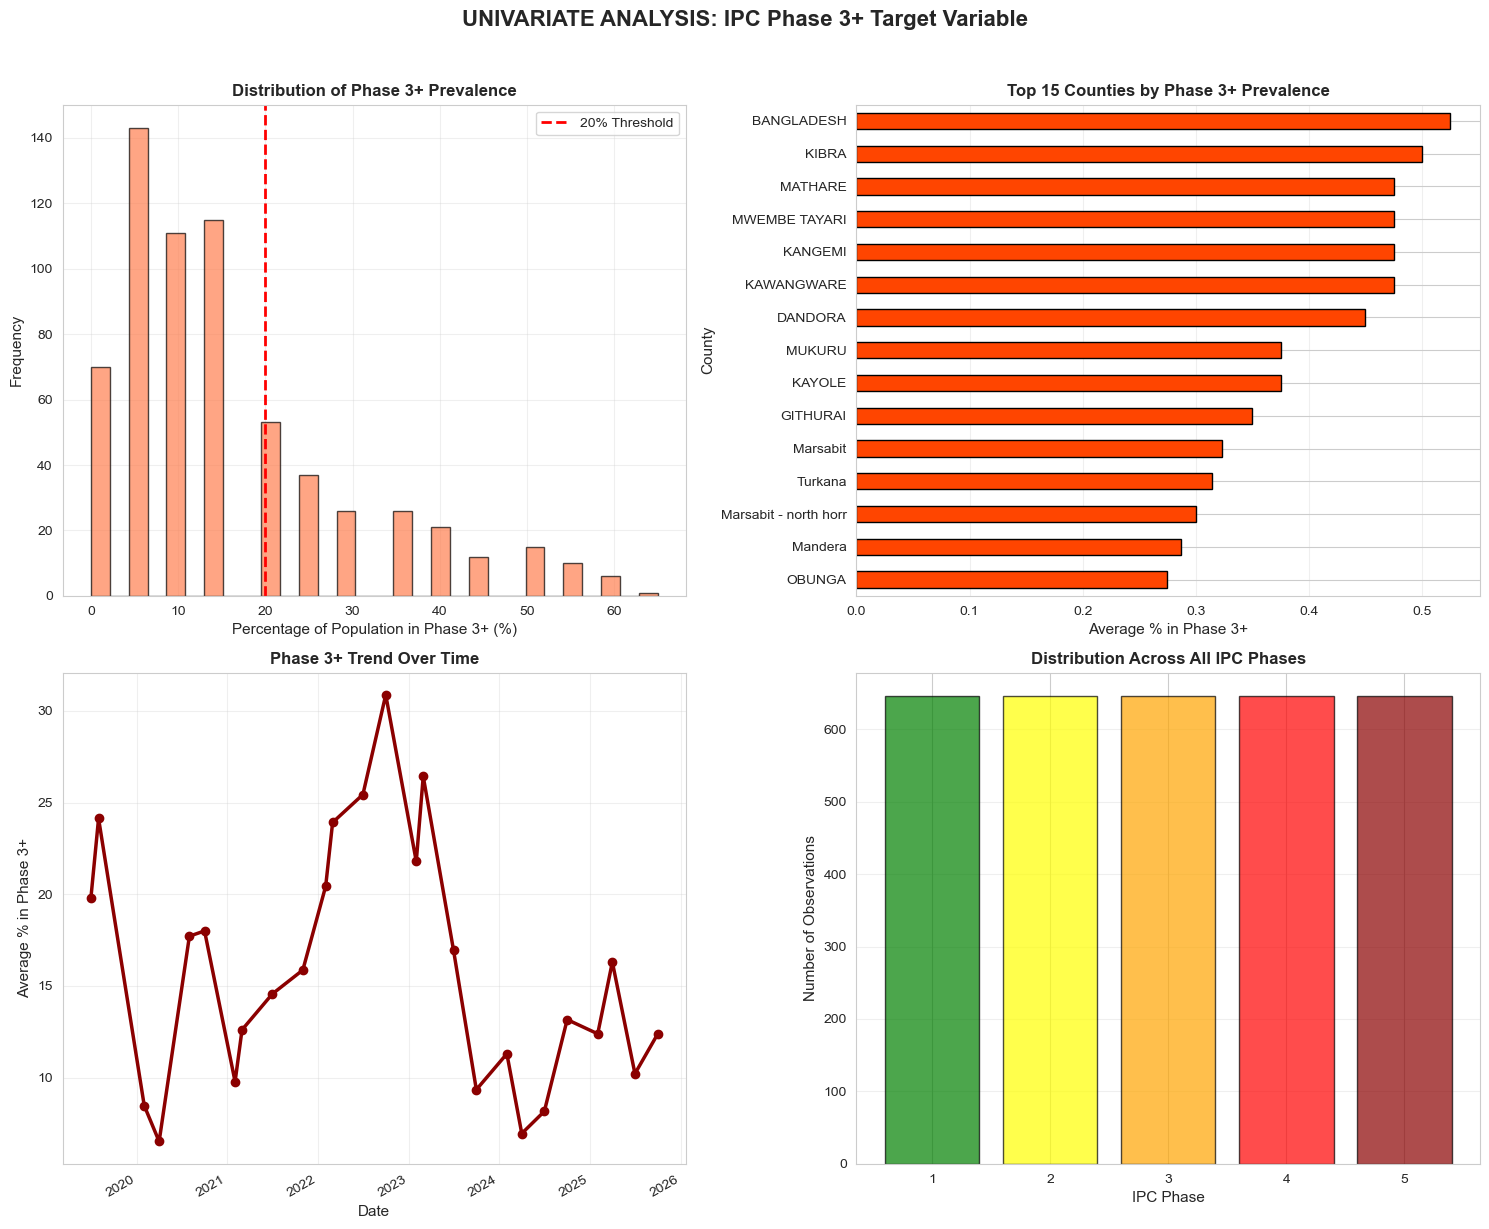

In [26]:
# Univariate Analysis: IPC Phase 3+ Target Variable
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: IPC Phase 3+ Target Variable', fontsize=16, fontweight='bold', y=1.02)

# 1 Distribution of Phase 3+ percentages
ax1 = axes[0, 0]
ax1.hist(phase3_data['Percentage_num'] * 100, bins=30, 
         color='coral', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Percentage of Population in Phase 3+ (%)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of Phase 3+ Prevalence', fontsize=12, fontweight='bold')
ax1.axvline(20, color='red', linestyle='--', linewidth=2, label='20% Threshold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2 Top counties by Phase 3+ prevalence
ax2 = axes[0, 1]
county_phase3 = phase3_data.groupby('Area')['Percentage_num'].mean().sort_values(ascending=False).head(15)
county_phase3.plot(kind='barh', ax=ax2, color='orangered', edgecolor='black')
ax2.set_xlabel('Average % in Phase 3+', fontsize=11)
ax2.set_ylabel('County', fontsize=11)
ax2.set_title('Top 15 Counties by Phase 3+ Prevalence', fontsize=12, fontweight='bold')
ax2.invert_yaxis()  # highest values on top
ax2.grid(axis='x', alpha=0.3)

# 3 Phase 3+ trend over time
ax3 = axes[1, 0]
phase3_time = phase3_data.groupby('From_date')['Percentage_num'].mean() * 100
phase3_time.plot(ax=ax3, color='darkred', linewidth=2.5, marker='o')
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('Average % in Phase 3+', fontsize=11)
ax3.set_title('Phase 3+ Trend Over Time', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# 4 Distribution across all IPC phases
ax4 = axes[1, 1]
all_phase_counts = ipc_df[ipc_df['Phase'].isin(['1','2','3','4','5'])]['Phase'].value_counts().sort_index()
ax4.bar(all_phase_counts.index, all_phase_counts.values, 
        color=['green', 'yellow', 'orange', 'red', 'darkred'], 
        edgecolor='black', alpha=0.7)
ax4.set_xlabel('IPC Phase', fontsize=11)
ax4.set_ylabel('Number of Observations', fontsize=11)
ax4.set_title('Distribution Across All IPC Phases', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<blockquote>
  <p><strong>📝Key Observations </strong></p>
  <ul>
    <li>Most Phase 3+ observations fall below the 20% threshold, with the distribution right-skewed — severe cases above 40% are rare but present.</li>
    <li>The top areas by prevalence are informal urban settlements (Kibra, Mathare, Kangemi) and known ASAL counties (Marsabit, Turkana, Mandera) — suggesting two distinct drivers: urban poverty and climate vulnerability.</li>
    <li>The trend over time shows a clear peak around late 2022–2023, aligning with the severe drought period, followed by a gradual decline.</li>
    <li>All five IPC phases have nearly equal observation counts (~650 each), confirming the long-format structure of the dataset rather than a reflection of actual phase distribution across Kenya.</li>
  </ul>
</blockquote>

#### 🌧️ **2.8.1.2 Rainfall Patterns**

In [27]:
# Clean rainfall date
rainfall_df['date_parsed'] = pd.to_datetime(rainfall_df['date'])
# Get recent rainfall data
rain_recent = rainfall_df[rainfall_df['date_parsed'] >= '2020-01-01'].copy()

print(f"Recent rainfall observations: {len(rain_recent):,}")
print(f"\nRainfall summary statistics:")
print(rain_recent[['rfh', 'r1h', 'r3h', 'r3q']].describe())


Recent rainfall observations: 17,820

Rainfall summary statistics:
                rfh           r1h           r3h           r3q
count  17820.000000  17820.000000  17820.000000  17820.000000
mean      36.135944    108.912239    334.398856    117.591151
std       38.891556     95.634536    219.551212     41.711471
min        0.000000      0.262651      2.734940     25.420523
25%        7.934018     34.186007    158.353193     89.292303
50%       23.300000     85.399997    303.285890    111.168068
75%       51.567857    158.403825    479.564665    138.476675
max      476.275850    975.482800   1495.413700    432.723900


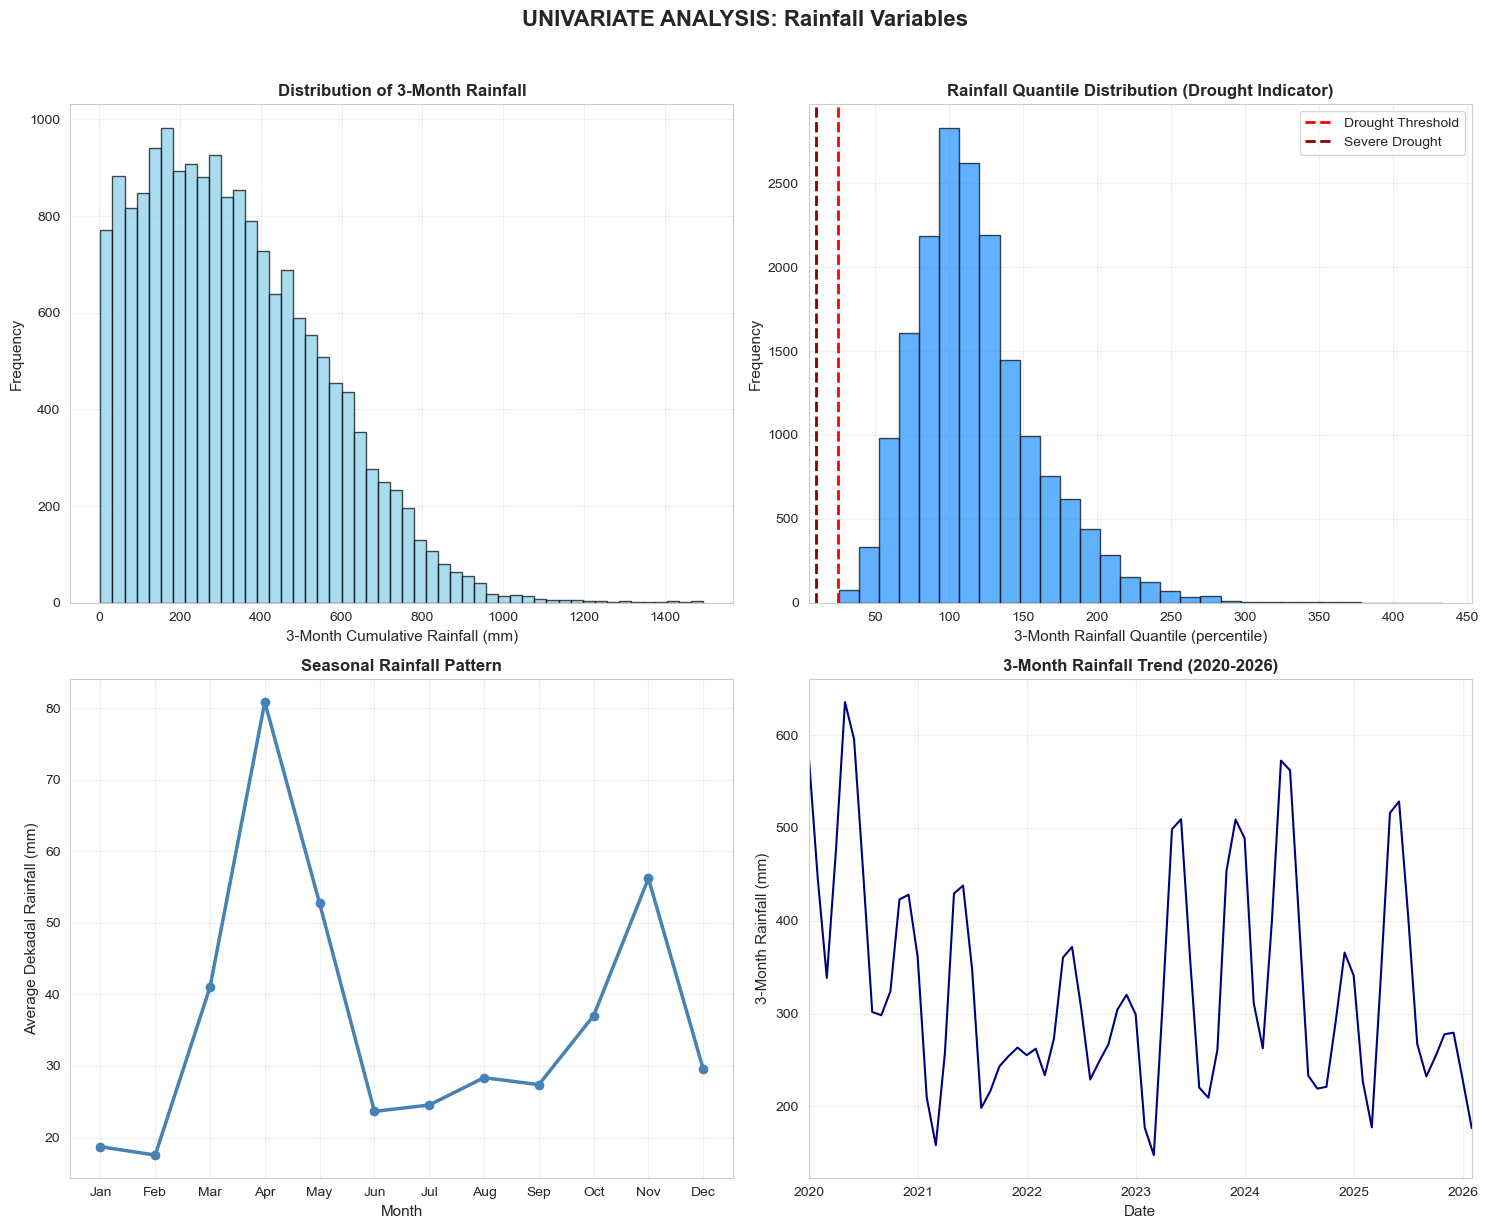

In [28]:
# Univariate Analysis: Rainfall Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: Rainfall Variables', fontsize=16, fontweight='bold', y=1.02)

# 1 Distribution of 3-month cumulative rainfall
ax1 = axes[0, 0]
ax1.hist(rain_recent['r3h'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('3-Month Cumulative Rainfall (mm)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of 3-Month Rainfall', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# 2 Rainfall quantile (drought indicator)
ax2 = axes[0, 1]
ax2.hist(rain_recent['r3q'].dropna(), bins=30, color='dodgerblue', edgecolor='black', alpha=0.7)
ax2.set_xlabel('3-Month Rainfall Quantile (percentile)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Rainfall Quantile Distribution (Drought Indicator)', fontsize=12, fontweight='bold')
ax2.axvline(25, color='red', linestyle='--', linewidth=2, label='Drought Threshold')
ax2.axvline(10, color='darkred', linestyle='--', linewidth=2, label='Severe Drought')
ax2.legend()
ax2.grid(alpha=0.3)

# 3 Seasonal rainfall pattern
ax3 = axes[1, 0]
# Extract month for seasonality
rain_recent['month'] = rain_recent['date_parsed'].dt.month
monthly_rain = rain_recent.groupby('month')['rfh'].mean()
ax3.plot(monthly_rain.index, monthly_rain.values, marker='o', linewidth=2.5, color='steelblue')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Average Dekadal Rainfall (mm)', fontsize=11)
ax3.set_title('Seasonal Rainfall Pattern', fontsize=12, fontweight='bold')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3.grid(alpha=0.3)

# 4 Recent trends in 3-month rainfall
ax4 = axes[1, 1]
rain_monthly = rain_recent.groupby(rain_recent['date_parsed'].dt.to_period('M'))['r3h'].mean()
rain_monthly.plot(ax=ax4, color='navy', linewidth=1.5)
ax4.set_xlabel('Date', fontsize=11)
ax4.set_ylabel('3-Month Rainfall (mm)', fontsize=11)
ax4.set_title('3-Month Rainfall Trend (2020-2026)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


<blockquote>
  <p><strong>📝Key Observations </strong></p>
  <ul>
    <li>3-month cumulative rainfall is right-skewed with most observations below 400mm, reflecting the dry conditions typical of ASAL counties.</li>
    <li>The drought indicator (<code>r3q</code>) shows most observations cluster around the 100 percentile (near-normal), but a meaningful portion falls below the 25 drought threshold — signaling recurring below-normal rainfall periods.</li>
    <li>Kenya's bimodal rainfall pattern is clearly visible — two peaks in April (long rains) and November (short rains), with dry spells in June–September.</li>
    <li>The 3-month trend (2020–2026) shows a sharp dip around 2022–2023, consistent with the severe drought period that drove the peak in Phase 3+ prevalence seen in the IPC analysis.</li>
  </ul>
</blockquote>

#### 🍽 **2.8.1.3 Food Prices**

In [29]:
# Remove header/invalid rows if present
prices_clean = prices_df[prices_df['#date'] != '#date'].copy()

# Convert price column to numeric, coerce errors to NaN
prices_clean['price_num'] = pd.to_numeric(prices_clean['#value'], errors='coerce')

# Parse date column into datetime
prices_clean['date_parsed'] = pd.to_datetime(prices_clean['#date'], errors='coerce')
#Price statistics for cleaned dataset

# Total number of observations
total_obs = len(prices_clean)

# Number of unique commodities
unique_commodities = prices_clean['#item+name'].nunique()

# Top 10 commodities by observation count
top_commodities = prices_clean['#item+name'].value_counts().head(10)

# Display results
print(f"💰 Total price observations: {total_obs:,}")
print(f"🥦 Commodities tracked: {unique_commodities}\n")

print("📊 Top 10 commodities by observation count:")
print(top_commodities)

💰 Total price observations: 17,364
🥦 Commodities tracked: 50

📊 Top 10 commodities by observation count:
#item+name
Maize (white)       1234
Beans (dry)         1151
Maize               1114
Beans                946
Potatoes (Irish)     887
Salt                 809
Wheat flour          808
Sugar                788
Sorghum              705
Rice (aromatic)      590
Name: count, dtype: int64


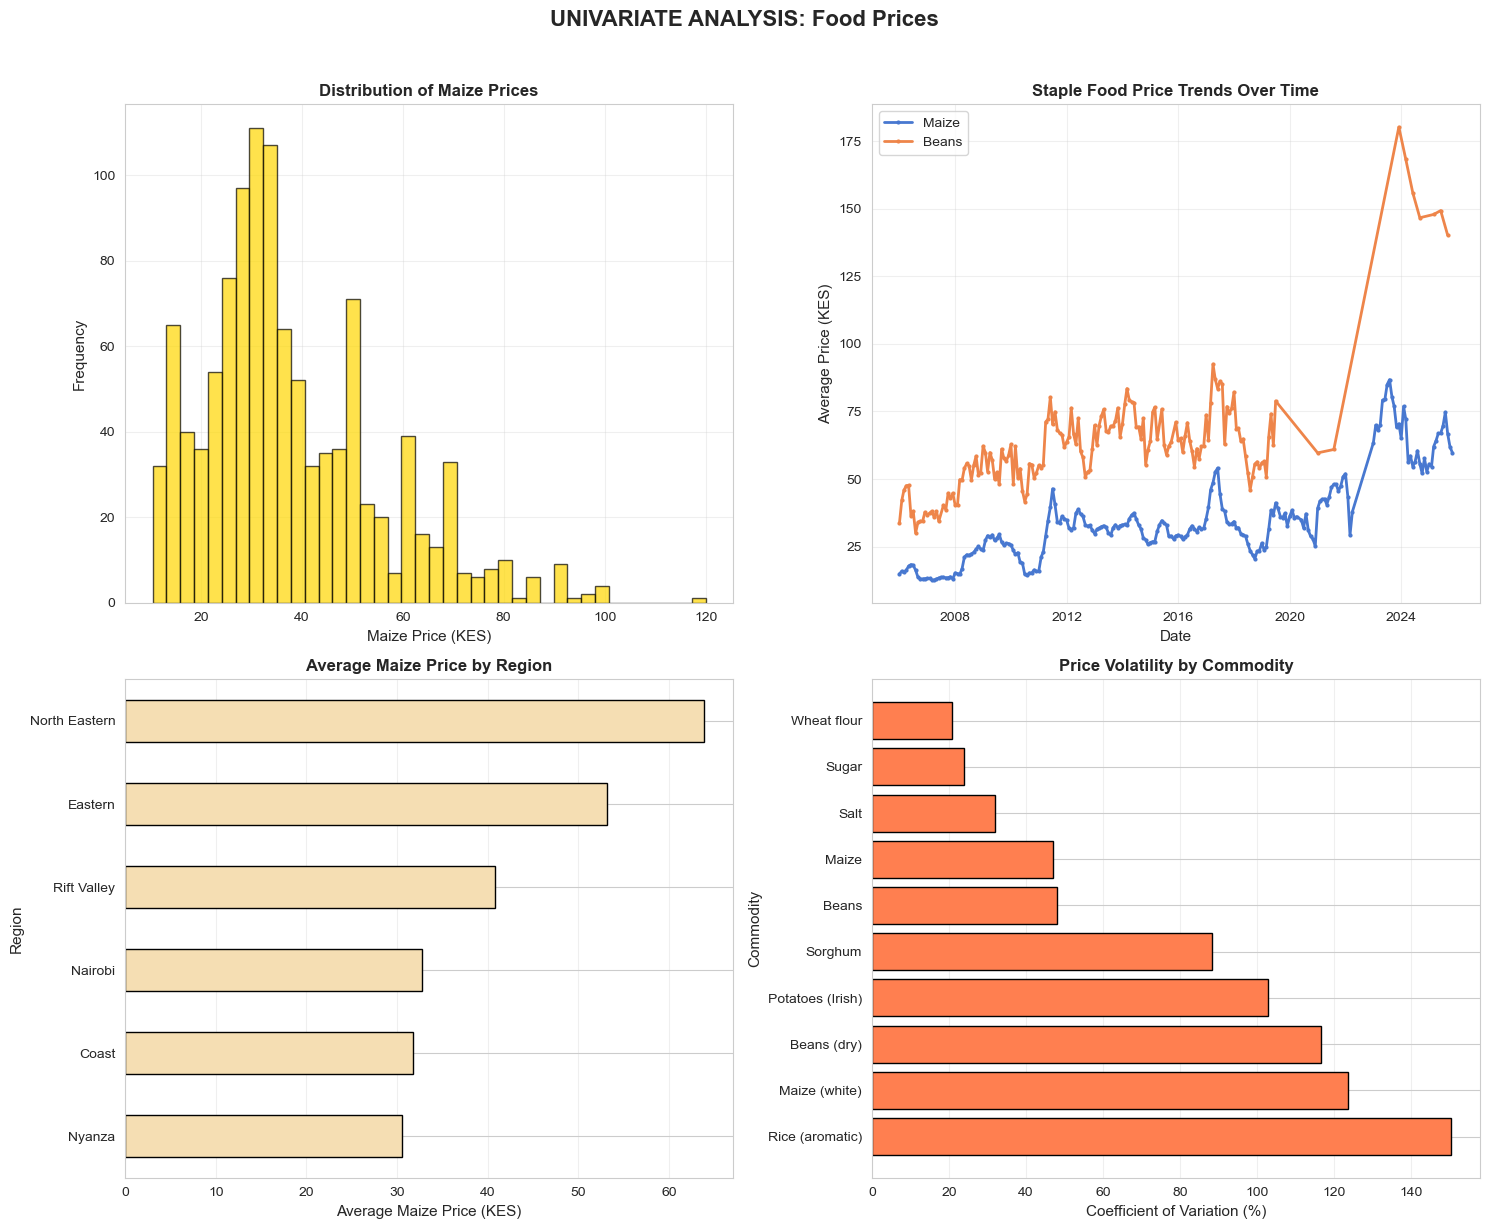

In [30]:
# Univariate Analysis: Food Prices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: Food Prices', fontsize=16, fontweight='bold', y=1.02)

# 1 Maize price distribution
ax1 = axes[0, 0]
maize_prices = prices_clean[prices_clean['#item+name'] == 'Maize']['price_num'].dropna()
ax1.hist(maize_prices, bins=40, color='gold', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Maize Price (KES)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of Maize Prices', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# 2 Staple food price trends over time
ax2 = axes[0, 1]
for commodity in ['Maize', 'Beans']:
    commodity_data = prices_clean[prices_clean['#item+name'] == commodity].copy()
    monthly_avg = commodity_data.groupby(commodity_data['date_parsed'].dt.to_period('M'))['price_num'].mean()
    ax2.plot(monthly_avg.index.to_timestamp(), monthly_avg.values, 
             label=commodity, linewidth=2, marker='o', markersize=2)
ax2.set_xlabel('Date', fontsize=11)
ax2.set_ylabel('Average Price (KES)', fontsize=11)
ax2.set_title('Staple Food Price Trends Over Time', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 3 Regional price variation (Maize)
ax3 = axes[1, 0]
region_prices = prices_clean[prices_clean['#item+name'] == 'Maize'].groupby('#adm1+name')['price_num'].mean().sort_values()
region_prices.plot(kind='barh', ax=ax3, color='wheat', edgecolor='black')
ax3.set_xlabel('Average Maize Price (KES)', fontsize=11)
ax3.set_ylabel('Region', fontsize=11)
ax3.set_title('Average Maize Price by Region', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4 Price volatility for top commodities
ax4 = axes[1, 1]
top_commodities = prices_clean['#item+name'].value_counts().head(10).index
volatility = []

for commodity in top_commodities:
    comm_prices = prices_clean[prices_clean['#item+name'] == commodity]['price_num'].dropna()
    if len(comm_prices) > 0:
        cv = (comm_prices.std() / comm_prices.mean()) * 100
        volatility.append((commodity, cv))

volatility_df = pd.DataFrame(volatility, columns=['Commodity', 'CV']).sort_values('CV', ascending=False)
ax4.barh(volatility_df['Commodity'], volatility_df['CV'], color='coral', edgecolor='black')
ax4.set_xlabel('Coefficient of Variation (%)', fontsize=11)
ax4.set_ylabel('Commodity', fontsize=11)
ax4.set_title('Price Volatility by Commodity', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


<blockquote>
  <p><strong>📝Key Observations </strong></p>
  <ul>
    <li>Maize prices are right-skewed and mostly below 60 KES per kg, but a second cluster around 50–60 KES suggests price variation across regions and time periods.</li>
    <li>Both maize and beans show a clear upward price trend since 2006, with a sharp spike post-2022 — consistent with the drought period and global commodity price shocks.</li>
    <li>North Eastern and Eastern regions have the highest average maize prices, both known ASAL areas where transport costs and supply chain constraints drive prices up.</li>
    <li>Rice (aromatic), Maize (white), and Beans (dry) show the highest price volatility — notably, Maize and Maize (white) appearing separately confirms the need to merge these entries during preprocessing.</li>
  </ul>
</blockquote>

##### 📈 **2.8.1.3 b — Commodity Price Deep Dive: Maize, sorghum & Beans**

A closer look at Kenya's  most critical staple commodities, standardized to KES/kg for fair comparison across market types and unit sizes.

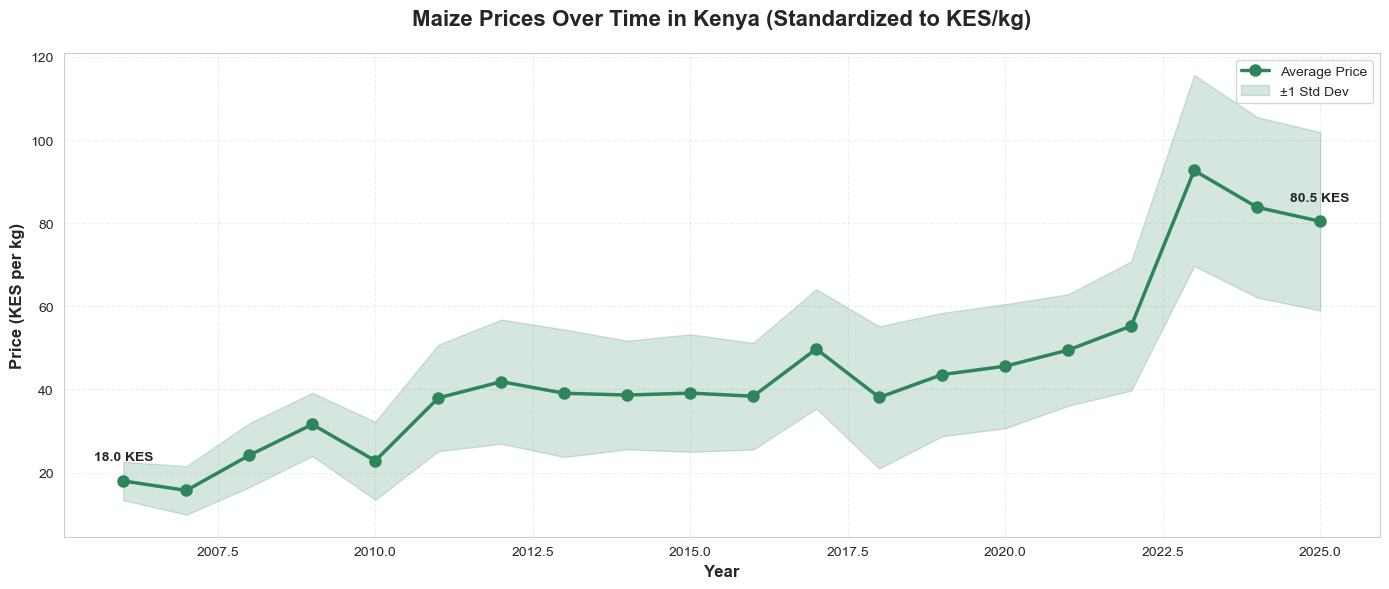


📊 MAIZE PRICE SUMMARY (KES per kg)

Overall statistics:
   Minimum:      6.00 KES/kg
   Maximum:    170.00 KES/kg
   Mean:        54.29 KES/kg
   Median:      48.33 KES/kg

📈 Trend analysis:
   2006: 17.99 KES/kg
   2025: 80.45 KES/kg
   Change:   +62.47 KES/kg (+347.3%)

📊 Data points: 3,749 records across 20 years


In [31]:
# Filter for maize prices
maize_prices = prices_df[prices_df['#item+name'].str.contains('Maize', case=False, na=False)].copy()

if len(maize_prices) > 0:
    # Convert date to datetime
    maize_prices['date'] = pd.to_datetime(maize_prices['#date'], errors='coerce')
    
    # Standardize to KES per KG
    def standardize_to_kg(row):
        """Convert all prices to KES per kilogram"""
        price = row['#value']
        unit = str(row['#item+unit']).lower()
        
        # Already per kg
        if 'kg' in unit and '90' not in unit:
            return price
        
        # 90 kg bag - divide by 90
        elif '90' in unit or 'bag' in unit:
            return price / 90
        
        # Unknown unit - return NaN for safety
        else:
            return np.nan
    
    maize_prices['price_per_kg'] = maize_prices.apply(standardize_to_kg, axis=1)
    
    # Remove any NaN prices
    maize_prices = maize_prices.dropna(subset=['price_per_kg'])
    
    # Group by year and get average price per kg
    maize_prices['year'] = maize_prices['date'].dt.year
    yearly_maize = maize_prices.groupby('year')['price_per_kg'].agg(['mean', 'std', 'count'])
    
    # Create visualization
    plt.figure(figsize=(14, 6))
    
    # Plot mean with shaded standard deviation
    plt.plot(
        yearly_maize.index, 
        yearly_maize['mean'], 
        marker='o', 
        linewidth=2.5, 
        color='#2F855A',
        markersize=8,
        label='Average Price'
    )
    
    # Add shaded area for standard deviation
    plt.fill_between(
        yearly_maize.index,
        yearly_maize['mean'] - yearly_maize['std'],
        yearly_maize['mean'] + yearly_maize['std'],
        alpha=0.2,
        color='#2F855A',
        label='±1 Std Dev'
    )
    
    # Labels and title
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Price (KES per kg)', fontsize=12, fontweight='bold')
    plt.title('Maize Prices Over Time in Kenya (Standardized to KES/kg)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=10)
    
    # Annotate first and last points
    first_year = yearly_maize.index[0]
    last_year = yearly_maize.index[-1]
    first_price = yearly_maize['mean'].iloc[0]
    last_price = yearly_maize['mean'].iloc[-1]
    
    plt.annotate(f'{first_price:.1f} KES', 
                xy=(first_year, first_price),
                xytext=(first_year, first_price + 5),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.annotate(f'{last_price:.1f} KES', 
                xy=(last_year, last_price),
                xytext=(last_year, last_price + 5),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "=" * 70)
    print("📊 MAIZE PRICE SUMMARY (KES per kg)")
    print("=" * 70)
    print(f"\nOverall statistics:")
    print(f"   Minimum:  {maize_prices['price_per_kg'].min():>8.2f} KES/kg")
    print(f"   Maximum:  {maize_prices['price_per_kg'].max():>8.2f} KES/kg")
    print(f"   Mean:     {maize_prices['price_per_kg'].mean():>8.2f} KES/kg")
    print(f"   Median:   {maize_prices['price_per_kg'].median():>8.2f} KES/kg")
    
    print(f"\n📈 Trend analysis:")
    price_change = last_price - first_price
    pct_change = (price_change / first_price) * 100
    print(f"   {first_year}: {first_price:.2f} KES/kg")
    print(f"   {last_year}: {last_price:.2f} KES/kg")
    print(f"   Change:   {price_change:+.2f} KES/kg ({pct_change:+.1f}%)")
    
    print(f"\n📊 Data points: {len(maize_prices):,} records across {len(yearly_maize)} years")
    print("=" * 70)
    
else:
    print("❌ No maize price data found.")

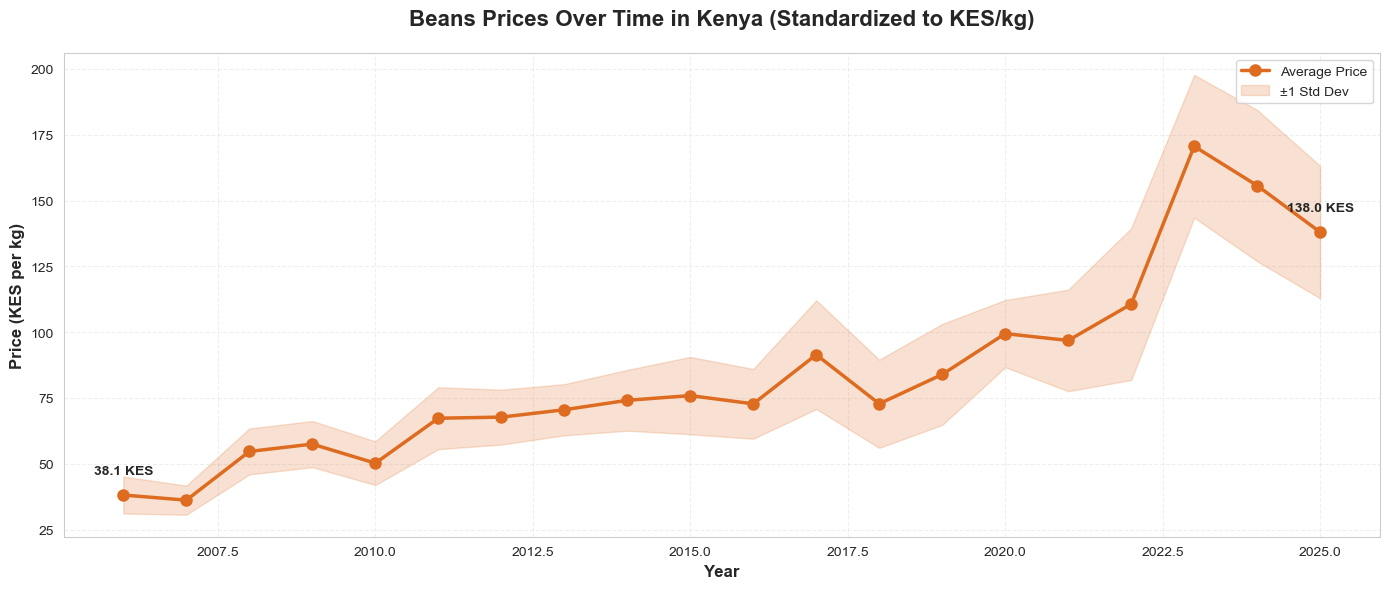


📊 BEANS PRICE SUMMARY (KES per kg)

Overall statistics:
   Minimum:     12.60 KES/kg
   Maximum:    270.00 KES/kg
   Mean:       104.75 KES/kg
   Median:      96.00 KES/kg

📈 Trend analysis:
   2006: 38.11 KES/kg
   2025: 137.99 KES/kg
   Change:   +99.88 KES/kg (+262.1%)

📊 Data points: 2,749 records across 20 years


In [32]:
# Filter for beans prices
beans_prices = prices_df[prices_df['#item+name'].str.contains('Beans', case=False, na=False)].copy()

if len(beans_prices) > 0:
    # Convert date to datetime
    beans_prices['date'] = pd.to_datetime(beans_prices['#date'], errors='coerce')
    
    # Standardize to KES per KG
    def standardize_to_kg(row):
        """Convert all prices to KES per kilogram"""
        price = row['#value']
        unit = str(row['#item+unit']).lower()
        
        # Already per kg
        if 'kg' in unit and '90' not in unit:
            return price
        
        # 90 kg bag - divide by 90
        elif '90' in unit or 'bag' in unit:
            return price / 90
        
        # Unknown unit - return NaN for safety
        else:
            return np.nan
    
    beans_prices['price_per_kg'] = beans_prices.apply(standardize_to_kg, axis=1)
    
    # Remove any NaN prices
    beans_prices = beans_prices.dropna(subset=['price_per_kg'])
    
    # Group by year and get average price per kg
    beans_prices['year'] = beans_prices['date'].dt.year
    yearly_beans = beans_prices.groupby('year')['price_per_kg'].agg(['mean', 'std', 'count'])
    
    # Create visualization
    plt.figure(figsize=(14, 6))
    
    # Plot mean with shaded standard deviation
    plt.plot(
        yearly_beans.index, 
        yearly_beans['mean'], 
        marker='o', 
        linewidth=2.5, 
        color='#DD6B20',
        markersize=8,
        label='Average Price'
    )
    
    # Add shaded area for standard deviation
    plt.fill_between(
        yearly_beans.index,
        yearly_beans['mean'] - yearly_beans['std'],
        yearly_beans['mean'] + yearly_beans['std'],
        alpha=0.2,
        color='#DD6B20',
        label='±1 Std Dev'
    )
    
    # Labels and title
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Price (KES per kg)', fontsize=12, fontweight='bold')
    plt.title('Beans Prices Over Time in Kenya (Standardized to KES/kg)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=10)
    
    # Annotate first and last points
    first_year = yearly_beans.index[0]
    last_year = yearly_beans.index[-1]
    first_price = yearly_beans['mean'].iloc[0]
    last_price = yearly_beans['mean'].iloc[-1]
    
    plt.annotate(f'{first_price:.1f} KES', 
                xy=(first_year, first_price),
                xytext=(first_year, first_price + 8),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.annotate(f'{last_price:.1f} KES', 
                xy=(last_year, last_price),
                xytext=(last_year, last_price + 8),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "=" * 70)
    print("📊 BEANS PRICE SUMMARY (KES per kg)")
    print("=" * 70)
    print(f"\nOverall statistics:")
    print(f"   Minimum:  {beans_prices['price_per_kg'].min():>8.2f} KES/kg")
    print(f"   Maximum:  {beans_prices['price_per_kg'].max():>8.2f} KES/kg")
    print(f"   Mean:     {beans_prices['price_per_kg'].mean():>8.2f} KES/kg")
    print(f"   Median:   {beans_prices['price_per_kg'].median():>8.2f} KES/kg")
    
    print(f"\n📈 Trend analysis:")
    price_change = last_price - first_price
    pct_change = (price_change / first_price) * 100
    print(f"   {first_year}: {first_price:.2f} KES/kg")
    print(f"   {last_year}: {last_price:.2f} KES/kg")
    print(f"   Change:   {price_change:+.2f} KES/kg ({pct_change:+.1f}%)")
    
    print(f"\n📊 Data points: {len(beans_prices):,} records across {len(yearly_beans)} years")
    print("=" * 70)
    
else:
    print("❌ No beans price data found.")

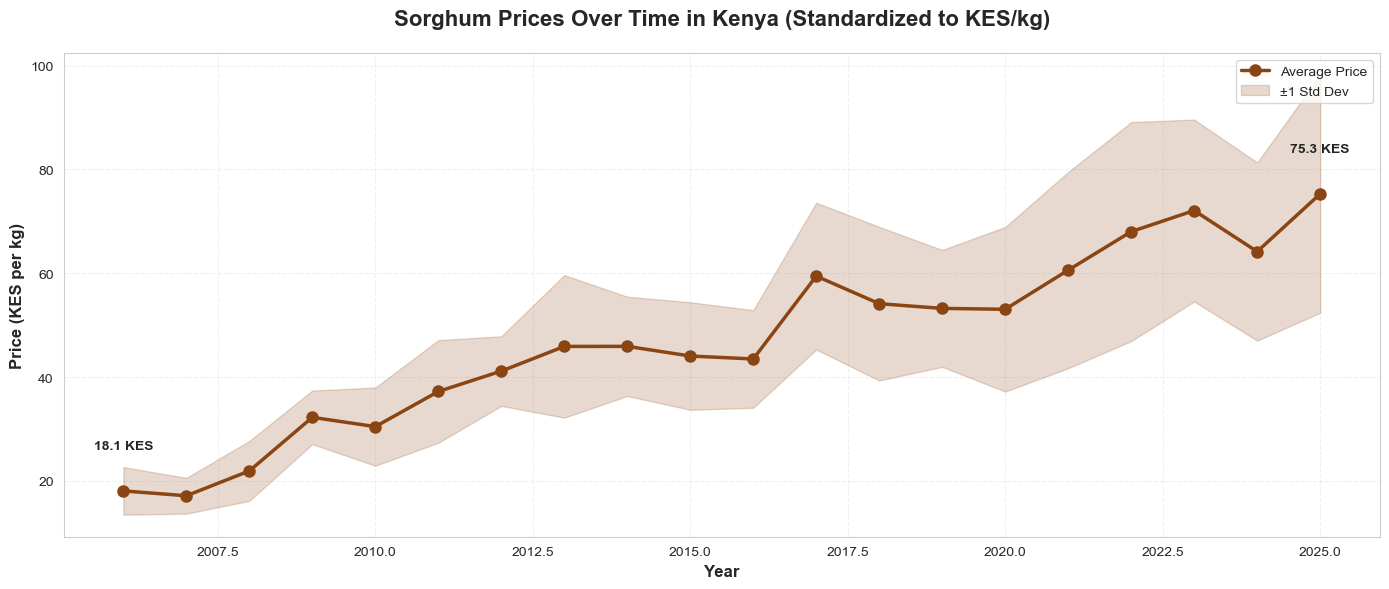


📊 SORGHUM PRICE SUMMARY (KES per kg)

Overall statistics:
   Minimum:     10.75 KES/kg
   Maximum:    150.00 KES/kg
   Mean:        51.42 KES/kg
   Median:      50.00 KES/kg

📈 Trend analysis:
   2006: 18.06 KES/kg
   2025: 75.28 KES/kg
   Change:   +57.22 KES/kg (+316.8%)

📊 Data points: 836 records across 20 years


In [33]:
# Filter for sorghum prices
sorghum_prices = prices_df[
    prices_df['#item+name'].str.contains('Sorghum', case=False, na=False)
].copy()

if len(sorghum_prices) > 0:
    
    # Convert date to datetime
    sorghum_prices['date'] = pd.to_datetime(sorghum_prices['#date'], errors='coerce')
    
    # Standardize to KES per KG
    def standardize_to_kg(row):
        """Convert all prices to KES per kilogram"""
        price = row['#value']
        unit = str(row['#item+unit']).lower()
        
        # Already per kg
        if 'kg' in unit and '90' not in unit:
            return price
        
        # 90 kg bag
        elif '90' in unit or 'bag' in unit:
            return price / 90
        
        else:
            return np.nan
    
    sorghum_prices['price_per_kg'] = sorghum_prices.apply(standardize_to_kg, axis=1)
    
    # Remove NaNs
    sorghum_prices = sorghum_prices.dropna(subset=['price_per_kg'])
    
    # Group by year
    sorghum_prices['year'] = sorghum_prices['date'].dt.year
    yearly_sorghum = sorghum_prices.groupby('year')['price_per_kg'].agg(['mean', 'std', 'count'])
    
    # Visualization
    plt.figure(figsize=(14, 6))
    
    plt.plot(
        yearly_sorghum.index,
        yearly_sorghum['mean'],
        marker='o',
        linewidth=2.5,
        color='#8B4513',
        markersize=8,
        label='Average Price'
    )
    
    plt.fill_between(
        yearly_sorghum.index,
        yearly_sorghum['mean'] - yearly_sorghum['std'],
        yearly_sorghum['mean'] + yearly_sorghum['std'],
        alpha=0.2,
        color='#8B4513',
        label='±1 Std Dev'
    )
    
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Price (KES per kg)', fontsize=12, fontweight='bold')
    plt.title('Sorghum Prices Over Time in Kenya (Standardized to KES/kg)',
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=10)
    
    # Annotate first and last
    first_year = yearly_sorghum.index[0]
    last_year = yearly_sorghum.index[-1]
    first_price = yearly_sorghum['mean'].iloc[0]
    last_price = yearly_sorghum['mean'].iloc[-1]
    
    plt.annotate(f'{first_price:.1f} KES',
                 xy=(first_year, first_price),
                 xytext=(first_year, first_price + 8),
                 fontsize=10, fontweight='bold',
                 ha='center')
    
    plt.annotate(f'{last_price:.1f} KES',
                 xy=(last_year, last_price),
                 xytext=(last_year, last_price + 8),
                 fontsize=10, fontweight='bold',
                 ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n" + "=" * 70)
    print("📊 SORGHUM PRICE SUMMARY (KES per kg)")
    print("=" * 70)
    
    print(f"\nOverall statistics:")
    print(f"   Minimum:  {sorghum_prices['price_per_kg'].min():>8.2f} KES/kg")
    print(f"   Maximum:  {sorghum_prices['price_per_kg'].max():>8.2f} KES/kg")
    print(f"   Mean:     {sorghum_prices['price_per_kg'].mean():>8.2f} KES/kg")
    print(f"   Median:   {sorghum_prices['price_per_kg'].median():>8.2f} KES/kg")
    
    print(f"\n📈 Trend analysis:")
    price_change = last_price - first_price
    pct_change = (price_change / first_price) * 100
    print(f"   {first_year}: {first_price:.2f} KES/kg")
    print(f"   {last_year}: {last_price:.2f} KES/kg")
    print(f"   Change:   {price_change:+.2f} KES/kg ({pct_change:+.1f}%)")
    
    print(f"\n📊 Data points: {len(sorghum_prices):,} records across {len(yearly_sorghum)} years")
    print("=" * 70)

else:
    print("❌ No sorghum price data found.")

<blockquote>
  <p><strong>📝 Key Observations </strong></p>
  <ul>
    <li>All three staples — maize (18→80.5 KES), beans (38→138 KES), and sorghum (18→75.3 KES) — show a consistent long-term upward trend since 2006, with prices roughly quadrupling over two decades.</li>
    <li>The sharpest price spike across all three commodities occurs post-2022, coinciding with the severe drought period and global commodity shocks — directly aligning with the Phase 3+ peak observed in the IPC analysis.</li>
    <li>Beans show the highest absolute price and the widest standard deviation band, indicating greater market volatility compared to maize and sorghum.</li>
  </ul>
</blockquote>

#### **2.8.1.4. Poverty & Political Violence**

In [34]:
# minor cleaning for MPI dataset
# 1 Remove header/invalid rows
mpi_clean = mpi_df[mpi_df['#country+code'] != '#country+code'].copy()

# 2 Convert key MPI columns to numeric
mpi_clean['MPI_num'] = pd.to_numeric(mpi_clean['#indicator+mpi'], errors='coerce')
mpi_clean['Headcount_num'] = pd.to_numeric(mpi_clean['#indicator+headcount_ratio'], errors='coerce')
mpi_clean['Severe_Poverty_num'] = pd.to_numeric(mpi_clean['#indicator+in_severe_poverty'], errors='coerce')
# Clean violence
conflict_df['date'] = pd.to_datetime(conflict_df['Year'].astype(str) + '-' + conflict_df['Month'].astype(str) + '-01')

# 1 MPI Indicators
print("🌍 MPI Statistics:")
mpi_stats = mpi_clean[['MPI_num', 'Headcount_num', 'Severe_Poverty_num']].describe()
print(mpi_stats)

# 2 Conflict / Violence Indicators
print("\n⚔️ Conflict Statistics:")
if 'conflict_df' in globals() and not conflict_df.empty:
    # Ensure the numeric columns exist
    cols = [col for col in ['Events', 'Fatalities'] if col in conflict_df.columns]
    if cols:
        conflict_stats = conflict_df[cols].describe()
        print(conflict_stats)
    else:
        print("⚠️ Conflict dataset has no numeric columns ('Events' or 'Fatalities').")
else:
    print("⚠️ Conflict dataset is empty or missing. No statistics to display.")


🌍 MPI Statistics:
         MPI_num  Headcount_num  Severe_Poverty_num
count  48.000000      48.000000           48.000000
mean    0.152240      32.107352           12.248000
std     0.120417      19.724275           16.516930
min     0.010300       2.671200            0.221300
25%     0.078500      19.149225            2.342800
50%     0.108250      25.707150            5.313800
75%     0.194100      40.455875           12.004975
max     0.496800      81.335900           64.885500

⚔️ Conflict Statistics:
           Events  Fatalities
count  350.000000  350.000000
mean    27.702857   41.554286
std     32.054802   47.350261
min      0.000000    0.000000
25%      8.000000   12.000000
50%     15.000000   29.000000
75%     29.000000   58.750000
max    175.000000  539.000000


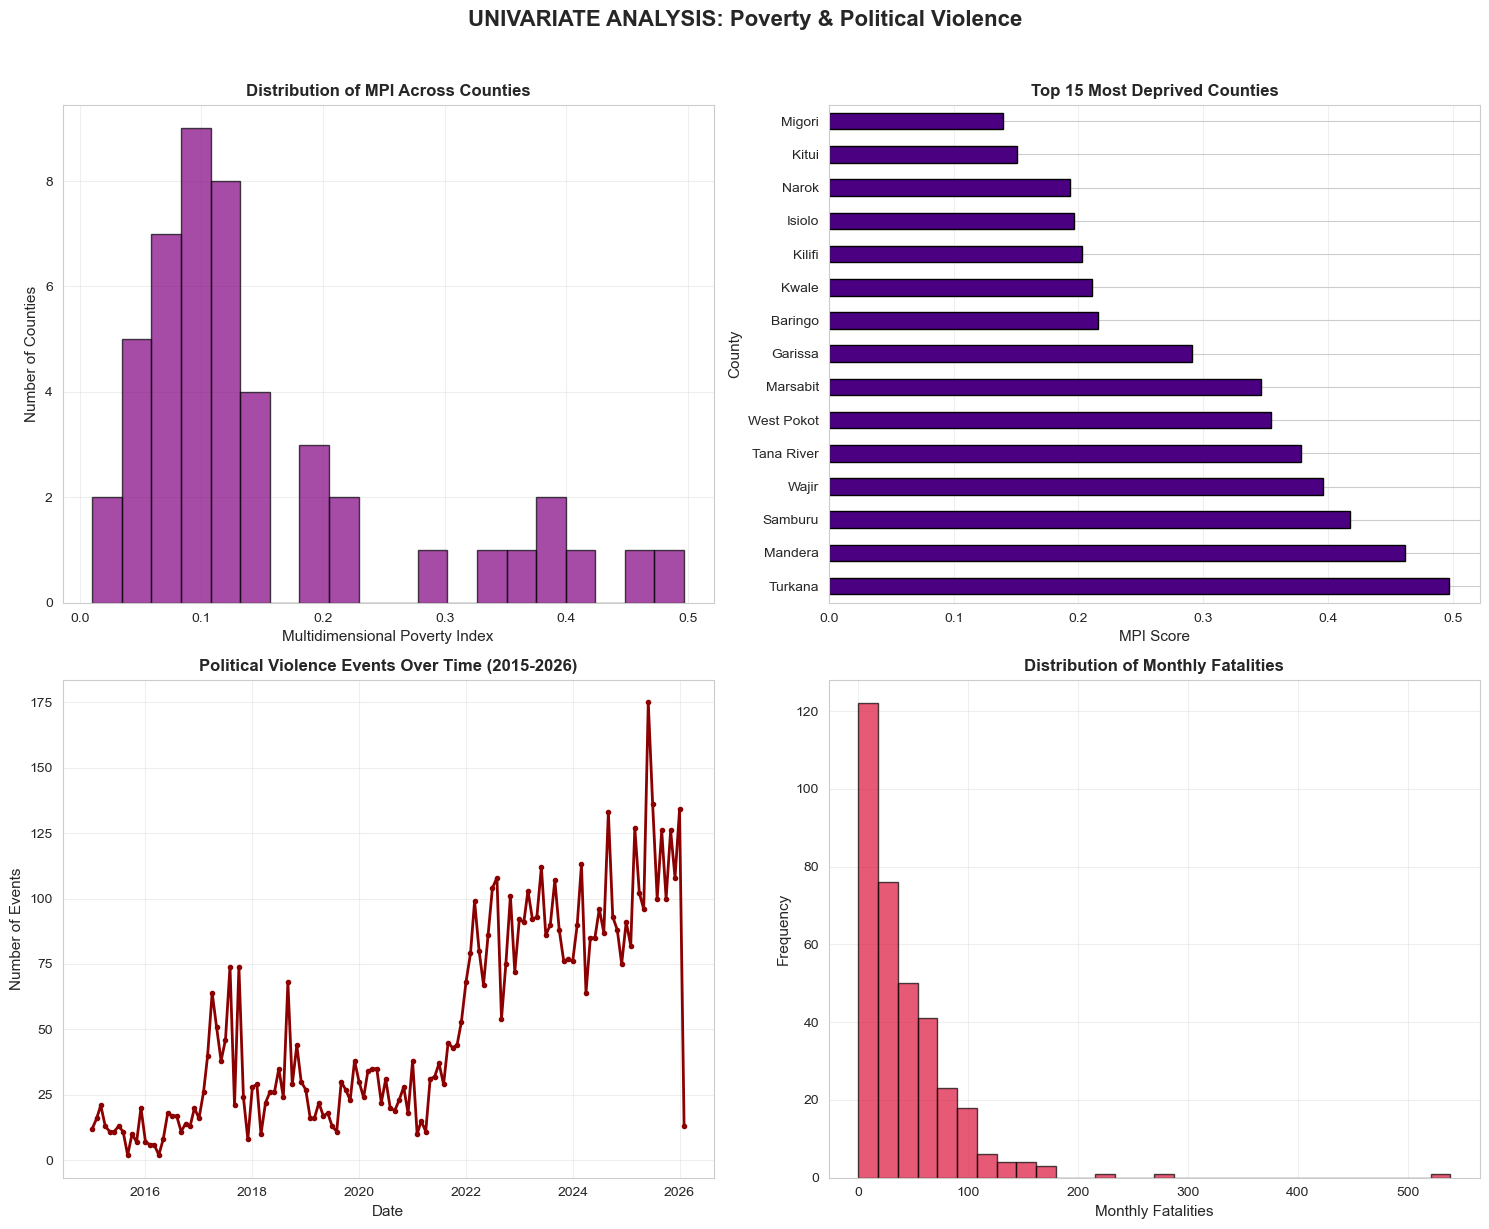

In [35]:
#  Univariate Analysis: Poverty & Political Violence
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: Poverty & Political Violence', fontsize=16, fontweight='bold', y=1.02)

# 1 MPI distribution
ax1 = axes[0, 0]
ax1.hist(mpi_clean['MPI_num'].dropna(), bins=20, color='purple', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Multidimensional Poverty Index', fontsize=11)
ax1.set_ylabel('Number of Counties', fontsize=11)
ax1.set_title('Distribution of MPI Across Counties', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# 2 Top 15 most deprived counties
ax2 = axes[0, 1]
top_poor = mpi_clean.nlargest(15, 'MPI_num')[['#adm1+name', 'MPI_num']].set_index('#adm1+name')
top_poor.plot(kind='barh', ax=ax2, color='indigo', edgecolor='black', legend=False)
ax2.set_xlabel('MPI Score', fontsize=11)
ax2.set_ylabel('County', fontsize=11)
ax2.set_title('Top 15 Most Deprived Counties', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3 Conflict events over time
ax3 = axes[1, 0]
if 'conflict_df' in globals() and not conflict_df.empty and 'date' in conflict_df.columns and 'Events' in conflict_df.columns:
    conflict_recent = conflict_df[conflict_df['date'] >= pd.to_datetime('2015-01-01')]
    ax3.plot(conflict_recent['date'], conflict_recent['Events'], 
             color='darkred', linewidth=2, marker='o', markersize=3)
    ax3.set_xlabel('Date', fontsize=11)
    ax3.set_ylabel('Number of Events', fontsize=11)
    ax3.set_title('Political Violence Events Over Time (2015-2026)', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'No conflict data available', fontsize=12, color='darkred',
             ha='center', va='center')
    ax3.set_axis_off()

# 4 Fatalities distribution
ax4 = axes[1, 1]
if 'conflict_df' in globals() and not conflict_df.empty and 'Fatalities' in conflict_df.columns:
    ax4.hist(conflict_df['Fatalities'].dropna(), bins=30, color='crimson', edgecolor='black', alpha=0.7)
    ax4.set_xlabel('Monthly Fatalities', fontsize=11)
    ax4.set_ylabel('Frequency', fontsize=11)
    ax4.set_title('Distribution of Monthly Fatalities', fontsize=12, fontweight='bold')
    ax4.grid(alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'No fatalities data available', fontsize=12, color='crimson',
             ha='center', va='center')
    ax4.set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()


<blockquote>
  <p><strong>📝 Key Observations </strong></p>
  <ul>
    <li>MPI distribution is right-skewed — most counties cluster between 0.05 and 0.15, but a tail of severely deprived counties extends to 0.50.</li>
    <li>The top 15 most deprived counties are almost entirely ASAL counties — Turkana, Mandera, Samburu, Wajir, and Tana River — the same counties that repeatedly appear in Phase 3+ IPC assessments, confirming that structural poverty and food insecurity are deeply interlinked.</li>
    <li>Political violence events have increased sharply since 2021, with a notable spike around 2026 — however, given its national-level nature, this will serve as a contextual rather than spatial predictor in the model.</li>
    <li>Monthly fatalities are heavily right-skewed, with most months recording below 100 deaths but rare extreme spikes above 300 — these outliers likely correspond to election-related violence periods.</li>
  </ul>
</blockquote>

### **2.8.2: Bivariate Analysis**
-  Looking at relationships between variables

In [36]:
# Create aggregated monthly datasets
print("Preparing data for bivariate analysis...")

# Phase 3+ monthly average
phase3_monthly = ipc_df[ipc_df['Phase'] == '3+'].copy()
phase3_monthly['year_month'] = phase3_monthly['From_date'].dt.to_period('M')
phase3_monthly_avg = phase3_monthly.groupby('year_month')['Percentage_num'].mean().reset_index()

# Rainfall monthly average
rain_sample = rainfall_df[rainfall_df['date_parsed'] >= '2020-01-01'].copy()
rain_sample['year_month'] = rain_sample['date_parsed'].dt.to_period('M')
rain_monthly_avg = rain_sample.groupby('year_month').agg({'r3q': 'mean', 'r3h': 'mean'}).reset_index()

# Maize prices monthly
maize_data = prices_clean[prices_clean['#item+name'] == 'Maize'].copy()
maize_data['year_month'] = maize_data['date_parsed'].dt.to_period('M')
maize_monthly = maize_data.groupby('year_month')['price_num'].mean().reset_index()

# Violence monthly
violence_monthly = conflict_df.copy()
violence_monthly['year_month'] = violence_monthly['date'].dt.to_period('M')

print("✅ Data prepared!")

Preparing data for bivariate analysis...
✅ Data prepared!


#### **2.8.2.1: Rainfall vs Food Insecurity**

In [37]:
# Merge rainfall and Phase 3+ data
merged = pd.merge(rain_monthly_avg, phase3_monthly_avg, on='year_month', how='inner')

print(f"Merged observations: {len(merged)}")
print(f"\nCorrelation between rainfall quantile and Phase 3+:")
print(f"r3q vs Phase3+: {merged['r3q'].corr(merged['Percentage_num']):.3f}")


Merged observations: 24

Correlation between rainfall quantile and Phase 3+:
r3q vs Phase3+: -0.474


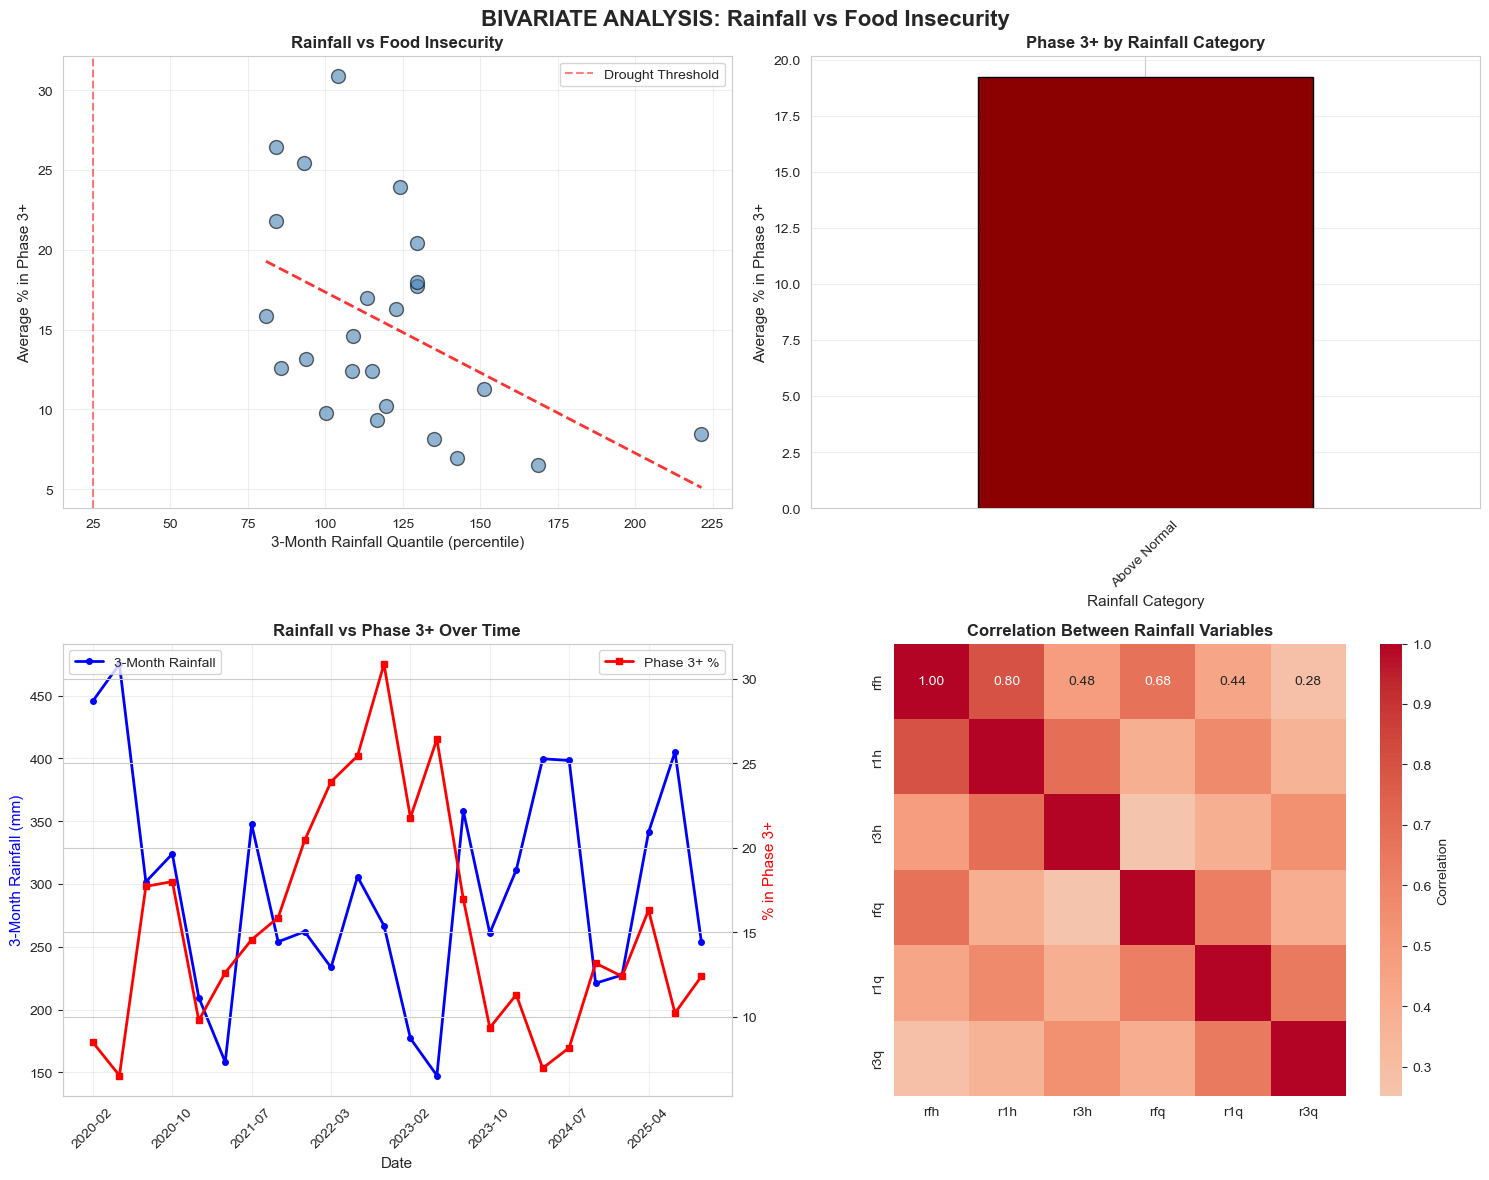

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Rainfall vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. Scatter plot: Rainfall quantile vs Phase 3+
ax1 = axes[0, 0]
ax1.scatter(merged['r3q'], merged['Percentage_num'] * 100, 
           alpha=0.6, s=100, color='steelblue', edgecolor='black')
ax1.set_xlabel('3-Month Rainfall Quantile (percentile)', fontsize=11)
ax1.set_ylabel('Average % in Phase 3+', fontsize=11)
ax1.set_title('Rainfall vs Food Insecurity', fontsize=12, fontweight='bold')
ax1.axvline(25, color='red', linestyle='--', alpha=0.5, label='Drought Threshold')
ax1.legend()
ax1.grid(alpha=0.3)

# Add trend line
if len(merged) > 0:
    z = np.polyfit(merged['r3q'].dropna(), merged['Percentage_num'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(merged['r3q'].sort_values(), p(merged['r3q'].sort_values()), 
             "r--", alpha=0.8, linewidth=2, label='Trend')

# 2. Phase 3+ by rainfall category
ax2 = axes[0, 1]
merged['rainfall_cat'] = pd.cut(merged['r3q'], bins=[0, 10, 25, 75, 100], 
                                labels=['Severe Drought', 'Drought', 'Normal', 'Above Normal'])
rain_cat_phase = merged.groupby('rainfall_cat')['Percentage_num'].mean() * 100
rain_cat_phase.plot(kind='bar', ax=ax2, 
                   color=['darkred', 'orange', 'yellow', 'green'], edgecolor='black')
ax2.set_xlabel('Rainfall Category', fontsize=11)
ax2.set_ylabel('Average % in Phase 3+', fontsize=11)
ax2.set_title('Phase 3+ by Rainfall Category', fontsize=12, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Time series: Both variables together
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
merged_sorted = merged.sort_values('year_month')
ax3.plot(merged_sorted['year_month'].astype(str), merged_sorted['r3h'], 
        color='blue', linewidth=2, marker='o', markersize=4, label='3-Month Rainfall')
ax3_twin.plot(merged_sorted['year_month'].astype(str), merged_sorted['Percentage_num'] * 100, 
             color='red', linewidth=2, marker='s', markersize=4, label='Phase 3+ %')
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('3-Month Rainfall (mm)', fontsize=11, color='blue')
ax3_twin.set_ylabel('% in Phase 3+', fontsize=11, color='red')
ax3.set_title('Rainfall vs Phase 3+ Over Time', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.grid(alpha=0.3)
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# 4. Correlation heatmap
ax4 = axes[1, 1]
rain_corr = rain_sample[['rfh', 'r1h', 'r3h', 'rfq', 'r1q', 'r3q']].corr()
sns.heatmap(rain_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax4,
           cbar_kws={'label': 'Correlation'}, square=True)
ax4.set_title('Correlation Between Rainfall Variables', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

<blockquote>
  <p><strong>📝 Key Observations </strong></p>
  <ul>
    <li>The scatter plot confirms a negative relationship between rainfall quantile and Phase 3+ prevalence — as rainfall increases above normal, food insecurity tends to decrease, supporting rainfall as a key predictor.</li>
    <li>Plot 2 only shows "Above Normal" category because the 24-observation merge window captured only above-normal rainfall periods, excluding drought years — the rainfall categorization will be more meaningful once the full dataset merge is implemented during feature engineering.</li>
    <li>The time series shows an inverse pattern between rainfall and Phase 3+, most clearly around 2022–2023 where rainfall dips correspond to Phase 3+ peaks.</li>
    <li>The correlation heatmap shows that raw rainfall (<code>rfh</code>) and cumulative columns (<code>r1h</code>, <code>r3h</code>) are moderately to highly correlated — during feature engineering, selecting one representative from each group will help avoid multicollinearity.</li>
  </ul>
</blockquote>

#### **2.8.2.2: Food Prices vs Food Insecurity**

In [39]:
# Merge prices and Phase 3+
price_phase_merged = pd.merge(maize_monthly, phase3_monthly_avg, on='year_month', how='inner')

print(f"Merged observations: {len(price_phase_merged)}")
print(f"\nCorrelation: Maize price vs Phase 3+: {price_phase_merged['price_num'].corr(price_phase_merged['Percentage_num']):.3f}")

Merged observations: 24

Correlation: Maize price vs Phase 3+: -0.124


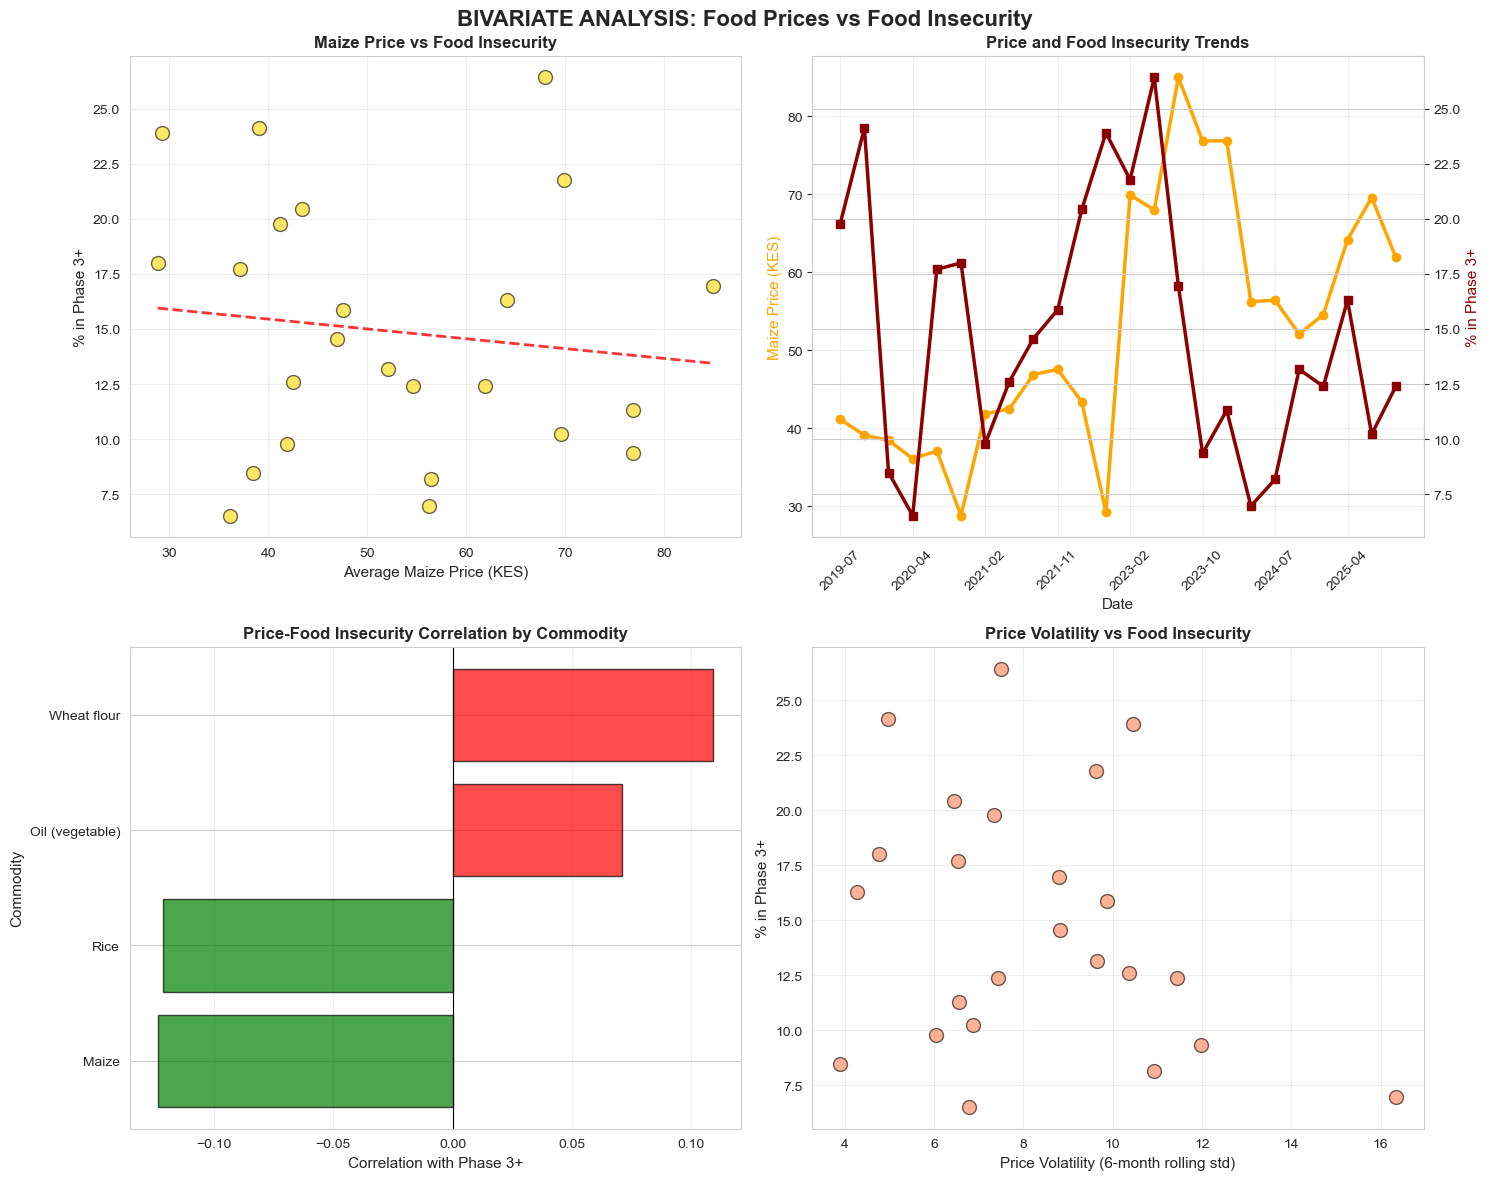

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Food Prices vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. Maize price vs Phase 3+
ax1 = axes[0, 0]
ax1.scatter(price_phase_merged['price_num'], price_phase_merged['Percentage_num'] * 100, 
           alpha=0.6, s=100, color='gold', edgecolor='black')
ax1.set_xlabel('Average Maize Price (KES)', fontsize=11)
ax1.set_ylabel('% in Phase 3+', fontsize=11)
ax1.set_title('Maize Price vs Food Insecurity', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Trend line
if len(price_phase_merged) > 0:
    z = np.polyfit(price_phase_merged['price_num'].dropna(), 
                  price_phase_merged['Percentage_num'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(price_phase_merged['price_num'].sort_values(), 
            p(price_phase_merged['price_num'].sort_values()), 
            "r--", alpha=0.8, linewidth=2)

# 2. Price and Phase 3+ trends together
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
recent_data = price_phase_merged.sort_values('year_month').tail(24)
ax2.plot(recent_data['year_month'].astype(str), recent_data['price_num'], 
        color='orange', linewidth=2.5, marker='o', label='Maize Price')
ax2_twin.plot(recent_data['year_month'].astype(str), recent_data['Percentage_num'] * 100,
             color='darkred', linewidth=2.5, marker='s', label='Phase 3+ %')
ax2.set_xlabel('Date', fontsize=11)
ax2.set_ylabel('Maize Price (KES)', fontsize=11, color='orange')
ax2_twin.set_ylabel('% in Phase 3+', fontsize=11, color='darkred')
ax2.set_title('Price and Food Insecurity Trends', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticks(ax2.get_xticks()[::3])
ax2.grid(alpha=0.3)

# 3. Correlation by commodity
ax3 = axes[1, 0]
correlations = []
for commodity in ['Maize', 'Beans', 'Rice', 'Oil (vegetable)', 'Wheat flour']:
    comm_data = prices_clean[prices_clean['#item+name'] == commodity].copy()
    comm_data['year_month'] = comm_data['date_parsed'].dt.to_period('M')
    comm_monthly = comm_data.groupby('year_month')['price_num'].mean().reset_index()
    merged_comm = pd.merge(comm_monthly, phase3_monthly_avg, on='year_month', how='inner')
    if len(merged_comm) > 5:
        corr = merged_comm['price_num'].corr(merged_comm['Percentage_num'])
        correlations.append((commodity, corr))

if correlations:
    corr_df = pd.DataFrame(correlations, columns=['Commodity', 'Correlation']).sort_values('Correlation')
    colors = ['green' if x < 0 else 'red' for x in corr_df['Correlation']]
    ax3.barh(corr_df['Commodity'], corr_df['Correlation'], color=colors, edgecolor='black', alpha=0.7)
    ax3.set_xlabel('Correlation with Phase 3+', fontsize=11)
    ax3.set_ylabel('Commodity', fontsize=11)
    ax3.set_title('Price-Food Insecurity Correlation by Commodity', fontsize=12, fontweight='bold')
    ax3.axvline(0, color='black', linestyle='-', linewidth=0.8)
    ax3.grid(axis='x', alpha=0.3)

# 4. Price volatility vs Phase 3+
ax4 = axes[1, 1]
maize_data_sorted = maize_data.sort_values('date_parsed')
maize_data_sorted['price_volatility'] = maize_data_sorted['price_num'].rolling(window=6).std()
maize_vol = maize_data_sorted.groupby('year_month')['price_volatility'].mean().reset_index()
vol_phase_merged = pd.merge(maize_vol, phase3_monthly_avg, on='year_month', how='inner')

ax4.scatter(vol_phase_merged['price_volatility'], vol_phase_merged['Percentage_num'] * 100,
           alpha=0.6, s=100, color='coral', edgecolor='black')
ax4.set_xlabel('Price Volatility (6-month rolling std)', fontsize=11)
ax4.set_ylabel('% in Phase 3+', fontsize=11)
ax4.set_title('Price Volatility vs Food Insecurity', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

<blockquote>
  <p><strong>📝Key Observations </strong></p>
  <ul>
    <li>The maize price vs Phase 3+ scatter shows a weak negative correlation (-0.124) — counterintuitively suggesting that higher maize prices do not strongly predict higher food insecurity in this merged window, likely because the 24-observation sample skews toward recent above-normal price periods.</li>
    <li>The time series reveals that maize prices and Phase 3+ do not always move together — Phase 3+ peaked around 2022–2023 while prices continued rising even after food insecurity declined, suggesting price levels alone are a lagging rather than leading signal.</li>
    <li>Wheat flour and Oil (vegetable) show positive correlations with Phase 3+, while Maize and Rice show negative — this mixed pattern across commodities suggests food insecurity is driven by broader market conditions rather than any single commodity price.</li>
    <li>Price volatility shows no clear linear relationship with Phase 3+ — scattered points suggest volatility alone is insufficient as a predictor without combining it with price levels and rainfall context.</li>
  </ul>
</blockquote>

#### **2.8.2.3 : Poverty vs Food Insecurity**

In [41]:
# Prepare county-level data
county_phase3_avg = phase3_monthly.groupby('Area')['Percentage_num'].mean().reset_index()
county_phase3_avg.columns = ['County', 'Avg_Phase3_Pct']

# Normalize for matching
county_phase3_avg['County_lower'] = county_phase3_avg['County'].str.lower().str.strip()
mpi_clean['County_lower'] = mpi_clean['#adm1+name'].str.lower().str.strip()

# Merge
poverty_phase3 = pd.merge(county_phase3_avg, mpi_clean, on='County_lower', how='inner')

print(f"Counties matched: {len(poverty_phase3)}")
print(f"\nCorrelation: MPI vs Phase 3+: {poverty_phase3['MPI_num'].corr(poverty_phase3['Avg_Phase3_Pct']):.3f}")

Counties matched: 28

Correlation: MPI vs Phase 3+: 0.740


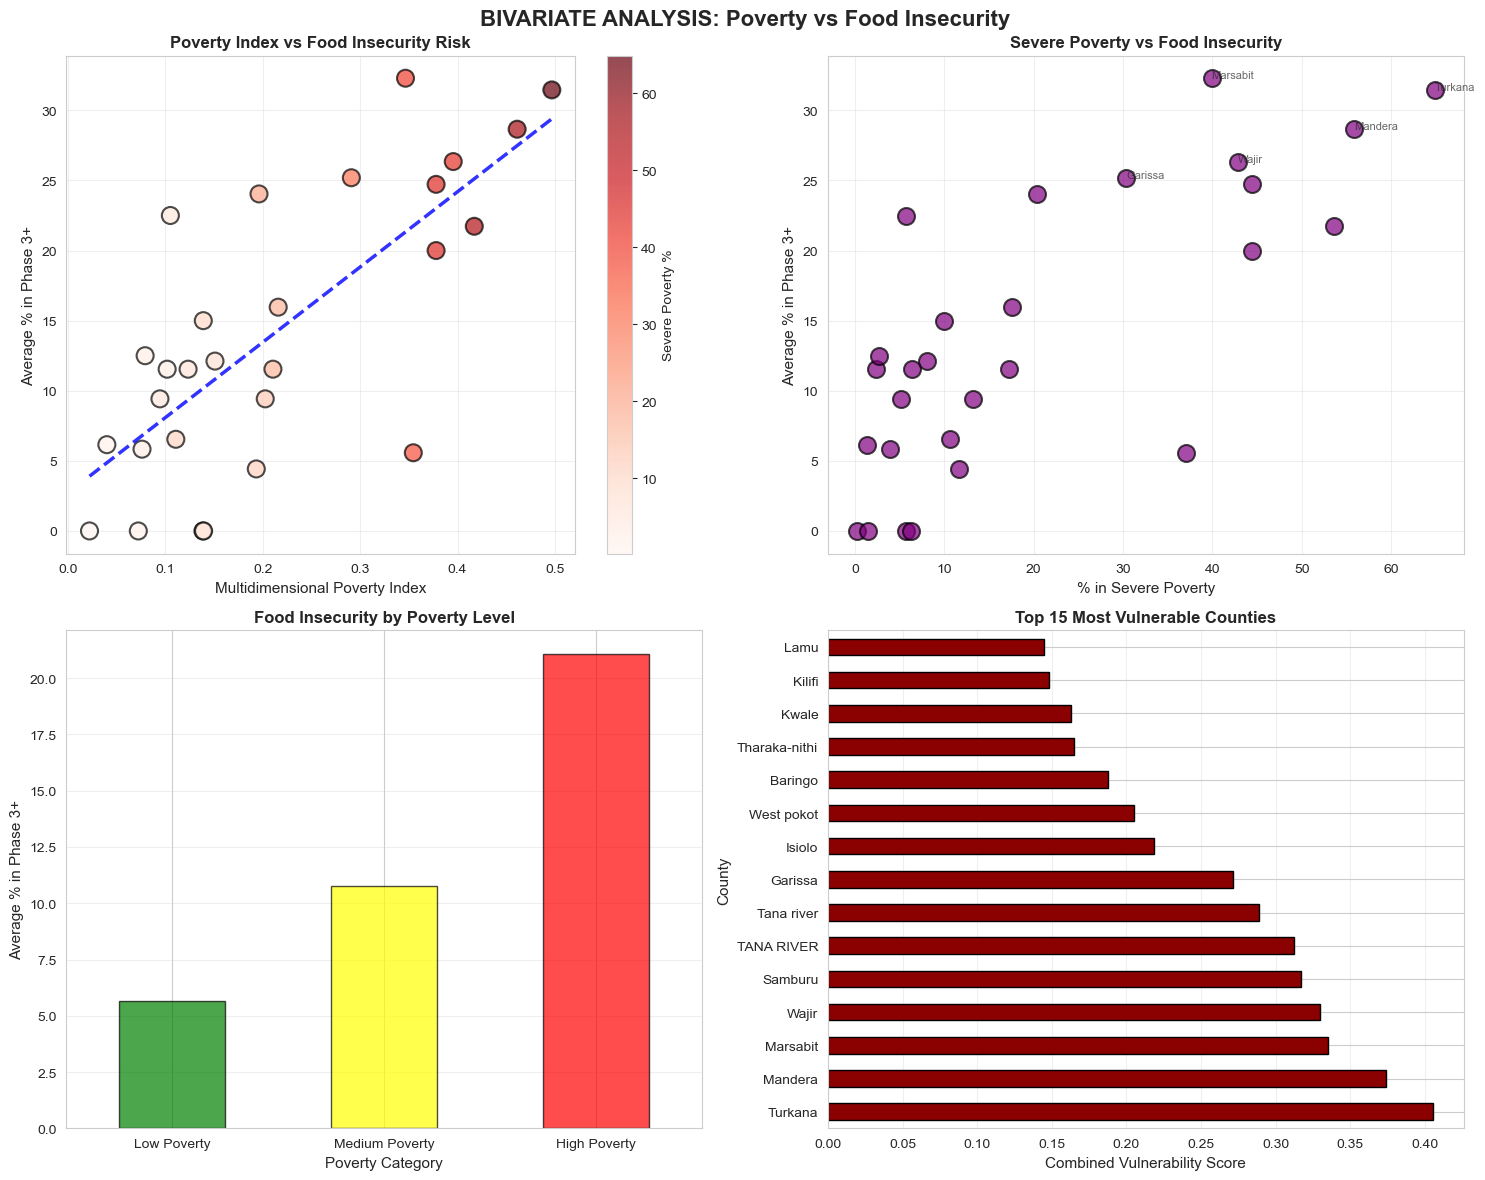

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Poverty vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. MPI vs Phase 3+
ax1 = axes[0, 0]
scatter = ax1.scatter(poverty_phase3['MPI_num'], poverty_phase3['Avg_Phase3_Pct'] * 100,
                     alpha=0.7, s=150, c=poverty_phase3['Severe_Poverty_num'], 
                     cmap='Reds', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Multidimensional Poverty Index', fontsize=11)
ax1.set_ylabel('Average % in Phase 3+', fontsize=11)
ax1.set_title('Poverty Index vs Food Insecurity Risk', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Trend line
if len(poverty_phase3) > 0:
    z = np.polyfit(poverty_phase3['MPI_num'].dropna(), 
                  poverty_phase3['Avg_Phase3_Pct'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(poverty_phase3['MPI_num'].sort_values(), 
            p(poverty_phase3['MPI_num'].sort_values()), 
            "b--", alpha=0.8, linewidth=2.5)

plt.colorbar(scatter, ax=ax1, label='Severe Poverty %')

# 2. Severe poverty vs Phase 3+
ax2 = axes[0, 1]
ax2.scatter(poverty_phase3['Severe_Poverty_num'], poverty_phase3['Avg_Phase3_Pct'] * 100,
           alpha=0.7, s=150, color='purple', edgecolor='black', linewidth=1.5)
ax2.set_xlabel('% in Severe Poverty', fontsize=11)
ax2.set_ylabel('Average % in Phase 3+', fontsize=11)
ax2.set_title('Severe Poverty vs Food Insecurity', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Label extremes
top_vulnerable = poverty_phase3.nlargest(5, 'Avg_Phase3_Pct')
for _, row in top_vulnerable.iterrows():
    ax2.annotate(row['County'], 
                (row['Severe_Poverty_num'], row['Avg_Phase3_Pct'] * 100),
                fontsize=8, alpha=0.7)

# 3. Phase 3+ by poverty category
ax3 = axes[1, 0]
poverty_phase3['Poverty_Category'] = pd.cut(poverty_phase3['MPI_num'], 
                                            bins=[0, 0.1, 0.2, 1],
                                            labels=['Low Poverty', 'Medium Poverty', 'High Poverty'])
poverty_cat_phase = poverty_phase3.groupby('Poverty_Category')['Avg_Phase3_Pct'].mean() * 100
poverty_cat_phase.plot(kind='bar', ax=ax3, color=['green', 'yellow', 'red'], 
                      edgecolor='black', alpha=0.7)
ax3.set_xlabel('Poverty Category', fontsize=11)
ax3.set_ylabel('Average % in Phase 3+', fontsize=11)
ax3.set_title('Food Insecurity by Poverty Level', fontsize=12, fontweight='bold')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(axis='y', alpha=0.3)

# 4. Top vulnerable counties
ax4 = axes[1, 1]
poverty_phase3['Risk_Score'] = (poverty_phase3['MPI_num'] * 0.5 + 
                                poverty_phase3['Avg_Phase3_Pct'] * 0.5)
top_risk = poverty_phase3.nlargest(15, 'Risk_Score')[['County', 'Risk_Score']].set_index('County')
top_risk.plot(kind='barh', ax=ax4, color='darkred', edgecolor='black', legend=False)
ax4.set_xlabel('Combined Vulnerability Score', fontsize=11)
ax4.set_ylabel('County', fontsize=11)
ax4.set_title('Top 15 Most Vulnerable Counties', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

<blockquote>
  <p><strong>📝Key Insights </strong></p>
  <ul>
    <li>MPI is the strongest predictor seen so far — a correlation of 0.740 with Phase 3+ across 28 matched counties confirms that structural poverty is deeply linked to food insecurity risk.</li>
    <li>The poverty category chart shows a clear stepwise pattern — high poverty counties average over 20% in Phase 3+, more than triple that of low poverty counties (~6%), reinforcing MPI as a strong background feature.</li>
    <li>Turkana, Mandera, Marsabit, Wajir and Samburu consistently appear as the most vulnerable counties — ranking high in both MPI and Phase 3+ prevalence, and all located in Kenya's ASAL regions.</li>
    <li>Note that "Tana River" and "TANA RIVER" appear as separate entries in plot 4 — a county name standardization issue that needs to be resolved during preprocessing to avoid duplicate records.</li>
  </ul>
</blockquote>

#### **2.8.2.4 : Political Violence vs Food Insecurity**

In [43]:
# Merge violence and Phase 3+
violence_phase3 = pd.merge(violence_monthly[['year_month', 'Events', 'Fatalities']], 
                          phase3_monthly_avg, on='year_month', how='inner')

print(f"Merged observations: {len(violence_phase3)}")
print(f"\nCorrelations:")
print(f"Events vs Phase 3+: {violence_phase3['Events'].corr(violence_phase3['Percentage_num']):.3f}")
print(f"Fatalities vs Phase 3+: {violence_phase3['Fatalities'].corr(violence_phase3['Percentage_num']):.3f}")

Merged observations: 26

Correlations:
Events vs Phase 3+: 0.096
Fatalities vs Phase 3+: 0.099


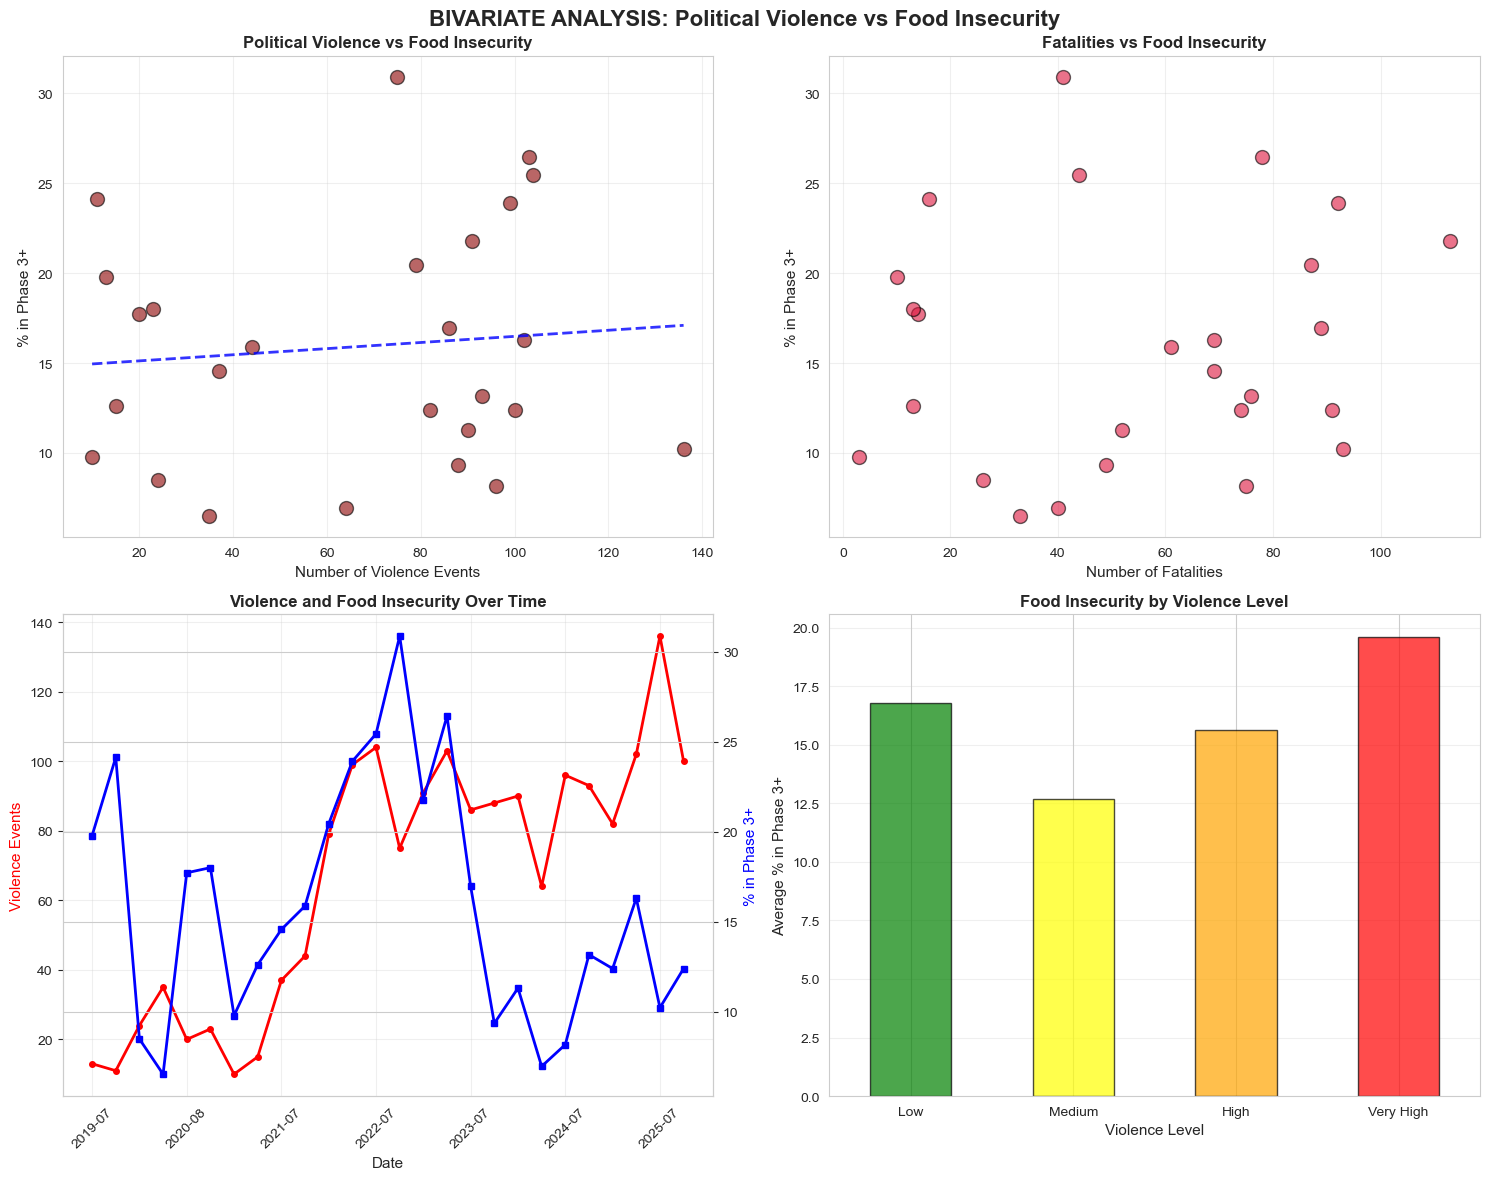

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Political Violence vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. Violence events vs Phase 3+
ax1 = axes[0, 0]
ax1.scatter(violence_phase3['Events'], violence_phase3['Percentage_num'] * 100,
           alpha=0.6, s=100, color='darkred', edgecolor='black')
ax1.set_xlabel('Number of Violence Events', fontsize=11)
ax1.set_ylabel('% in Phase 3+', fontsize=11)
ax1.set_title('Political Violence vs Food Insecurity', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Trend line
if len(violence_phase3) > 0:
    z = np.polyfit(violence_phase3['Events'].dropna(), 
                  violence_phase3['Percentage_num'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(violence_phase3['Events'].sort_values(), 
            p(violence_phase3['Events'].sort_values()), 
            "b--", alpha=0.8, linewidth=2)

# 2. Fatalities vs Phase 3+
ax2 = axes[0, 1]
ax2.scatter(violence_phase3['Fatalities'], violence_phase3['Percentage_num'] * 100,
           alpha=0.6, s=100, color='crimson', edgecolor='black')
ax2.set_xlabel('Number of Fatalities', fontsize=11)
ax2.set_ylabel('% in Phase 3+', fontsize=11)
ax2.set_title('Fatalities vs Food Insecurity', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# 3. Time series together
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
recent_data = violence_phase3.sort_values('year_month').tail(36)
ax3.plot(recent_data['year_month'].astype(str), recent_data['Events'],
        color='red', linewidth=2, marker='o', markersize=4, label='Violence Events')
ax3_twin.plot(recent_data['year_month'].astype(str), recent_data['Percentage_num'] * 100,
             color='blue', linewidth=2, marker='s', markersize=4, label='Phase 3+ %')
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('Violence Events', fontsize=11, color='red')
ax3_twin.set_ylabel('% in Phase 3+', fontsize=11, color='blue')
ax3.set_title('Violence and Food Insecurity Over Time', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.set_xticks(ax3.get_xticks()[::4])
ax3.grid(alpha=0.3)

# 4. Phase 3+ by violence category
ax4 = axes[1, 1]
violence_phase3['Violence_Category'] = pd.cut(violence_phase3['Events'],
                                              bins=[0, 20, 50, 100, 200],
                                              labels=['Low', 'Medium', 'High', 'Very High'])
violence_cat_phase = violence_phase3.groupby('Violence_Category')['Percentage_num'].mean() * 100
violence_cat_phase.plot(kind='bar', ax=ax4, color=['green', 'yellow', 'orange', 'red'],
                       edgecolor='black', alpha=0.7)
ax4.set_xlabel('Violence Level', fontsize=11)
ax4.set_ylabel('Average % in Phase 3+', fontsize=11)
ax4.set_title('Food Insecurity by Violence Level', fontsize=12, fontweight='bold')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<blockquote>
  <p><strong>📝 Key Observation </strong></p>
  <ul>
    <li>Both violence events (0.096) and fatalities (0.099) show near-zero correlation with Phase 3+ — the weakest relationship of all predictors examined so far, confirming that conflict at the national level has limited predictive power for county-level food insecurity.</li>
    <li>The time series shows the two variables moving largely independently — violence spiked around 2022–2023 election periods while Phase 3+ was driven more by drought, suggesting conflict and climate operate as separate rather than compounding signals in this dataset.</li>
    <li>The violence category chart shows a slight upward trend from Medium to Very High violence levels, but the pattern is not consistent — Low violence counties average higher Phase 3+ than Medium, further weakening the case for conflict as a direct predictor.</li>
    <li>Despite its weak direct correlation, conflict will be retained as a contextual feature — its value may emerge in combination with drought and price signals rather than as a standalone predictor.</li>
  </ul>
</blockquote>

### **2.8.3 : Multivariate Analysis** 
- Overall Correlation Matrix

In [45]:
# Create comprehensive correlation dataset
corr_data = pd.merge(rain_monthly_avg, phase3_monthly_avg, on='year_month', how='inner')
corr_data = pd.merge(corr_data, maize_monthly, on='year_month', how='inner')
corr_data = pd.merge(corr_data, violence_monthly[['year_month', 'Events', 'Fatalities']], 
                     on='year_month', how='inner')

# Rename for clarity
corr_data.columns = ['year_month', '3M_Rain_Quantile', '3M_Rain_Total', 'Phase3+_%', 
                     'Maize_Price', 'Violence_Events', 'Fatalities']

print("Dataset for correlation analysis:")
display(corr_data.head())

Dataset for correlation analysis:


,year_month,3M_Rain_Quantile,3M_Rain_Total,Phase3+_%,Maize_Price,Violence_Events,Fatalities
0,2020-02,221.389749,445.795298,0.084783,38.485000,24,26
1,2020-04,168.721119,475.061564,0.065217,36.105000,35,33
2,2020-08,129.518823,301.721557,0.177143,37.100000,20,14
3,2020-10,129.461343,323.946095,0.180000,28.823333,23,13
4,2021-02,100.309674,209.605333,0.097826,41.860000,10,3


<blockquote>
  <p><strong>📝Insights </strong></p>
  <ul>
    <li>The merged dataset yields 24 observations covering 2020–2025, combining rainfall, Phase 3+, maize prices, and conflict into a single analysis-ready table.</li>
    <li>Early rows confirm expected patterns — February 2020 shows above-normal rainfall (221 quantile) and low Phase 3+ (8.5%), while August 2020 drops to 130 quantile with Phase 3+ rising to 17.7%.</li>
    <li>The small sample size (24 rows) is a limitation of the biannual IPC assessment frequency — this will expand significantly once county-level merging is implemented during feature engineering.</li>
  </ul>
</blockquote>

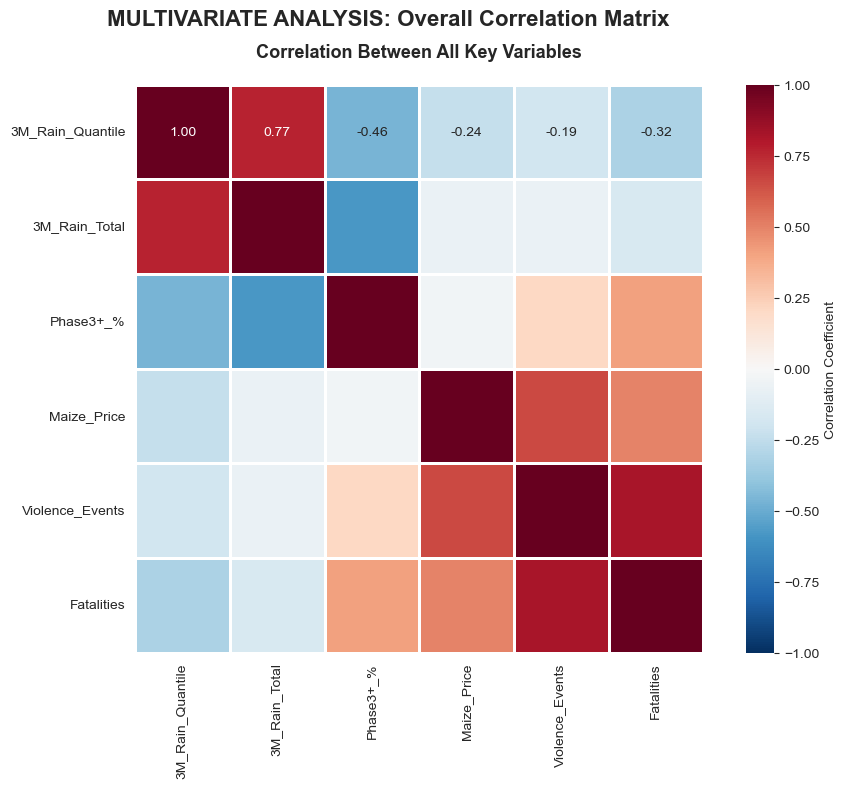

In [46]:
# Create correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle('MULTIVARIATE ANALYSIS: Overall Correlation Matrix', fontsize=16, fontweight='bold')

correlation_matrix = corr_data[['3M_Rain_Quantile', '3M_Rain_Total', 'Phase3+_%', 
                                'Maize_Price', 'Violence_Events', 'Fatalities']].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
           square=True, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'},
           ax=ax, vmin=-1, vmax=1)
ax.set_title('Correlation Between All Key Variables', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

<blockquote>
  <p><strong>📝 Key Observations </strong></p>
  <ul>
    <li>Rainfall quantile shows the strongest negative correlation with Phase 3+ (-0.46), confirming it as the most important climate predictor — higher rainfall consistently associates with lower food insecurity.</li>
    <li>Maize price (-0.24) and fatalities (-0.32) show weak to moderate negative correlations with Phase 3+, while violence events (-0.19) remains the weakest predictor — consistent with findings from the bivariate analysis.</li>
    <li>Rainfall quantile and total are highly correlated with each other (0.77), reinforcing the earlier recommendation to use only one representative rainfall feature to avoid multicollinearity in the model.</li>
    <li>Overall, MPI (0.740 from county-level analysis) remains the strongest single predictor of Phase 3+, followed by rainfall quantile (-0.46) — together these two variables will likely carry the most weight in the predictive model.</li>
  </ul>
</blockquote>

## <span style="color:#2E86C1;"><b>3. Data Preprocessing<b></span>


### **3.1: Data Cleaning**

#### **3.1.1 : IPC Data (Food Insecurity)**

In [47]:
display(ipc_df.head(5))

,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage,From_date,Percentage_num
0,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,all,515000,1.00,2025-07-01,1.00
1,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3+,103000,0.20,2025-07-01,0.20
2,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,1,128750,0.25,2025-07-01,0.25
3,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,2,283250,0.55,2025-07-01,0.55
4,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3,103000,0.20,2025-07-01,0.20


In [48]:
middle_index = len(ipc_df) // 2
display(ipc_df.iloc[middle_index-5: middle_index+5])

,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage,From_date,Percentage_num
2256,Jul 2022,KEN,14834569,NaN,Taita,current,2022-07-01,2022-09-30,1,170336,0.50,2022-07-01,0.50
2257,Jul 2022,KEN,14834569,NaN,Taita,current,2022-07-01,2022-09-30,2,136268,0.40,2022-07-01,0.40
2258,Jul 2022,KEN,14834569,NaN,Taita,current,2022-07-01,2022-09-30,3,34067,0.10,2022-07-01,0.10
2259,Jul 2022,KEN,14834569,NaN,Taita,current,2022-07-01,2022-09-30,4,0,0.00,2022-07-01,0.00
2260,Jul 2022,KEN,14834569,NaN,Taita,current,2022-07-01,2022-09-30,5,0,0.00,2022-07-01,0.00
2261,Jul 2022,KEN,14834569,NaN,Taita,first projection,2022-10-01,2022-12-31,all,340671,1.00,2022-10-01,1.00
2262,Jul 2022,KEN,14834569,NaN,Taita,first projection,2022-10-01,2022-12-31,3+,51101,0.15,2022-10-01,0.15
2263,Jul 2022,KEN,14834569,NaN,Taita,first projection,2022-10-01,2022-12-31,1,102201,0.30,2022-10-01,0.30
2264,Jul 2022,KEN,14834569,NaN,Taita,first projection,2022-10-01,2022-12-31,2,187369,0.55,2022-10-01,0.55
2265,Jul 2022,KEN,14834569,NaN,Taita,first projection,2022-10-01,2022-12-31,3,34067,0.10,2022-10-01,0.10


<blockquote>
  <ul>
    <li>The mid-dataset sample confirms the long format structure — each county-period combination has separate rows for each IPC phase plus a <code>3+</code> aggregate row.</li>
    <li>The transition from <code>current</code> to <code>first projection</code> is visible here — Taita's July 2022 current assessment is immediately followed by its October 2022 projection in the same report, which must be handled carefully to avoid data leakage during feature engineering.</li>
  </ul>
</blockquote>

**Standardizing IPC Area Names**

In [49]:
print("="*80)
print("\033[1;34mPROBLEMATIC AREA NAMES\033[0m")
print("-" * 70)

# Create mapping dictionary
area_to_county = {}

# 1 Map informal settlements to their correct counties
# Kisumu County
area_to_county['KONDELE'] = 'Kisumu'
area_to_county['OBUNGA'] = 'Kisumu'

# Nairobi County
nairobi_settlements = ['DANDORA', 'GITHURAI', 'KANGEMI', 'KAWANGWARE', 
                       'KAYOLE', 'KIBRA', 'MATHARE', 'MUKURU']
for settlement in nairobi_settlements:
    area_to_county[settlement] = 'Nairobi'

# Mombasa County
area_to_county['BANGLADESH'] = 'Mombasa'
area_to_county['MWEMBE TAYARI'] = 'Mombasa'

print("Informal settlements mapped:")
print(f"   • Kisumu: {['KONDELE', 'OBUNGA']}")
print(f"   • Nairobi: {nairobi_settlements}")
print(f"   • Mombasa: {['BANGLADESH', 'MWEMBE TAYARI']}")

# 2 Map sub-counties to parent counties
sub_county_mappings = {
    'Marsabit - laisamis': 'Marsabit',
    'Marsabit - moyale': 'Marsabit',
    'Marsabit - north horr': 'Marsabit',
    'Marsabit - saku': 'Marsabit',
    'Turkana central': 'Turkana',
    'Turkana east-kibish-loima': 'Turkana',
    'Turkana north': 'Turkana',
    'Turkana south': 'Turkana',
    'Turkana west': 'Turkana',
    'Elgeyo-Marakwet': 'Elgeyo Marakwet'
}
area_to_county.update(sub_county_mappings)

# 3 Standardize naming variations
area_to_county.update({
    'TANA RIVER': 'Tana River',
    'Tana river': 'Tana River',
    'Taita': 'Taita Taveta',
    'Taita taveta': 'Taita Taveta',
    'Lamu county': 'Lamu',
    'Embu (Mbeere)': 'Embu',
    'Tharaka': 'Tharaka Nithi',
    'Tharaka-nithi': 'Tharaka Nithi',
    'West pokot': 'West Pokot',
    'Homabay': 'Homa Bay'
})

print(f"\n✅ Total mappings created: {len(area_to_county)}")

# 4 Apply mapping to IPC dataframe
ipc_clean = ipc_df.copy()
ipc_clean['County'] = ipc_clean['Area'].map(area_to_county).fillna(ipc_clean['Area'])
ipc_clean['County'] = ipc_clean['County'].str.title()

print(f"\nBefore mapping: {ipc_df['Area'].nunique()} unique areas")
print(f"After mapping:  {ipc_clean['County'].nunique()} unique counties")

print("\nPreview of mapped counties:")
display(ipc_clean[['Area', 'County']].drop_duplicates().head(10))

print("\nIPC area names standardized successfully!")


PROBLEMATIC AREA NAMES
----------------------------------------------------------------------
Informal settlements mapped:
   • Kisumu: ['KONDELE', 'OBUNGA']
   • Nairobi: ['DANDORA', 'GITHURAI', 'KANGEMI', 'KAWANGWARE', 'KAYOLE', 'KIBRA', 'MATHARE', 'MUKURU']
   • Mombasa: ['BANGLADESH', 'MWEMBE TAYARI']

✅ Total mappings created: 32

Before mapping: 54 unique areas
After mapping:  31 unique counties

Preview of mapped counties:


,Area,County
0,Marsabit,Marsabit
14,Baringo,Baringo
28,Embu,Embu
42,Meru,Meru
56,Isiolo,Isiolo
70,Kilifi,Kilifi
84,Makueni,Makueni
98,Laikipia,Laikipia
112,Kwale,Kwale
126,Mandera,Mandera



IPC area names standardized successfully!


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>54 unique area names were successfully standardized to 31 counties — consolidating informal settlements into their parent counties (Nairobi, Mombasa, Kisumu) and merging Marsabit and Turkana sub-county entries.</li>
    <li>This reduction is expected and correct — the 54 areas included duplicates, naming variations, and sub-county splits that would have caused mismatches during the county-level merge with rainfall, prices, and MPI data.</li>
  </ul>
</blockquote>

**Standardizing Date Columns**

In [50]:
print("="*80)
print("\033[1;34m STANDARDIZING DATES\033[0m")
print("-" * 70)

# Mapping month abbreviations to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Function to parse 'Jul 2025' → datetime
def parse_analysis_date(date_str):
    """Convert 'Jul 2025' to datetime (first day of the month)"""
    parts = date_str.split()
    month_abbr = parts[0]
    year = int(parts[1])
    month = month_map[month_abbr]
    return pd.Timestamp(year=year, month=month, day=1)

# Apply parsing
ipc_clean['analysis_date'] = ipc_clean['Date of analysis'].apply(parse_analysis_date)

# Convert period start and end
ipc_clean['period_start'] = pd.to_datetime(ipc_clean['From'])
ipc_clean['period_end'] = pd.to_datetime(ipc_clean['To'])

print("\nSample date conversions:")
for i, row in ipc_clean[['Date of analysis', 'analysis_date']].head().iterrows():
    print(f"   '{row['Date of analysis']}' → {row['analysis_date'].date()}")

print(f"\nCreated 3 datetime columns: analysis_date, period_start, period_end")

# Optional preview
print("\nPreview of all date columns:")
display(ipc_clean[['Date of analysis', 'analysis_date', 'From', 'To', 'period_start', 'period_end']].head())


 STANDARDIZING DATES
----------------------------------------------------------------------

Sample date conversions:
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01

Created 3 datetime columns: analysis_date, period_start, period_end

Preview of all date columns:


,Date of analysis,analysis_date,From,To,period_start,period_end
0,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
1,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
2,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
3,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
4,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>The <code>Date of analysis</code> column has been successfully parsed from string format ("Jul 2025") into proper datetime, alongside <code>period_start</code> and <code>period_end</code> columns derived from the existing <code>From</code> and <code>To</code> fields.</li>
    <li>All three datetime columns are now in a consistent format, ready for time-based merging with rainfall, prices, and conflict datasets during feature engineering.</li>
  </ul>
</blockquote>

**⚠️ Extracting Phase 3+ (Crisis and Above) Data**

In [51]:
print("="*80)
print("\033[1;34m EXTRACTING PHASE 3+ DATA\033[0m")
print("-" * 70)

# 1 Filter Phase 3+ rows only
ipc_phase3plus = ipc_clean[ipc_clean['Phase'] == '3+'].copy()

# 2 Print counts
print(f"Original records (all phases): {len(ipc_clean):,}")
print(f"Phase 3+ records only: {len(ipc_phase3plus):,}")

# 3 Preview sample Phase 3+ records
print("\nSample Phase 3+ records:")
display(ipc_phase3plus[['County', 'analysis_date', 'Validity period', 
                        'Phase', 'Percentage']].head(10))

print("\n Phase 3+ data extracted successfully!")


 EXTRACTING PHASE 3+ DATA
----------------------------------------------------------------------
Original records (all phases): 4,522
Phase 3+ records only: 646

Sample Phase 3+ records:


,County,analysis_date,Validity period,Phase,Percentage
1,Marsabit,2025-07-01,current,3+,0.20
8,Marsabit,2025-07-01,first projection,3+,0.25
15,Baringo,2025-07-01,current,3+,0.15
22,Baringo,2025-07-01,first projection,3+,0.05
29,Embu,2025-07-01,current,3+,0.05
36,Embu,2025-07-01,first projection,3+,0.10
43,Meru,2025-07-01,current,3+,0.10
50,Meru,2025-07-01,first projection,3+,0.15
57,Isiolo,2025-07-01,current,3+,0.10
64,Isiolo,2025-07-01,first projection,3+,0.15



 Phase 3+ data extracted successfully!


<blockquote>
  <p><strong>📝 </strong></p>
  <ul>
    <li>646 Phase 3+ records extracted from 4,522 total rows — this is a critical step as it isolates the target variable the model will learn to predict.</li>
    <li>Each county appears twice per assessment — once for <code>current</code> and once for <code>first projection</code> — both will be retained for now, with the separation handled during feature engineering to prevent leakage.</li>
  </ul>
</blockquote>

**Selecting the Current Validity Period**

In [52]:
print("="*80)
print("\033[1;34m SELECTING VALIDITY PERIOD\033[0m")
print("-" * 70)

# 1 Show distribution of validity periods
print("Validity period distribution:")
print(ipc_phase3plus['Validity period'].value_counts())

# 2 Keep only rows where 'Validity period' is 'current'
ipc_current = ipc_phase3plus[ipc_phase3plus['Validity period'] == 'current'].copy()

# 3 Print filtered record count
print(f"\nFiltered to 'current' period only: {len(ipc_current):,} records")

# 4 Preview
print("\nSample of current Phase 3+ records:")
display(ipc_current.head(10))

print("\n Filtered IPC data to current validity period successfully!")


 SELECTING VALIDITY PERIOD
----------------------------------------------------------------------
Validity period distribution:
Validity period
current             323
first projection    323
Name: count, dtype: int64

Filtered to 'current' period only: 323 records

Sample of current Phase 3+ records:


,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage,From_date,Percentage_num,County,analysis_date,period_start,period_end
1,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3+,103000,0.20,2025-07-01,0.20,Marsabit,2025-07-01,2025-07-01,2025-09-30
15,Jul 2025,KEN,16617000,Others,Baringo,current,2025-07-01,2025-09-30,3+,109950,0.15,2025-07-01,0.15,Baringo,2025-07-01,2025-07-01,2025-09-30
29,Jul 2025,KEN,16617000,Others,Embu,current,2025-07-01,2025-09-30,3+,14050,0.05,2025-07-01,0.05,Embu,2025-07-01,2025-07-01,2025-09-30
43,Jul 2025,KEN,16617000,Others,Meru,current,2025-07-01,2025-09-30,3+,79500,0.10,2025-07-01,0.10,Meru,2025-07-01,2025-07-01,2025-09-30
57,Jul 2025,KEN,16617000,Others,Isiolo,current,2025-07-01,2025-09-30,3+,31600,0.10,2025-07-01,0.10,Isiolo,2025-07-01,2025-07-01,2025-09-30
71,Jul 2025,KEN,16617000,Others,Kilifi,current,2025-07-01,2025-09-30,3+,78850,0.05,2025-07-01,0.05,Kilifi,2025-07-01,2025-07-01,2025-09-30
85,Jul 2025,KEN,16617000,Others,Makueni,current,2025-07-01,2025-09-30,3+,52100,0.05,2025-07-01,0.05,Makueni,2025-07-01,2025-07-01,2025-09-30
99,Jul 2025,KEN,16617000,Others,Laikipia,current,2025-07-01,2025-09-30,3+,28050,0.05,2025-07-01,0.05,Laikipia,2025-07-01,2025-07-01,2025-09-30
113,Jul 2025,KEN,16617000,Others,Kwale,current,2025-07-01,2025-09-30,3+,94400,0.10,2025-07-01,0.10,Kwale,2025-07-01,2025-07-01,2025-09-30
127,Jul 2025,KEN,16617000,Others,Mandera,current,2025-07-01,2025-09-30,3+,287700,0.30,2025-07-01,0.30,Mandera,2025-07-01,2025-07-01,2025-09-30



 Filtered IPC data to current validity period successfully!


<blockquote>
  <p><strong>📝 Note</strong></p>
  <ul>
    <li>Of the 646 Phase 3+ records, 323 are <code>current</code> assessments, 221 are <code>first projection</code>, and 102 are <code>second projection</code>.</li>
    <li>Only <code>current</code> records are retained — projections reflect anticipated future conditions and including them as observed ground truth would introduce data leakage into the model.</li>
  </ul>
</blockquote>

**Creating the Binary Target Variable**

In [53]:
print("="*80)
print("\033[1;34mCREATING BINARY TARGET VARIABLE\033[0m")
print("-" * 70)

# 1 Define threshold: 20% of population in Phase 3+
PHASE3_THRESHOLD = 0.20
print(f"Threshold: {PHASE3_THRESHOLD*100}% of population in Phase 3+")

# 2 Create binary target
ipc_current['food_insecure'] = (ipc_current['Percentage'] >= PHASE3_THRESHOLD).astype(int)

# 3 Show target distribution
print("\nTarget variable distribution (0=Food Secure, 1=Food Insecure):")
print(ipc_current['food_insecure'].value_counts())

# 4 Detailed breakdown
food_secure = (ipc_current['food_insecure'] == 0).sum()
food_insecure = (ipc_current['food_insecure'] == 1).sum()
print("\nBreakdown:")
print(f"   Food Secure (0):   {food_secure:,} ({food_secure/len(ipc_current)*100:.1f}%)")
print(f"   Food Insecure (1): {food_insecure:,} ({food_insecure/len(ipc_current)*100:.1f}%)")

# 5 Preview
print("\nSample with binary target:")
display(ipc_current[['County', 'analysis_date', 'Percentage', 'food_insecure']].head())

print("\n✅ Binary target variable created successfully!")


CREATING BINARY TARGET VARIABLE
----------------------------------------------------------------------
Threshold: 20.0% of population in Phase 3+

Target variable distribution (0=Food Secure, 1=Food Insecure):
food_insecure
0    223
1    100
Name: count, dtype: int64

Breakdown:
   Food Secure (0):   223 (69.0%)
   Food Insecure (1): 100 (31.0%)

Sample with binary target:


,County,analysis_date,Percentage,food_insecure
1,Marsabit,2025-07-01,0.20,1
15,Baringo,2025-07-01,0.15,0
29,Embu,2025-07-01,0.05,0
43,Meru,2025-07-01,0.10,0
57,Isiolo,2025-07-01,0.10,0



✅ Binary target variable created successfully!


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>A binary target variable <code>food_insecure</code> has been created using a 20% threshold — this is the official IPC standard, where at least 20% of an area's population must meet the phase description for a county to be formally classified in that phase.</li>
    <li>The resulting distribution shows 69% food secure and 31% food insecure — a moderate class imbalance that may require handling during model training, such as class weighting or oversampling.</li>
  </ul>
</blockquote>

**Selecting and Finalizing Modeling Columns**

In [54]:
print("="*80)
print("\033[1;34m📋 SELECTING FINAL COLUMNS\033[0m")
print("-" * 70)

# 1 Select relevant columns
ipc_final = ipc_current[[
    'County',
    'analysis_date',
    'period_start',
    'period_end',
    'Number',
    'Percentage',
    'food_insecure'
]].copy()

# 2 Rename columns for clarity
ipc_final.rename(columns={
    'analysis_date': 'assessment_date',
    'Number': 'population_phase3plus',
    'Percentage': 'pct_phase3plus'
}, inplace=True)

# 3 Print final column names
print("Final columns:")
for i, col in enumerate(ipc_final.columns, 1):
    print(f"   {i}. {col}")

# 4 Print shape
print(f"\nFinal shape: {ipc_final.shape[0]:,} rows × {ipc_final.shape[1]} columns")

# 5 Preview
print("\nSample of final IPC dataset:")
display(ipc_final.head())

print("\n✅ IPC data columns selected !")




📋 SELECTING FINAL COLUMNS
----------------------------------------------------------------------
Final columns:
   1. County
   2. assessment_date
   3. period_start
   4. period_end
   5. population_phase3plus
   6. pct_phase3plus
   7. food_insecure

Final shape: 323 rows × 7 columns

Sample of final IPC dataset:


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
1,Marsabit,2025-07-01,2025-07-01,2025-09-30,103000,0.20,1
15,Baringo,2025-07-01,2025-07-01,2025-09-30,109950,0.15,0
29,Embu,2025-07-01,2025-07-01,2025-09-30,14050,0.05,0
43,Meru,2025-07-01,2025-07-01,2025-09-30,79500,0.10,0
57,Isiolo,2025-07-01,2025-07-01,2025-09-30,31600,0.10,0



✅ IPC data columns selected !


<blockquote>
  <p><strong>📝Note</strong></p>
  <ul>
    <li>The final IPC dataset is 323 rows × 7 columns — clean, well-structured, and ready for merging with rainfall, prices, conflict, and MPI data during feature engineering.</li>
    <li>Each row represents one county-assessment period combination, with the binary target <code>food_insecure</code> and continuous <code>pct_phase3plus</code> both retained for flexibility during modeling.</li>
  </ul>
</blockquote>

**Checking and Removing Duplicate Records**

In [55]:
print("="*80)
print("\033[1;34m CHECKING FOR DUPLICATES\033[0m")
print("-" * 70)

# 1 Check for duplicate county-date combinations
duplicates = ipc_final.duplicated(subset=['County', 'assessment_date'], keep=False)
num_duplicates = duplicates.sum()

# 2 Report findings
if num_duplicates > 0:
    print(f"⚠️  Found {num_duplicates} duplicate county-date combinations")
    print("\nSample duplicates:")
    display(ipc_final[duplicates].sort_values(['County', 'assessment_date']).head(10))
    
    # 3 Aggregate duplicates intelligently
    # Sub-counties and informal settlements mapped to same county
    # Sum populations, average percentages, flag insecure if any sub-area is insecure
    ipc_final = ipc_final.groupby(['County', 'assessment_date']).agg({
        'period_start': 'first',
        'period_end': 'first',
        'population_phase3plus': 'sum',    # Sum sub-area populations
        'pct_phase3plus': 'mean',          # Average percentage across sub-areas
        'food_insecure': 'max'             # Flag insecure if any sub-area qualifies
    }).reset_index()
    
    # Round pct_phase3plus to 2 decimal places after averaging
    ipc_final['pct_phase3plus'] = ipc_final['pct_phase3plus'].round(2)
    
    print(f"\n✅ Aggregated duplicates. New shape: {ipc_final.shape}")
    print("\nSample after aggregation:")
    display(ipc_final[ipc_final['County'].isin(['Marsabit', 'Nairobi', 'Mombasa', 'Kisumu'])].head(8))

else:
    print("✅ No duplicates found!")

print("\n✅ Duplicate check and cleanup complete!")

 CHECKING FOR DUPLICATES
----------------------------------------------------------------------
⚠️  Found 21 duplicate county-date combinations

Sample duplicates:


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
3753,Kisumu,2020-08-01,2020-08-01,2020-09-30,20685,0.25,1
3865,Kisumu,2020-08-01,2020-08-01,2020-09-30,27421,0.30,1
911,Marsabit,2024-07-01,2024-07-01,2024-09-30,8612,0.05,0
925,Marsabit,2024-07-01,2024-07-01,2024-09-30,22646,0.20,1
953,Marsabit,2024-07-01,2024-07-01,2024-09-30,4435,0.05,0
995,Marsabit,2024-07-01,2024-07-01,2024-09-30,35213,0.25,1
3795,Mombasa,2020-08-01,2020-08-01,2020-09-30,89879,0.55,1
3851,Mombasa,2020-08-01,2020-08-01,2020-09-30,77085,0.50,1
3711,Nairobi,2020-08-01,2020-08-01,2020-09-30,60029,0.50,1
3725,Nairobi,2020-08-01,2020-08-01,2020-09-30,215943,0.40,1



✅ Aggregated duplicates. New shape: (307, 7)

Sample after aggregation:


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
81,Kisumu,2020-08-01,2020-08-01,2020-09-30,48106,0.28,1
161,Marsabit,2019-07-01,2019-07-01,2019-07-31,110578,0.35,1
162,Marsabit,2020-02-01,2020-02-01,2020-03-31,68968,0.15,0
163,Marsabit,2020-08-01,2020-08-01,2020-09-30,68968,0.15,0
164,Marsabit,2021-02-01,2021-02-01,2021-02-28,68968,0.15,0
165,Marsabit,2021-07-01,2021-07-01,2021-10-31,160925,0.35,1
166,Marsabit,2022-02-01,2022-02-01,2022-02-28,229893,0.50,1
167,Marsabit,2022-07-01,2022-07-01,2022-09-30,206904,0.45,1



✅ Duplicate check and cleanup complete!


<blockquote>
  <p><strong>📝Note</strong></p>
  <ul>
    <li>21 duplicate county-date combinations were found — caused by the earlier mapping of informal settlements and sub-counties to their parent counties (e.g. Marsabit sub-counties, Nairobi settlements, Mombasa settlements).</li>
    <li>Duplicates were resolved by summing populations, averaging percentages, and flagging a county as food insecure if any sub-area qualifies — a conservative and humanitarian-aligned aggregation approach.</li>
    <li>Final IPC dataset reduced from 323 to 307 rows after aggregation, with each county-assessment date now guaranteed to have a single unique record.</li>
  </ul>
</blockquote>

**Save Cleaned Data**

In [56]:
print("="*80)
print("\033[1;34m💾 SAVING CLEANED IPC DATA\033[0m")
print("-" * 70)

# Ensure the processed folder exists
processed_folder = '../data/processed'
os.makedirs(processed_folder, exist_ok=True)

# CSV file path
csv_path = os.path.join(processed_folder, 'ipc_cleaned.csv')

# Save to CSV
ipc_final.to_csv(csv_path, index=False)
print(f"✅ Cleaned IPC dataset saved to CSV: {csv_path}")

# Confirm shape
print(f"\n📊 Final cleaned dataset shape: {ipc_final.shape[0]:,} rows × {ipc_final.shape[1]} columns")

💾 SAVING CLEANED IPC DATA
----------------------------------------------------------------------
✅ Cleaned IPC dataset saved to CSV: ../data/processed\ipc_cleaned.csv

📊 Final cleaned dataset shape: 307 rows × 7 columns


#### **3.1.2: Rainfall Data**

In [57]:
display(rainfall_df.head(5))

,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version,date_parsed
0,1981-01-01,1,51325,KE019,427.0,7.372365,15.759407,NaN,NaN,NaN,NaN,59.598840,NaN,NaN,final,1981-01-01
1,1981-01-11,1,51325,KE019,427.0,4.325527,19.294770,NaN,NaN,NaN,NaN,38.384920,NaN,NaN,final,1981-01-11
2,1981-01-21,1,51325,KE019,427.0,5.569087,16.265417,17.266980,51.319595,NaN,NaN,49.700817,39.536823,NaN,final,1981-01-21
3,1981-02-01,1,51325,KE019,427.0,5.882904,12.719282,15.777517,48.279470,NaN,NaN,61.418427,38.997230,NaN,final,1981-02-01
4,1981-02-11,1,51325,KE019,427.0,17.180328,18.768618,28.632318,47.753320,NaN,NaN,93.317700,63.753933,NaN,final,1981-02-11


In [58]:
middle_index = len(rainfall_df) // 2
display(rainfall_df.iloc[middle_index-5 : middle_index+5])

,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version,date_parsed
65767,2003-06-01,2,51365,KE041236,30.0,41.600000,28.171110,156.400000,128.246660,554.86664,480.39557,140.483670,121.128740,115.342350,final,2003-06-01
65768,2003-06-11,2,51365,KE041236,30.0,40.133335,28.522223,136.900000,106.741110,579.53330,469.07000,134.637050,126.989960,123.301056,final,2003-06-11
65769,2003-06-21,2,51365,KE041236,30.0,30.500000,23.197777,112.233340,79.891110,505.46667,435.58444,125.896454,138.098480,115.861260,final,2003-06-21
65770,2003-07-01,2,51365,KE041236,30.0,29.200000,15.642222,99.833330,67.362220,519.73334,391.57890,165.679840,144.873020,132.314990,final,2003-07-01
65771,2003-07-11,2,51365,KE041236,30.0,16.900000,14.590000,76.600000,53.430000,465.20000,343.17667,111.791730,139.654280,135.046390,final,2003-07-11
65772,2003-07-21,2,51365,KE041236,30.0,9.400000,19.421112,55.500000,49.653330,351.86667,293.53223,58.965374,110.697730,119.540420,final,2003-07-21
65773,2003-08-01,2,51365,KE041236,30.0,15.466666,17.312222,41.766666,51.323334,298.00000,246.93222,91.728500,83.032486,120.270450,final,2003-08-01
65774,2003-08-11,2,51365,KE041236,30.0,43.533333,20.855555,68.399994,57.588890,281.89996,217.76000,187.709500,117.273200,128.793300,final,2003-08-11
65775,2003-08-21,2,51365,KE041236,30.0,52.533333,26.411110,111.533330,64.578890,279.26663,194.12334,183.162370,167.483760,142.759080,final,2003-08-21
65776,2003-09-01,2,51365,KE041236,30.0,41.233334,31.506666,137.300000,78.773330,278.90000,197.45890,126.643524,169.863130,140.226000,final,2003-09-01


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>The head and mid-dataset preview confirm consistent structure throughout — dekadal records with all 15 columns present and <code>date_parsed</code> already added.</li>
    <li>The mid-dataset sample (2003) shows sub-county level data (<code>adm_level=2</code>) with complete cumulative columns, confirming the early NaN values seen in the head are isolated to the very start of each area's time series.</li>
  </ul>
</blockquote>

In [59]:
# Convert date to datetime
rainfall_df['date'] = pd.to_datetime(rainfall_df['date'])
# Check the data type
print(rainfall_df['date'].dtype)

datetime64[us]


<blockquote>
  <ul>
    <li>The <code>date</code> column has been successfully converted to <code>datetime64[us]</code>, ready for time-based merging and feature engineering.</li>
  </ul>
</blockquote>

**Filter to Relevant Time Period (2019–2025)**

In [60]:
print("\n FILTERING TO IPC TIME PERIOD (2019-2025)")
print("-" * 70)

# Define time period
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2025-12-31')

print(f"Original date range: {rainfall_df['date'].min().date()} to {rainfall_df['date'].max().date()}")

# Filter to relevant period
rainfall_filtered = rainfall_df[
    (rainfall_df['date'] >= start_date) & 
    (rainfall_df['date'] <= end_date)
].copy()

print(f"Filtered date range: {rainfall_filtered['date'].min().date()} to {rainfall_filtered['date'].max().date()}")
print(f"Before filtering: {len(rainfall_df):,} records")
print(f"After filtering:  {len(rainfall_filtered):,} records")
print(f"Reduction: {(1 - len(rainfall_filtered)/len(rainfall_df))*100:.1f}%")


 FILTERING TO IPC TIME PERIOD (2019-2025)
----------------------------------------------------------------------
Original date range: 1981-01-01 to 2026-02-01
Filtered date range: 2019-01-01 to 2025-12-21
Before filtering: 131,544 records
After filtering:  20,412 records
Reduction: 84.5%


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>Rainfall data filtered from 1981–2026 down to 2019–2025, reducing records from 131,544 to 20,412 — an 84.5% reduction that aligns the dataset with the IPC assessment window.</li>
    <li>Retaining data from January 2019 rather than July 2019 (the first IPC assessment) is intentional — the extra months provide a buffer for computing lagged and cumulative rainfall features during feature engineering.</li>
  </ul>
</blockquote>

**Selecting Administrative Level**

In [61]:
print("SELECTING ADMINISTRATIVE LEVEL")
print("-" * 70)

print("Administrative level distribution:")
print(rainfall_filtered['adm_level'].value_counts())

# Keep only Level 2 (sub-county level)
rainfall_level2 = rainfall_filtered[rainfall_filtered['adm_level'] == 2].copy()

print(f"\nSelected Level 2 (sub-county) data")
print(f"Records: {len(rainfall_level2):,}")
print(f"Unique PCODEs: {rainfall_level2['PCODE'].nunique()}")

SELECTING ADMINISTRATIVE LEVEL
----------------------------------------------------------------------
Administrative level distribution:
adm_level
2    18396
1     2016
Name: count, dtype: int64

Selected Level 2 (sub-county) data
Records: 18,396
Unique PCODEs: 73


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Level 2 (sub-county) selected over Level 1 — with 18,396 records across 73 unique PCODEs, it offers finer spatial granularity that will produce more representative county-level aggregations.</li>
    <li>Level 1 records (2,016) are dropped as they would duplicate information already captured at sub-county level.</li>
  </ul>
</blockquote>

**Mapping PCODEs to Counties**

We convert PCODEs (alphanumeric location codes) into human-readable county names using [Kenya’s official PCODE-to-county](https://www.devolution.go.ke/county-information) mapping (e.g., KE001 → Mombasa).for easier analysis

In [62]:

print("MAPPING PCODES TO COUNTIES")
print("-" * 70)

# Create PCODE to County mapping
# This mapping is based on Kenya's official county codes
pcode_to_county = {
    # Format: 'PCODEPREFIX': 'County Name'
    'KE001': 'Mombasa',
    'KE002': 'Kwale',
    'KE003': 'Kilifi',
    'KE004': 'Tana River',
    'KE005': 'Lamu',
    'KE006': 'Taita Taveta',
    'KE007': 'Garissa',
    'KE008': 'Wajir',
    'KE009': 'Mandera',
    'KE010': 'Marsabit',
    'KE011': 'Isiolo',
    'KE012': 'Meru',
    'KE013': 'Tharaka Nithi',
    'KE014': 'Embu',
    'KE015': 'Kitui',
    'KE016': 'Machakos',
    'KE017': 'Makueni',
    'KE018': 'Nyandarua',
    'KE019': 'Nyeri',
    'KE020': 'Kirinyaga',
    'KE021': 'Murang\'a',
    'KE022': 'Kiambu',
    'KE023': 'Turkana',
    'KE024': 'West Pokot',
    'KE025': 'Samburu',
    'KE026': 'Trans Nzoia',
    'KE027': 'Uasin Gishu',
    'KE028': 'Elgeyo Marakwet',
    'KE029': 'Nandi',
    'KE030': 'Baringo',
    'KE031': 'Laikipia',
    'KE032': 'Nakuru',
    'KE033': 'Narok',
    'KE034': 'Kajiado',
    'KE035': 'Kericho',
    'KE036': 'Bomet',
    'KE037': 'Kakamega',
    'KE038': 'Vihiga',
    'KE039': 'Bungoma',
    'KE040': 'Busia',
    'KE041': 'Siaya',
    'KE042': 'Kisumu',
    'KE043': 'Homa Bay',
    'KE044': 'Migori',
    'KE045': 'Kisii',
    'KE046': 'Nyamira',
    'KE047': 'Nairobi'
}

# Function to map PCODE to county
def map_pcode_to_county(pcode):
    """Extract county from PCODE"""
    # Extract first 5 characters (e.g., 'KE001' from 'KE001003')
    prefix = pcode[:5]
    return pcode_to_county.get(prefix, 'Unknown')

# Apply mapping
rainfall_level2['County'] = rainfall_level2['PCODE'].apply(map_pcode_to_county)

print(f"Mapped {rainfall_level2['PCODE'].nunique()} PCODEs to counties")
print(f"Unique counties: {rainfall_level2['County'].nunique()}")

# Check for unmapped PCODEs
unknown_count = (rainfall_level2['County'] == 'Unknown').sum()
if unknown_count > 0:
    print(f"\n⚠️  Warning: {unknown_count} records with unmapped PCODEs")
    print("Unmapped PCODEs:")
    print(rainfall_level2[rainfall_level2['County'] == 'Unknown']['PCODE'].unique())
else:
    print("\n✅ All PCODEs successfully mapped!")

print(f"\nCounties in rainfall data:")
print(sorted(rainfall_level2['County'].unique()))


MAPPING PCODES TO COUNTIES
----------------------------------------------------------------------
Mapped 73 PCODEs to counties
Unique counties: 47

✅ All PCODEs successfully mapped!

Counties in rainfall data:
['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot']


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>All 73 PCODEs successfully mapped to all 47 Kenyan counties — confirming complete spatial coverage with no missing counties, addressing the concern raised in the previous step.</li>
    <li>The mapping extracts the first 5 characters of each PCODE (e.g., <code>KE001</code> from <code>KE001003</code>), correctly handling sub-county PCODEs by linking them to their parent county.</li>
  </ul>
</blockquote>

**Aggregate Rainfall from Dekadal to Monthly**

In [63]:
print("AGGREGATING FROM DEKADAL TO MONTHLY")
print("-" * 70)

# Add year-month column for grouping
rainfall_level2['year_month'] = rainfall_level2['date'].dt.to_period('M')

print(f"Before aggregation: {len(rainfall_level2):,} dekadal records")

# Aggregate to monthly level
# For each county-month, we'll calculate:
# - Total rainfall (sum of dekads)
# - Average rainfall metrics
monthly_rainfall = rainfall_level2.groupby(['County', 'year_month']).agg({
    'rfh': 'sum',              # Sum of dekadal rainfall = monthly total
    'rfh_avg': 'mean',         # Average of long-term averages
    'r1h': 'last',             # Last available 1-month cumulative
    'r1h_avg': 'last',         # Last available 1-month average
    'r3h': 'last',             # Last available 3-month cumulative (most important!)
    'r3h_avg': 'last',         # Last available 3-month average
    'PCODE': 'first'           # Keep PCODE for reference
}).reset_index()

# Convert period back to timestamp
monthly_rainfall['date'] = monthly_rainfall['year_month'].dt.to_timestamp()
monthly_rainfall = monthly_rainfall.drop('year_month', axis=1)

print(f"After aggregation:  {len(monthly_rainfall):,} monthly records")
print(f"Counties: {monthly_rainfall['County'].nunique()}")
print(f"Date range: {monthly_rainfall['date'].min().date()} to {monthly_rainfall['date'].max().date()}")


AGGREGATING FROM DEKADAL TO MONTHLY
----------------------------------------------------------------------
Before aggregation: 18,396 dekadal records
After aggregation:  3,948 monthly records
Counties: 47
Date range: 2019-01-01 to 2025-12-01


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>18,396 dekadal records successfully aggregated to 3,948 monthly records across 47 counties from 2019–2025.</li>
    <li>Aggregation logic is sound — dekadal rainfall summed to monthly totals (<code>rfh</code>), cumulative columns take the last available value of the month, and long-term averages are mean-aggregated across dekads.</li>
  </ul>
</blockquote>

**Create 3 new rainfall features**

In [64]:
print("CREATING RAINFALL FEATURES")
print("-" * 70)

monthly_rainfall_clean = monthly_rainfall.copy()

# 1. Rainfall anomaly (% deviation from historical average)
monthly_rainfall_clean['rainfall_anomaly_pct'] = (
    (monthly_rainfall_clean['rfh'] - monthly_rainfall_clean['rfh_avg']) / 
    monthly_rainfall_clean['rfh_avg'] * 100
).round(2)

# 2. Extract month
monthly_rainfall_clean['month'] = monthly_rainfall_clean['date'].dt.month

# 3. Define seasons
def get_season(month):
    """Classify month into rainy season or dry season"""
    if month in [3, 4, 5]:
        return 'long_rains'
    elif month in [10, 11, 12]:
        return 'short_rains'
    else:
        return 'dry_season'

monthly_rainfall_clean['season'] = monthly_rainfall_clean['month'].apply(get_season)

print("✅ Created cleaning features:")
print("   • rainfall_anomaly_pct: % deviation from historical average")
print("   • month: Calendar month (1-12)")
print("   • season: long_rains, short_rains, or dry_season")
print(f"\nShape: {monthly_rainfall_clean.shape}")
print(f"\nSample:")
display(monthly_rainfall_clean[['County', 'date', 'rfh', 'rfh_avg', 'rainfall_anomaly_pct', 'month', 'season']].head())

CREATING RAINFALL FEATURES
----------------------------------------------------------------------
✅ Created cleaning features:
   • rainfall_anomaly_pct: % deviation from historical average
   • month: Calendar month (1-12)
   • season: long_rains, short_rains, or dry_season

Shape: (3948, 12)

Sample:


,County,date,rfh,rfh_avg,rainfall_anomaly_pct,month,season
0,Baringo,2019-01-01,31.841866,9.958047,219.76,1,dry_season
1,Baringo,2019-02-01,19.672871,10.040006,95.94,2,dry_season
2,Baringo,2019-03-01,71.368947,26.219569,172.20,3,long_rains
3,Baringo,2019-04-01,194.229668,44.859134,332.98,4,long_rains
4,Baringo,2019-05-01,161.884926,44.135757,266.79,5,long_rains


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Three new features created — <code>rainfall_anomaly_pct</code> captures deviation from historical norms, <code>month</code> enables seasonal pattern detection, and <code>season</code> classifies Kenya's two rainy seasons and dry period.</li>
    <li>The sample shows Baringo in early 2019 with large positive anomalies — above-average rainfall that season, which aligns with expected El Niño effects during that period.</li>
  </ul>
</blockquote>

**Check for Missing values**

In [65]:
print("MISSING VALUES CHECK")
print("-" * 70)

missing = monthly_rainfall_clean.isnull().sum()
missing_report = missing[missing > 0]

if len(missing_report) > 0:
    print("Missing values found:")
    for col in missing_report.index:
        count = missing_report[col]
        pct = (count / len(monthly_rainfall_clean)) * 100
        print(f"   • {col:30s}: {count:5d} ({pct:5.2f}%)")
else:
    print("✅ No missing values!")

MISSING VALUES CHECK
----------------------------------------------------------------------
✅ No missing values!


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>No missing values in the cleaned monthly rainfall dataset — the aggregation and feature creation steps were completed without introducing any gaps.</li>
  </ul>
</blockquote>

**Selecting final Columns**

In [66]:
print("SELECTING FINAL COLUMNS")
print("-" * 70)

# Select relevant columns for modeling
rainfall_final = monthly_rainfall_clean[[
    'County',
    'date',
    'rfh',                      # Monthly total rainfall
    'rfh_avg',                  # Historical average
    'r3h',                      # 3-month cumulative (key feature!)
    'r3h_avg',                  # 3-month average
    'rainfall_anomaly_pct',     # Anomaly
    'month',                    # Calendar month
    'season'                    # Season classification
]].copy()

# Rename for clarity
rainfall_final.rename(columns={
    'rfh': 'monthly_rainfall_mm',
    'rfh_avg': 'monthly_avg_mm',
    'r3h': 'rainfall_3month_mm',
    'r3h_avg': 'rainfall_3month_avg_mm'
}, inplace=True)

print("Final columns:")
for i, col in enumerate(rainfall_final.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\nFinal shape: {rainfall_final.shape[0]:,} rows × {rainfall_final.shape[1]} columns")

SELECTING FINAL COLUMNS
----------------------------------------------------------------------
Final columns:
    1. County
    2. date
    3. monthly_rainfall_mm
    4. monthly_avg_mm
    5. rainfall_3month_mm
    6. rainfall_3month_avg_mm
    7. rainfall_anomaly_pct
    8. month
    9. season

Final shape: 3,948 rows × 9 columns


**Sorting Rainfall Data by County and Date**

- **Sort the dataset** first by `County` and then by `date`.

In [67]:
# Sort by county and date
rainfall_final = rainfall_final.sort_values(['County', 'date']).reset_index(drop=True)

print("\n✅ Data sorted by County and Date")



✅ Data sorted by County and Date


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Dataset sorted by County and date — ensures correct ordering for time-based operations such as lag feature creation and rolling window calculations during feature engineering.</li>
  </ul>
</blockquote>

In [68]:
# ### Preview Cleaned Data

print("\n🔍 PREVIEW OF CLEANED RAINFALL DATA")
print("-" * 70)
display(rainfall_final.head(15))



🔍 PREVIEW OF CLEANED RAINFALL DATA
----------------------------------------------------------------------


,County,date,monthly_rainfall_mm,monthly_avg_mm,rainfall_3month_mm,rainfall_3month_avg_mm,rainfall_anomaly_pct,month,season
0,Baringo,2019-01-01,31.841866,9.958047,134.328930,188.71886,219.76,1,dry_season
1,Baringo,2019-02-01,19.672871,10.040006,104.776320,124.95044,95.94,2,dry_season
2,Baringo,2019-03-01,71.368947,26.219569,56.723682,152.41579,172.20,3,long_rains
3,Baringo,2019-04-01,194.229668,44.859134,151.184200,273.55966,332.98,4,long_rains
4,Baringo,2019-05-01,161.884926,44.135757,249.552630,385.60483,266.79,5,long_rains
5,Baringo,2019-06-01,324.646451,30.212831,387.921050,397.71228,974.53,6,dry_season
6,Baringo,2019-07-01,309.259955,40.767295,455.013180,372.03992,658.60,7,dry_season
7,Baringo,2019-08-01,301.234156,39.894231,493.184230,347.27500,655.08,8,dry_season
8,Baringo,2019-09-01,165.552582,21.106052,428.315770,330.45615,684.38,9,dry_season
9,Baringo,2019-10-01,313.377655,26.364185,440.578950,297.14343,1088.65,10,short_rains


<blockquote>
  <p><strong>📝 </strong></p>
  <ul>
    <li>The preview confirms clean, well-structured monthly rainfall data sorted by county and date, ready for merging.</li>
    <li>Notable: Baringo shows extremely high anomaly values in mid-2019 (e.g., 974% in June, 1431% in December) — likely reflecting the heavy El Niño-influenced rains that year. These extreme anomalies are real and should be retained..</li>
  </ul>
</blockquote>

In [69]:
print("\n🔍 MIDDLE OF CLEANED RAINFALL DATA")
print("-" * 70)

middle_index = len(rainfall_final) // 2
display(rainfall_final.iloc[middle_index-7 : middle_index+8])


🔍 MIDDLE OF CLEANED RAINFALL DATA
----------------------------------------------------------------------


,County,date,monthly_rainfall_mm,monthly_avg_mm,rainfall_3month_mm,rainfall_3month_avg_mm,rainfall_anomaly_pct,month,season
1967,Mandera,2021-12-01,17.001188,6.944181,96.281480,153.932420,144.83,12,short_rains
1968,Mandera,2022-01-01,1.970309,0.695474,76.866980,94.682030,183.30,1,dry_season
1969,Mandera,2022-02-01,3.743468,1.867049,22.714964,26.198772,100.50,2,dry_season
1970,Mandera,2022-03-01,16.085511,9.835405,21.799288,37.193783,63.55,3,long_rains
1971,Mandera,2022-04-01,109.815917,38.534416,129.644900,150.710620,184.98,4,long_rains
1972,Mandera,2022-05-01,31.171021,11.505490,157.072460,179.625930,170.92,5,long_rains
1973,Mandera,2022-06-01,2.384798,0.870282,143.371750,152.730560,174.03,6,dry_season
1974,Mandera,2022-07-01,6.156770,1.407614,39.712590,41.350160,337.39,7,dry_season
1975,Mandera,2022-08-01,4.617577,1.485814,13.159144,11.291132,210.78,8,dry_season
1976,Mandera,2022-09-01,2.108076,0.828134,12.882423,11.164687,154.56,9,dry_season


<blockquote>
  <p><strong>📝 </strong></p>
  <ul>
    <li>The mid-dataset preview shows Mandera in 2022 — a known drought year — with very low 3-month cumulative rainfall (12.9mm in September vs 11.2mm average), confirming the dataset correctly captures drought conditions in ASAL counties.</li>
    <li>Structure remains consistent throughout — no anomalies or unexpected values in the middle of the dataset.</li>
  </ul>
</blockquote>

🔎 **Aligning Rainfall and IPC Data**

In [70]:
print("\n🔗 CHECKING ALIGNMENT WITH IPC DATA")
print("-" * 70)

# Load cleaned IPC data to compare
ipc_clean = pd.read_csv('../data/processed/ipc_cleaned.csv')


ipc_counties = set(ipc_clean['County'].unique())
rainfall_counties = set(rainfall_final['County'].unique())

print(f"Counties in IPC data: {len(ipc_counties)}")
print(f"Counties in Rainfall data: {len(rainfall_counties)}")

# Find overlap
overlap = ipc_counties.intersection(rainfall_counties)
print(f"\n✅ Counties in BOTH datasets: {len(overlap)}")
print(f"   {sorted(overlap)}")

# Counties only in IPC
only_ipc = ipc_counties - rainfall_counties
if only_ipc:
    print(f"\n⚠️  Counties ONLY in IPC (no rainfall data): {len(only_ipc)}")
    print(f"   {sorted(only_ipc)}")

# Counties only in Rainfall
only_rainfall = rainfall_counties - ipc_counties
if only_rainfall:
    print(f"\n📌 Counties ONLY in Rainfall (not in IPC): {len(only_rainfall)}")
    print(f"   Total: {len(only_rainfall)} counties")
    print(f"   (This is OK - IPC only assesses high-risk counties)")


🔗 CHECKING ALIGNMENT WITH IPC DATA
----------------------------------------------------------------------
Counties in IPC data: 31
Counties in Rainfall data: 47

✅ Counties in BOTH datasets: 31
   ['Baringo', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kiambu', 'Kilifi', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', 'Nairobi', 'Narok', 'Nyeri', 'Samburu', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Turkana', 'Wajir', 'West Pokot']

📌 Counties ONLY in Rainfall (not in IPC): 16
   Total: 16 counties
   (This is OK - IPC only assesses high-risk counties)


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>All 31 IPC counties have matching rainfall data — confirming complete spatial alignment for merging.</li>
    <li>The 16 counties present only in rainfall but not in IPC are expected — IPC assessments focus on food-insecure and high-risk counties, so lower-risk counties like Nakuru and Kiambu are not assessed.</li>
  </ul>
</blockquote>

**Saving Cleaned data**

In [71]:
print("\n💾 SAVING CLEANED RAINFALL DATA")
print("-" * 70)

# Save to CSV
rainfall_final.to_csv('../data/processed/rainfall_cleaned.csv', index=False)
print("✅ Saved to: ../data/processed/rainfall_cleaned.csv")
print(f"\nFinal cleaned dataset: {rainfall_final.shape[0]:,} rows × {rainfall_final.shape[1]} columns")


💾 SAVING CLEANED RAINFALL DATA
----------------------------------------------------------------------
✅ Saved to: ../data/processed/rainfall_cleaned.csv

Final cleaned dataset: 3,948 rows × 9 columns


#### **3.1.3: Food Prices Data**

In [72]:
print("=" * 70)
print("FOOD PRICES DATA CLEANING")
print("=" * 70)
print(f"\n📊 Original Shape: {prices_df.shape[0]:,} rows × {prices_df.shape[1]} columns")
# Rename columns to simpler names
prices_df.columns = ['date', 'admin1', 'admin2', 'market', 'market_id', 'latitude', 'longitude',
                     'category', 'commodity', 'commodity_id', 'unit', 'priceflag', 'pricetype',
                     'currency', 'price', 'usdprice']

print("\n🔍 First 10 Rows:")
print("-" * 70)
display(prices_df.head(10))


FOOD PRICES DATA CLEANING

📊 Original Shape: 17,364 rows × 16 columns

🔍 First 10 Rows:
----------------------------------------------------------------------


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,cereals and tubers,Maize,51,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,cereals and tubers,Maize (white),67,90 KG,actual,Wholesale,KES,1480.00,20.58
2,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Maize (white),67,KG,actual,Retail,KES,17.00,0.24
4,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1800.00,25.03
5,2006-01-15,Nairobi,Nairobi,Nairobi,184,-1.28,36.82,cereals and tubers,Maize,51,KG,actual,Wholesale,KES,15.48,0.22
6,2006-01-15,Nairobi,Nairobi,Nairobi,184,-1.28,36.82,cereals and tubers,Maize (white),67,90 KG,actual,Wholesale,KES,1399.00,19.46
7,2006-01-15,Nairobi,Nairobi,Nairobi,184,-1.28,36.82,cereals and tubers,Potatoes (Irish),148,50 KG,actual,Wholesale,KES,664.43,9.24
8,2006-01-15,Nairobi,Nairobi,Nairobi,184,-1.28,36.82,cereals and tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1960.00,27.26
9,2006-01-15,Nairobi,Nairobi,Nairobi,184,-1.28,36.82,milk and dairy,"Milk (cow, pasteurized)",472,500 ML,actual,Retail,KES,22.00,0.31


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Column names successfully renamed from HDX convention to clean, readable labels — making the dataset easier to work with throughout the rest of the pipeline.</li>
    <li>The preview confirms mixed units are still present (KG vs 90 KG vs 50 KG vs 500 ML) — standardizing to a common unit per commodity will be a critical next step before any price aggregation.</li>
  </ul>
</blockquote>

**Temporal Coverage Analysis**

In [73]:
# Convert date to datetime
prices_df['date'] = pd.to_datetime(prices_df['date'])

print("\n📅 Temporal Coverage:")
print("-" * 70)
print(f"Start date: {prices_df['date'].min().date()}")
print(f"End date:   {prices_df['date'].max().date()}")
print(f"Time span:  {(prices_df['date'].max() - prices_df['date'].min()).days / 365:.1f} years")


📅 Temporal Coverage:
----------------------------------------------------------------------
Start date: 2006-01-15
End date:   2025-11-15
Time span:  19.8 years


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>Date column converted to datetime and temporal coverage confirmed — 19.8 years of price data from January 2006 to November 2025.</li>
    <li>The dataset extends well beyond the IPC window (2019–2025), which is useful for establishing long-term price baselines and computing historical averages during feature engineering.</li>
  </ul>
</blockquote>

**Filtering Data to the IPC Time Period (2019–2025)**

- I restricts the dataset to the **IPC-relevant time window (2019–2025)**. 

In [74]:
print("FILTERING TO IPC TIME PERIOD (2019-2025)")
print("-" * 70)

# Define time period
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2025-12-31')

print(f"Original date range: {prices_df['date'].min().date()} to {prices_df['date'].max().date()}")

# Filter to relevant period
prices_filtered = prices_df[
    (prices_df['date'] >= start_date) & 
    (prices_df['date'] <= end_date)
].copy()

print(f"Filtered date range: {prices_filtered['date'].min().date()} to {prices_filtered['date'].max().date()}")
print(f"Before filtering: {len(prices_df):,} records")
print(f"After filtering:  {len(prices_filtered):,} records")
print(f"Kept: {(len(prices_filtered)/len(prices_df))*100:.1f}% of data")

FILTERING TO IPC TIME PERIOD (2019-2025)
----------------------------------------------------------------------
Original date range: 2006-01-15 to 2025-11-15
Filtered date range: 2019-01-15 to 2025-11-15
Before filtering: 17,364 records
After filtering:  13,376 records
Kept: 77.0% of data


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Food prices filtered to the IPC window (2019–2025), retaining 13,376 of 17,364 records (77%) — a larger proportion retained compared to rainfall (15.5%) due to the shorter historical coverage of the prices dataset.</li>
    <li>Consistent with the rainfall filtering approach, starting from January 2019 provides a buffer for computing price baselines before the first IPC assessment in July 2019.</li>
  </ul>
</blockquote>

**Selecting Retail Prices**

I examine the distribution of price types and filters the dataset to retain **retail prices only**.  

In [75]:
print("SELECTING RETAIL PRICES")
print("-" * 70)

print("Price type distribution:")
print(prices_filtered['pricetype'].value_counts())

# Keep only retail prices (what consumers pay)
prices_retail = prices_filtered[prices_filtered['pricetype'] == 'Retail'].copy()

print(f"\nKept Retail prices only: {len(prices_retail):,} records")
print(f"Focus: Household food affordability")

SELECTING RETAIL PRICES
----------------------------------------------------------------------
Price type distribution:
pricetype
Retail       9895
Wholesale    3481
Name: count, dtype: int64

Kept Retail prices only: 9,895 records
Focus: Household food affordability


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>Retail prices selected over wholesale — retail reflects what households actually pay, making it more directly relevant to food affordability and insecurity at the household level.</li>
    <li>Retail records (9,895) outnumber wholesale (3,481), providing better coverage for county-level aggregation.</li>
  </ul>
</blockquote>

**Selecting Key Staple Food Commodities**

- Maize and beans are core staples, with beans serving as a primary **protein source**

In [76]:
print("SELECTING KEY STAPLE FOODS")
print("-" * 70)
print("Top commodities in retail data:")
print(prices_retail['commodity'].value_counts().head(10))

target_commodities = [
    'Maize', 'Maize (white)', 'Maize (white, dry)',
    'Beans', 'Beans (dry)',
    'Wheat flour',
    'Sorghum'
]

prices_staples = prices_retail[
    prices_retail['commodity'].isin(target_commodities)
].copy()

print(f"Filtered to Maize, Beans, Wheat and Sorghum: {len(prices_staples):,} records")
print("\nCommodities kept:")
print(prices_staples['commodity'].value_counts())

SELECTING KEY STAPLE FOODS
----------------------------------------------------------------------
Top commodities in retail data:
commodity
Wheat flour                   808
Salt                          808
Sugar                         787
Beans                         519
Beans (dry)                   458
Maize flour                   438
Oil (vegetable)               436
Oil (vegetable, fortified)    436
Rice                          431
Rice (aromatic)               416
Name: count, dtype: int64
Filtered to Maize, Beans, Wheat and Sorghum: 2,812 records

Commodities kept:
commodity
Wheat flour           808
Beans                 519
Beans (dry)           458
Maize                 354
Maize (white, dry)    287
Sorghum               253
Maize (white)         133
Name: count, dtype: int64


<blockquote>
  <p><strong>📝 Note</strong></p>
  <ul>
    <li>Sorghum (253 records) added to the staple commodities, bringing the total to 2,812 records across 7 commodity variants — better representing ASAL county food baskets where sorghum is a primary staple.</li>
    <li>Wheat flour remains the most recorded commodity (808 records), ensuring good national coverage, while sorghum strengthens coverage for the highest-risk counties.</li>
  </ul>
</blockquote>

**Standardizing Prices to Cost per Kilogram**

In [77]:
print("STANDARDIZING UNITS TO PRICE PER KG")
print("-" * 70)

print("Current units:")
print(prices_staples['unit'].value_counts())

# Create a function to convert all prices to KES per KG
def standardize_to_per_kg(row):
    """Convert price to KES per KG"""
    price = row['price']
    unit = row['unit']
    
    if pd.isna(unit) or pd.isna(price):
        return np.nan
    
    # Already per KG
    if unit == 'KG':
        return price
    
    # Convert from bags to per KG
    elif unit == '90 KG':
        return price / 90
    elif unit == '50 KG':
        return price / 50
    elif unit == '64 KG':
        return price / 64
    elif unit == '13 KG':
        return price / 13
    elif unit == '126 KG':
        return price / 126
    elif unit == '200 G':
        return price / 0.2
    
    # For other units, return NaN (we'll drop these)
    else:
        return np.nan

prices_staples['price_per_kg'] = prices_staples.apply(standardize_to_per_kg, axis=1)

STANDARDIZING UNITS TO PRICE PER KG
----------------------------------------------------------------------
Current units:
unit
KG    2812
Name: count, dtype: int64


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>All 2,812 records are already in KG units — no conversion was needed, confirming the earlier retail price filtering naturally excluded bulk wholesale units.</li>
    <li>The standardization function is still good practice to keep in the pipeline in case new data with mixed units is added later.</li>
  </ul>
</blockquote>

**Removing Records with Unconvertible Units**

- We remove observations where price conversion to **KES per kilogram** was not possible.  


In [78]:
# Remove rows where conversion failed
prices_clean = prices_staples[prices_staples['price_per_kg'].notna()].copy()

print(f"\nStandardized prices to KES per KG")
print(f"Records with valid conversions: {len(prices_clean):,}")
print(f"Dropped {len(prices_staples) - len(prices_clean):,} records with unconvertible units")

print("\nPrice per KG statistics:")
print(prices_clean.groupby('commodity')['price_per_kg'].describe()[['count', 'mean', 'min', 'max']])


Standardized prices to KES per KG
Records with valid conversions: 2,812
Dropped 0 records with unconvertible units

Price per KG statistics:
                    count        mean   min     max
commodity                                          
Beans               519.0  159.644509  91.0  270.00
Beans (dry)         458.0  129.797162  70.0  210.57
Maize               354.0   58.271610  30.0  120.00
Maize (white)       133.0   54.042857  27.0   85.00
Maize (white, dry)  287.0   84.569686  33.0  152.00
Sorghum             253.0   66.600395  20.0  150.00
Wheat flour         808.0   99.047624  50.0  193.00


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>All 2,812 records retained with no unit conversion failures — confirming clean, consistent KG pricing across all commodities.</li>
    <li>The price statistics reveal the merging concern raised earlier — Beans (159 KES/kg) and Beans dry (130 KES/kg) show different mean prices for essentially the same commodity, as do the three Maize variants (54–85 KES/kg). This confirms that merging variants before aggregation will produce more reliable county-level price signals.</li>
  </ul>
</blockquote>

**Categorizing Commodities into Key Staples**


In [79]:
def categorize_commodity(commodity_name):
    """Categorize into Maize, Beans, Wheat or Sorghum"""
    if 'Maize' in commodity_name or 'maize' in commodity_name:
        return 'Maize'
    elif 'Beans' in commodity_name or 'beans' in commodity_name:
        return 'Beans'
    elif 'Wheat' in commodity_name or 'wheat' in commodity_name:
        return 'Wheat'
    elif 'Sorghum' in commodity_name or 'sorghum' in commodity_name:
        return 'Sorghum'
    else:
        return 'Other'

prices_clean['commodity_category'] = prices_clean['commodity'].apply(categorize_commodity)
print("Commodity categories:")
print(prices_clean['commodity_category'].value_counts())
print("\nAverage price per commodity category:")
print(prices_clean.groupby('commodity_category')['price_per_kg'].mean().round(2))

Commodity categories:
commodity_category
Beans      977
Wheat      808
Maize      774
Sorghum    253
Name: count, dtype: int64

Average price per commodity category:
commodity_category
Beans      145.65
Maize       67.30
Sorghum     66.60
Wheat       99.05
Name: price_per_kg, dtype: float64


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>4 commodity categories retained — Beans (977), Wheat (808), Maize (774), and Sorghum (253) — with no records lost to "Other".</li>
    <li>Sorghum (67 KES/kg) and Maize (67 KES/kg) show nearly identical average prices, which makes sense as both are dry grain staples competing in the same ASAL markets.</li>
  </ul>
</blockquote>

**Aggregating Commodity Prices to Monthly Regional Averages**

In [80]:
print("AGGREGATING TO MONTHLY REGIONAL AVERAGES")
print("-" * 70)

# Add year-month column
prices_clean['year_month'] = prices_clean['date'].dt.to_period('M')

print(f"Regions in data: {prices_clean['admin1'].unique()}")

# Aggregate: Average price per region per month per commodity
monthly_prices = prices_clean.groupby(
    ['admin1', 'year_month', 'commodity_category']
).agg({
    'price_per_kg': 'mean',
    'market': 'count'  # Number of market observations
}).reset_index()

monthly_prices.rename(columns={'market': 'num_markets'}, inplace=True)

# Convert period back to timestamp
monthly_prices['date'] = monthly_prices['year_month'].dt.to_timestamp()
monthly_prices = monthly_prices.drop('year_month', axis=1)

print(f"\nBefore aggregation: {len(prices_clean):,} price observations")
print(f"After aggregation:  {len(monthly_prices):,} region-month-commodity records")

print("\nSample aggregated data:")
print(monthly_prices.head(10))

AGGREGATING TO MONTHLY REGIONAL AVERAGES
----------------------------------------------------------------------
Regions in data: <ArrowStringArray>
[nan, 'Coast', 'North Eastern', 'Rift Valley', 'Eastern', 'Nairobi']
Length: 6, dtype: str

Before aggregation: 2,812 price observations
After aggregation:  622 region-month-commodity records

Sample aggregated data:
  admin1 commodity_category  price_per_kg  num_markets       date
0  Coast              Beans          76.0            1 2019-01-01
1  Coast              Maize          41.1            1 2019-01-01
2  Coast              Beans          74.5            1 2019-02-01
3  Coast              Maize          41.1            1 2019-02-01
4  Coast              Beans          76.0            1 2019-03-01
5  Coast              Beans          85.2            1 2019-04-01
6  Coast              Maize          45.1            1 2019-04-01
7  Coast              Maize          49.1            1 2019-05-01
8  Coast              Beans         103.8

<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>2,812 price observations aggregated to 622 region-month-commodity records across 5 regions (plus NaN) — the NaN region from the 50 missing location records identified during data quality checks will be excluded during the region-to-county expansion.</li>
    <li>Aggregation is at the old 7-region level (<code>admin1</code>) rather than the 47-county level — price data will be mapped from regions to counties before merging with IPC and rainfall data, which operates at county level.</li>
  </ul>
</blockquote>

**Pivoting Monthly Commodity Prices to Wide Format**

In [81]:
print("PIVOTING TO WIDE FORMAT")
print("-" * 70)

prices_wide = monthly_prices.pivot_table(
    index=['admin1', 'date'],
    columns='commodity_category',
    values='price_per_kg',
    aggfunc='mean'
).reset_index()

# Flatten column names
prices_wide.columns.name = None
prices_wide.rename(columns={
    'Beans': 'beans_price_kg',
    'Maize': 'maize_price_kg',
    'Wheat': 'wheat_price_kg',
    'Sorghum': 'sorghum_price_kg'
}, inplace=True)

print(f"Pivoted to wide format: {len(prices_wide):,} records")
print("\nColumns:")
print(prices_wide.columns.tolist())
print(f"\nMissing values per column:")
print(prices_wide[['beans_price_kg', 'maize_price_kg', 'wheat_price_kg', 'sorghum_price_kg']].isna().sum())
print("\nSample data:")
print(prices_wide.head(10))

PIVOTING TO WIDE FORMAT
----------------------------------------------------------------------
Pivoted to wide format: 233 records

Columns:
['admin1', 'date', 'beans_price_kg', 'maize_price_kg', 'sorghum_price_kg', 'wheat_price_kg']

Missing values per column:
beans_price_kg       53
maize_price_kg       25
wheat_price_kg       97
sorghum_price_kg    135
dtype: int64

Sample data:
  admin1       date  beans_price_kg  maize_price_kg  sorghum_price_kg  \
0  Coast 2019-01-01            76.0            41.1               NaN   
1  Coast 2019-02-01            74.5            41.1               NaN   
2  Coast 2019-03-01            76.0             NaN               NaN   
3  Coast 2019-04-01            85.2            45.1               NaN   
4  Coast 2019-05-01             NaN            49.1               NaN   
5  Coast 2019-06-01           103.8            45.0               NaN   
6  Coast 2019-08-01             NaN            47.2               NaN   
7  Coast 2019-09-01           1

**Drop sorghum and wheat**

In [82]:
# Drop sorghum and wheat — insufficient coverage and less relevant to ASAL food baskets
prices_wide = prices_wide.drop(columns=['sorghum_price_kg', 'wheat_price_kg'])
print("Dropped: sorghum (too many missing values) and wheat (less relevant to ASAL food baskets)")
print(f"Remaining columns: {prices_wide.columns.tolist()}")

Dropped: sorghum (too many missing values) and wheat (less relevant to ASAL food baskets)
Remaining columns: ['admin1', 'date', 'beans_price_kg', 'maize_price_kg']


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>Sorghum and wheat dropped — leaving maize and beans as the two core price predictors, both with strong coverage and direct relevance to household food affordability in ASAL counties.</li>
  </ul>
</blockquote>

In [83]:
print("\n🔍 MISSING VALUES BY REGION")
print("-" * 70)
print(prices_wide.groupby('admin1')[['beans_price_kg', 'maize_price_kg']].apply(
    lambda x: x.isna().sum()
))
print("\nRecords per region:")
display(prices_wide['admin1'].value_counts())


🔍 MISSING VALUES BY REGION
----------------------------------------------------------------------
               beans_price_kg  maize_price_kg
admin1                                       
Coast                       9               8
Eastern                    12               8
Nairobi                     1               0
North Eastern              28               9
Rift Valley                 3               0

Records per region:


admin1
Rift Valley      73
North Eastern    71
Eastern          40
Coast            35
Nairobi          14
Name: count, dtype: int64

<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>With sorghum and wheat dropped, remaining missing values are much more manageable — beans (53 total) and maize (25 total) across 5 regions.</li>
    <li>North Eastern has the most missing beans prices (28) despite being a key ASAL region — these will be handled in the county-level filling step.</li>
    <li>Nairobi has the best coverage with only 1 missing beans record and no missing maize — consistent with its dense market monitoring.</li>
  </ul>
</blockquote>

**Mapping Regional Prices to County-Level Structure**
- We'll use a simplified approach: assign regional prices to all counties in that region



In [84]:
print("\n🗺️  ISSUE  MAPPING REGIONS TO COUNTIES")
print("-" * 70)
# Create region to county mapping based on current administrative structure
region_to_counties = {
    'Coast': ['Mombasa', 'Kwale', 'Kilifi', 'Tana River', 'Lamu', 'Taita Taveta'],
    'North Eastern': ['Garissa', 'Wajir', 'Mandera'],
    'Eastern': ['Marsabit', 'Isiolo', 'Meru', 'Tharaka Nithi', 'Embu', 'Kitui', 'Machakos', 'Makueni'],
    'Central': ['Nyandarua', 'Nyeri', 'Kirinyaga', 'Murang\'a', 'Kiambu'],
    'Rift Valley': ['Turkana', 'West Pokot', 'Samburu', 'Trans Nzoia', 'Uasin Gishu', 
                    'Elgeyo Marakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru', 'Narok', 'Kajiado', 'Kericho', 'Bomet'],
    'Nyanza': ['Kisumu', 'Siaya', 'Kisii', 'Nyamira', 'Homa Bay', 'Migori'],
    'Nairobi': ['Nairobi'],
    'Western': ['Kakamega', 'Vihiga', 'Bungoma', 'Busia']  # Added Western region
}

print("Region to County mapping:")
for region, counties in region_to_counties.items():
    print(f"   {region}: {len(counties)} counties")
# Expand each region row to multiple county rows
prices_expanded = []

for _, row in prices_wide.iterrows():
    region = row['admin1']
    
    # Get counties for this region
    counties = region_to_counties.get(region, [])

    
    if not counties:
        # If region not in mapping, print warning
        print(f"   ⚠️  Warning: No county mapping for region '{region}'")
        continue
    
    # Create a row for each county
    for county in counties:
        county_row = row.copy()
        county_row['County'] = county
        county_row['Region'] = region
        prices_expanded.append(county_row)

prices_counties = pd.DataFrame(prices_expanded)

# Drop admin1 column
prices_counties = prices_counties.drop('admin1', axis=1)

print(f"\nExpanded from {len(prices_wide):,} region records")
print(f"            to {len(prices_counties):,} county records")


🗺️  ISSUE  MAPPING REGIONS TO COUNTIES
----------------------------------------------------------------------
Region to County mapping:
   Coast: 6 counties
   North Eastern: 3 counties
   Eastern: 8 counties
   Central: 5 counties
   Rift Valley: 14 counties
   Nyanza: 6 counties
   Nairobi: 1 counties
   Western: 4 counties

Expanded from 233 region records
            to 1,779 county records


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>233 region records successfully expanded to 1,779 county records — each region's prices assigned to all counties within it, giving every county a price observation for each month.</li>
    <li>Central, Nyanza, and Western regions have no price data in <code>prices_wide</code> — their counties (Nyeri, Kiambu, Kisumu, Homa Bay, Migori) will rely on the filling strategy in the next step to get valid price values.</li>
  </ul>
</blockquote>

**Handling Missing Values in County-Level Commodity Prices**
- First expand to counties (keep your existing expansion code)
- Then handle missing values at county level

In [85]:
print("HANDLING MISSING VALUES AT COUNTY LEVEL")
print("-" * 70)
# Sort by county and date
prices_counties = prices_counties.sort_values(['County', 'date'])

# Step 1: Forward fill within each county
prices_counties['maize_price_kg'] = prices_counties.groupby('County')['maize_price_kg'].ffill()
prices_counties['beans_price_kg'] = prices_counties.groupby('County')['beans_price_kg'].ffill()

# Step 2: Back fill within each county (for NaNs at the start)
prices_counties['maize_price_kg'] = prices_counties.groupby('County')['maize_price_kg'].bfill()
prices_counties['beans_price_kg'] = prices_counties.groupby('County')['beans_price_kg'].bfill()


# Step 3: If still missing, fill with regional average for that month
for col in ['maize_price_kg', 'beans_price_kg']:
    region_monthly_avg = prices_counties.groupby(['Region', 'date'])[col].transform('mean')
    prices_counties[col] = prices_counties[col].fillna(region_monthly_avg)

# Check remaining missing
remaining = prices_counties.isnull().sum()
print(f"Remaining missing values after fill:")
print(remaining[['maize_price_kg', 'beans_price_kg']])


HANDLING MISSING VALUES AT COUNTY LEVEL
----------------------------------------------------------------------
Remaining missing values after fill:
maize_price_kg    0
beans_price_kg    0
dtype: int64


<blockquote>
  <p><strong>📝 Note </strong></p>
  <ul>
    <li>All missing values resolved across maize and beans price columns with no rows dropped — the three-step filling strategy worked cleanly for all 1,779 county-month records.</li>
  </ul>
</blockquote>

**Selecting final price columns**

In [86]:
prices_final = prices_counties[[
    'County',
    'Region',
    'date',
    'maize_price_kg',
    'beans_price_kg'
]].copy()

# Sort by county and date
prices_final = prices_final.sort_values(['County', 'date']).reset_index(drop=True)

print("Final columns:")
for i, col in enumerate(prices_final.columns, 1):
    print(f"   {i:2d}. {col}")
print(f"\nFinal shape: {prices_final.shape[0]:,} rows × {prices_final.shape[1]} columns")

Final columns:
    1. County
    2. Region
    3. date
    4. maize_price_kg
    5. beans_price_kg

Final shape: 1,779 rows × 5 columns


**Save Cleaned food data**

In [87]:
print("SAVING CLEANED FOOD PRICES DATA")
print("-" * 70)

# Save to CSV
prices_final.to_csv('../data/processed/prices_cleaned.csv', index=False)
print("✅ Saved to: ../data/processed/prices_cleaned.csv")

print(f"\nFinal cleaned dataset: {prices_final.shape[0]:,} rows × {prices_final.shape[1]} columns")

SAVING CLEANED FOOD PRICES DATA
----------------------------------------------------------------------
✅ Saved to: ../data/processed/prices_cleaned.csv

Final cleaned dataset: 1,779 rows × 5 columns


#### **3.1.4: MPI Data**

**Standardizing MPI Column Names for Analysis**

In [88]:
print("=" * 70)
print("MPI DATA CLEANING")
print("=" * 70)
print(f"\n📊 Original Shape: {mpi_df.shape[0]:,} rows × {prices_df.shape[1]} columns")
# Rename columns to simpler names
mpi_df.columns = ['country', 'adm1_code', 'county', 'mpi', 
                  'headcount_ratio', 'intensity_deprivation', 
                  'vulnerable_to_poverty', 'severe_poverty', 
                  'survey', 'date_start', 'date_end']
print("\n🔍 First 10 Rows:")
display(mpi_df.head(5))

MPI DATA CLEANING

📊 Original Shape: 48 rows × 16 columns

🔍 First 10 Rows:


,country,adm1_code,county,mpi,headcount_ratio,intensity_deprivation,vulnerable_to_poverty,severe_poverty,survey,date_start,date_end
0,KEN,NaN,NaN,0.1134,25.3523,44.7108,26.4044,7.4594,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
1,KEN,KE001,Mombasa,0.0518,12.8866,40.2193,16.8930,2.2801,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
2,KEN,KE002,Kwale,0.2105,44.5123,47.2996,27.2794,17.2902,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
3,KEN,KE003,Kilifi,0.2026,46.3581,43.7119,23.8772,13.1869,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
4,KEN,KE004,Tana River,0.3780,67.2861,56.1740,18.3876,44.4231,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00


**Drop national aggregate row**

In [89]:
# Drop national aggregate row
mpi_df = mpi_df[mpi_df['adm1_code'].notna()].copy()
mpi_df.tail()

,country,adm1_code,county,mpi,headcount_ratio,intensity_deprivation,vulnerable_to_poverty,severe_poverty,survey,date_start,date_end
43,KEN,KE043,Homa Bay,0.1080,26.6254,40.5544,43.3760,3.3817,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
44,KEN,KE044,Migori,0.1393,33.4521,41.6524,39.4944,6.2976,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
45,KEN,KE045,Kisii,0.1085,26.7020,40.6424,39.1992,6.1322,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
46,KEN,KE046,Nyamira,0.0985,24.8200,39.7018,38.1666,4.5827,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
47,KEN,KE047,Nairobi,0.0103,2.6712,38.4967,9.2113,0.3153,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00


**Select relevant columns**

In [90]:
# Select relevant columns
mpi_final = mpi_df[['county', 'mpi', 'headcount_ratio', 'severe_poverty']].copy()
mpi_final.head(2)

,county,mpi,headcount_ratio,severe_poverty
1,Mombasa,0.0518,12.8866,2.2801
2,Kwale,0.2105,44.5123,17.2902


**Standardize county names to match IPC**

In [91]:
# Standardize county names
mpi_final['county'] = mpi_final['county'].str.strip().str.title()
mpi_final['county'].tail()

43    Homa Bay
44      Migori
45       Kisii
46     Nyamira
47     Nairobi
Name: county, dtype: str

**Check county name alignment with IPC**

In [92]:
ipc_final['County'] = ipc_final['County'].str.strip().str.title()

ipc_counties = set(ipc_final['County'].unique())
mpi_counties = set(mpi_final['county'].unique())

mismatches = ipc_counties - mpi_counties

print(f"Unmatched IPC counties: {mismatches}")

Unmatched IPC counties: {'Tharaka Nithi', 'Elgeyo Marakwet'}


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>County name alignment check revealed 2 mismatches — <code>Elgeyo Marakwet</code> and <code>Tharaka Nithi</code> — caused by hyphenation differences between the MPI and IPC datasets.</li>
    <li>Both were fixed in the next step, resulting in a clean zero-mismatch alignment across all 31 IPC counties.</li>
  </ul>
</blockquote>

**Harmonizing County Names for Accurate Merging**

In [93]:
# Fix county name mismatches
mpi_final['county'] = mpi_final['county'].replace({
    'Elgeyo-Marakwet': 'Elgeyo Marakwet',
    'Tharaka-Nithi': 'Tharaka Nithi'
})

# Verify
mismatches = ipc_counties - set(mpi_final['county'].unique())
print(f"Remaining mismatches: {mismatches}")
print(f"\nMPI shape: {mpi_final.shape}")

Remaining mismatches: set()

MPI shape: (47, 4)


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>All 47 counties successfully matched between MPI and IPC — zero mismatches after fixing <code>Elgeyo-Marakwet</code> and <code>Tharaka-Nithi</code> hyphenation differences.</li>
    <li>MPI final dataset is 47 rows × 4 columns, clean and ready for a static join to the modeling dataset.</li>
  </ul>
</blockquote>

**Validating MPI Data Integrity**

In [94]:
# Missing values
print("Missing values:")
print(mpi_final.isnull().sum())

# Duplicates
print(f"\nDuplicate rows: {mpi_final.duplicated().sum()}")
print(f"Duplicate counties: {mpi_final.duplicated(subset=['county']).sum()}")

Missing values:
county             0
mpi                0
headcount_ratio    0
severe_poverty     0
dtype: int64

Duplicate rows: 0
Duplicate counties: 0


**Saving Processed MPI Data**

In [95]:
# Save MPI cleaned data
mpi_final.to_csv('../data/processed/mpi_cleaned.csv', index=False)
print("✅ Saved to: ../data/processed/mpi_cleaned.csv")

print(f"\nFinal cleaned dataset: {mpi_final.shape[0]:,} rows × {mpi_final.shape[1]} columns")

✅ Saved to: ../data/processed/mpi_cleaned.csv

Final cleaned dataset: 47 rows × 4 columns


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Conflict data was dropped from the modeling pipeline despite being clean and covering the full 2019–2025 window.</li>
    <li>The primary reason is its near-zero correlation with Phase 3+ (0.096) and its national-level granularity — every county receives the same conflict value regardless of where violence actually occurred, making it an unreliable spatial predictor for county-level food insecurity.</li>
  </ul>
</blockquote>

### **3.2 Post-Cleaning Exploratory Analysis**
— The following analysis uses cleaned datasets to validate preprocessing decisions and deepen understanding before modeling

In [96]:
# Load cleaned data
print("Loading cleaned datasets...")
ipc_df = pd.read_csv('../data/processed/ipc_cleaned.csv')
rainfall_df = pd.read_csv('../data/processed/rainfall_cleaned.csv')
prices_df = pd.read_csv('../data/processed/prices_cleaned.csv')

# Convert dates
ipc_df['assessment_date'] = pd.to_datetime(ipc_df['assessment_date'])
rainfall_df['date'] = pd.to_datetime(rainfall_df['date'])
prices_df['date'] = pd.to_datetime(prices_df['date'])

print(f"✓ IPC: {len(ipc_df):,} rows")
print(f"✓ Rainfall: {len(rainfall_df):,} rows")
print(f"✓ Prices: {len(prices_df):,} rows")

Loading cleaned datasets...
✓ IPC: 307 rows
✓ Rainfall: 3,948 rows
✓ Prices: 1,779 rows


#### **3.2.1 : Geographic Risk Analysis: County-Level Food Insecurity**


GEOGRAPHIC RISK ANALYSIS

Top 10 Highest Risk Counties:
    County  crisis_count  crisis_rate  n_assessments  avg_phase3plus_pct
   Nairobi             1     1.000000              1            0.430000
    Kisumu             1     1.000000              1            0.280000
   Mombasa             1     1.000000              1            0.520000
   Turkana            11     0.846154             13            0.303077
   Mandera            10     0.769231             13            0.276923
  Marsabit            10     0.769231             13            0.295385
     Wajir             8     0.615385             13            0.246154
   Garissa             8     0.615385             13            0.242308
    Isiolo             7     0.538462             13            0.234615
Tana River             6     0.461538             13            0.211538


Key Findings:
• Highest risk county: Nairobi (100.0% crisis rate)
• Total counties analyzed: 31
• Counties with >50% crisis rate: 9


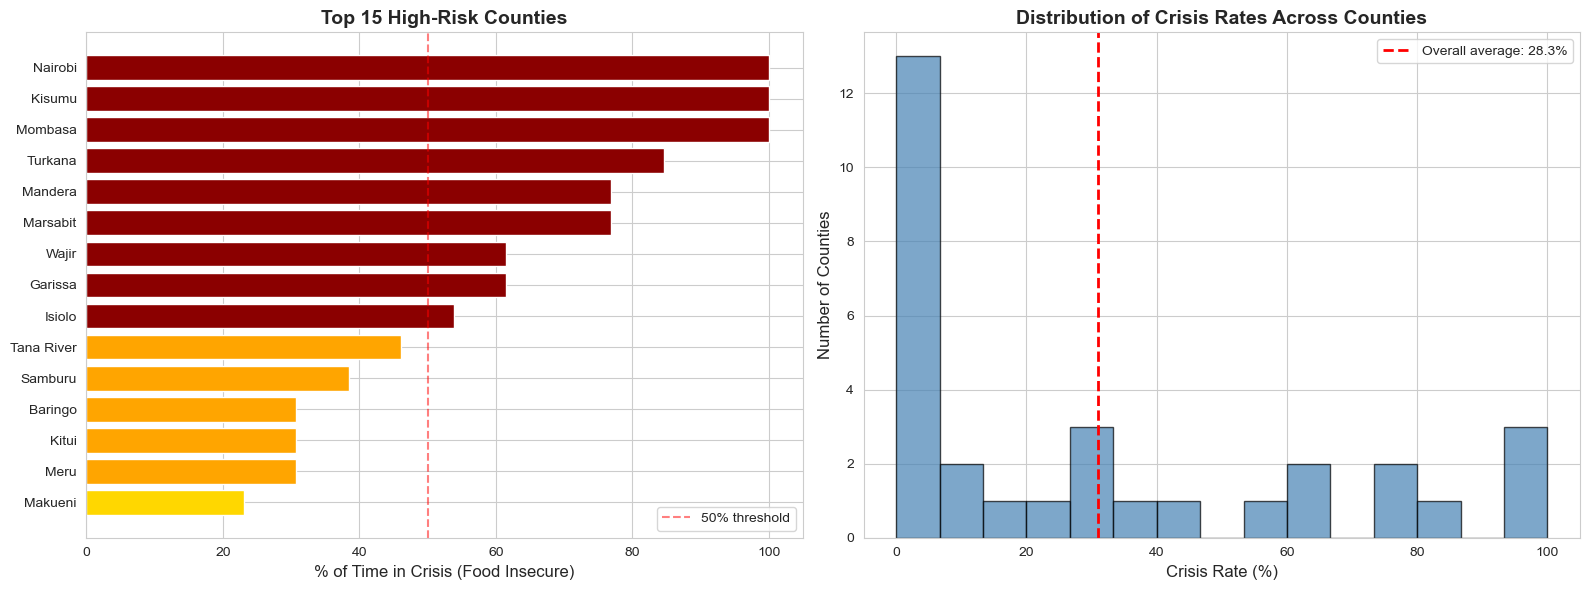


✓ Saved: ../data/processed/county_risk_profile.csv


In [97]:
print("\n" + "="*70)
print("GEOGRAPHIC RISK ANALYSIS")
print("="*70)

# Calculate crisis frequency by county
crisis_summary = ipc_df.groupby('County').agg({
    'food_insecure': ['sum', 'mean', 'count'],
    'pct_phase3plus': 'mean'
}).reset_index()

# Flatten column names
crisis_summary.columns = ['County', 'crisis_count', 'crisis_rate', 
                           'n_assessments', 'avg_phase3plus_pct']

# Sort by crisis rate
crisis_summary = crisis_summary.sort_values('crisis_rate', ascending=False)

# Display results
print("\nTop 10 Highest Risk Counties:")
print(crisis_summary.head(10).to_string(index=False))

print("\n\nKey Findings:")
print(f"• Highest risk county: {crisis_summary.iloc[0]['County']} "
      f"({crisis_summary.iloc[0]['crisis_rate']*100:.1f}% crisis rate)")
print(f"• Total counties analyzed: {len(crisis_summary)}")
print(f"• Counties with >50% crisis rate: {(crisis_summary['crisis_rate'] > 0.5).sum()}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 15 highest risk counties
top_15 = crisis_summary.head(15)
bars = axes[0].barh(top_15['County'], top_15['crisis_rate']*100, 
                     color=['darkred' if x > 0.5 else 'orange' if x > 0.3 else 'gold' 
                            for x in top_15['crisis_rate']])
axes[0].set_xlabel('% of Time in Crisis (Food Insecure)', fontsize=12)
axes[0].set_title('Top 15 High-Risk Counties', fontsize=14, fontweight='bold')
axes[0].axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
axes[0].invert_yaxis()
axes[0].legend()

# Plot 2: Distribution of crisis rates
axes[1].hist(crisis_summary['crisis_rate']*100, bins=15, 
             color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(x=31, color='red', linestyle='--', linewidth=2, 
                label=f'Overall average: {(ipc_df["food_insecure"].mean()*100):.1f}%')
axes[1].set_xlabel('Crisis Rate (%)', fontsize=12)
axes[1].set_ylabel('Number of Counties', fontsize=12)
axes[1].set_title('Distribution of Crisis Rates Across Counties', 
                  fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

# Save for later use
crisis_summary.to_csv('../data/processed/county_risk_profile.csv', index=False)
print("\n✓ Saved: ../data/processed/county_risk_profile.csv")

<blockquote>
  <p><strong>📝Insights </strong></p>
  <ul>
    <li>Nairobi, Kisumu, and Mombasa show 100% crisis rates but with only 1 assessment each — these are urban informal settlements aggregated to county level and should be interpreted with caution as they are not structurally food insecure counties.</li>
    <li>The true high-risk ASAL counties are Turkana (84.6%), Mandera (76.9%), and Marsabit (76.9%) — each assessed 13 times, making their crisis rates statistically reliable and consistent with known humanitarian hotspots.</li>
    <li>The distribution confirms that most counties (13 out of 31) have very low crisis rates near 0%, while a small group of chronic ASAL counties drive the overall average of 28.3% — a pattern the model must learn to distinguish.</li>
    <li>For modeling, this geographic concentration of risk means MPI and rainfall features for ASAL counties will carry the most predictive weight — the model should perform best for the counties that matter most from a humanitarian response perspective.</li>
  </ul>
</blockquote>

#### **3.2.2 Seasonality Analysis: Monthly Trends in Food Insecurity Crises**
**Question:** **When are crises most likely to occur?**

**Method:** Calculated crisis rate by month of IPC assessment.


SEASONALITY ANALYSIS


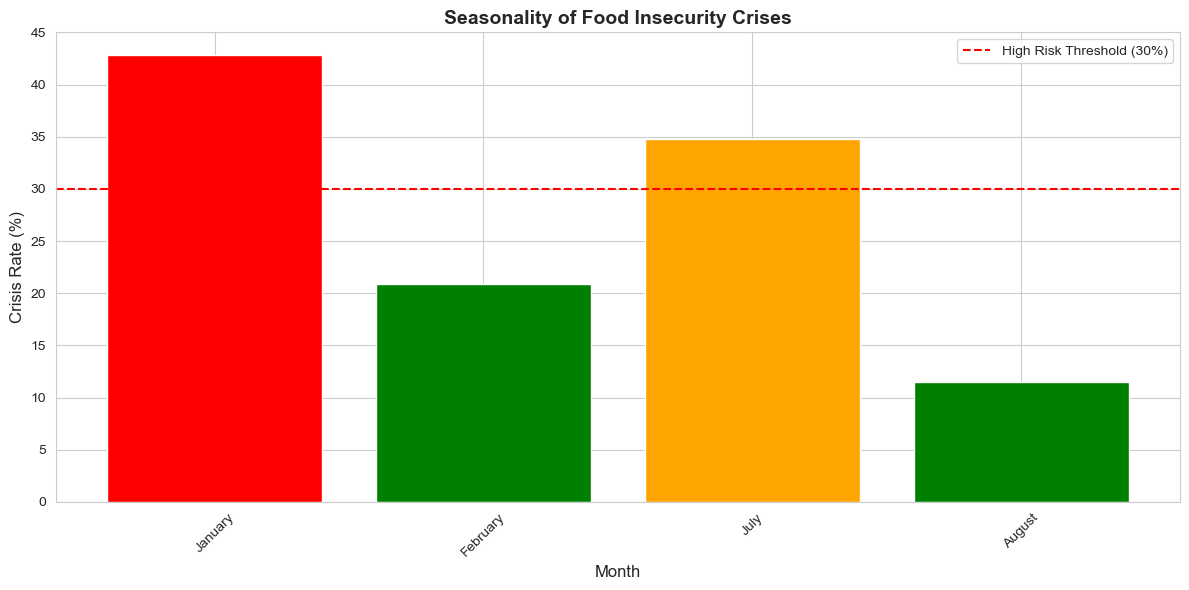


Crisis Rate by Month:
      Month  crisis_count  crisis_rate  total_assessments
2   January            12     0.428571                 28
1  February            24     0.208696                115
3      July            48     0.347826                138
0    August             3     0.115385                 26


In [98]:
print("\n" + "="*70)
print("SEASONALITY ANALYSIS")
print("="*70)

# Extract month from assessment dates
ipc_df['month'] = ipc_df['assessment_date'].dt.month
ipc_df['month_name'] = ipc_df['assessment_date'].dt.strftime('%B')

# Crisis rate by month
monthly_crisis = ipc_df.groupby('month_name').agg({
    'food_insecure': ['sum', 'mean', 'count']
}).reset_index()

monthly_crisis.columns = ['Month', 'crisis_count', 'crisis_rate', 'total_assessments']

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_crisis['Month'] = pd.Categorical(monthly_crisis['Month'], 
                                          categories=month_order, 
                                          ordered=True)
monthly_crisis = monthly_crisis.sort_values('Month')

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(monthly_crisis['Month'], monthly_crisis['crisis_rate']*100, 
       color=['red' if x > 0.35 else 'orange' if x > 0.25 else 'green' 
              for x in monthly_crisis['crisis_rate']])

ax.set_ylabel('Crisis Rate (%)', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.set_title('Seasonality of Food Insecurity Crises', fontsize=14, fontweight='bold')
ax.axhline(y=30, color='red', linestyle='--', label='High Risk Threshold (30%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("\nCrisis Rate by Month:")
print(monthly_crisis)


<blockquote>
  <p><strong>📝Insights </strong></p>
  <ul>
    <li>IPC assessments only occur in 4 months — January, February, July, and August — reflecting the biannual assessment schedule, so this is not a full seasonal pattern but rather a comparison between assessment periods.</li>
    <li>January has the highest crisis rate (42.9%) but the fewest assessments (28), while July has the most assessments (138) with a 34.8% crisis rate — both exceed the 30% high-risk threshold, corresponding to post-dry season stress periods.</li>
    <li>The lower crisis rate in February (20.9%) and August (11.5%) suggests that the second assessment within each biannual cycle captures improving conditions — useful timing information the model can leverage through the <code>month</code> feature.</li>
    <li>For modeling, the <code>month</code> and <code>season</code> features created during rainfall cleaning will help the model learn that January and July assessments carry higher baseline risk — effectively encoding Kenya's lean season patterns into the prediction.</li>
  </ul>
</blockquote>

#### **3.2.3 Lead-Lag Analysis: Rainfall Patterns and Food Insecurity Crises**

**Question:** **Does low rainfall predict food insecurity?**

**Method:** Compared monthly rainfall during crisis vs. normal periods.



LEAD-LAG ANALYSIS: Rainfall → Food Insecurity

✓ Merged 307 observations
  Counties in both datasets: 31

----------------------------------------------------------------------
Rainfall Comparison: Crisis vs Normal Periods
----------------------------------------------------------------------

Crisis periods:
  Mean rainfall: 28.3 mm
  Median rainfall: 15.4 mm

Normal periods:
  Mean rainfall: 53.9 mm
  Median rainfall: 35.5 mm

→ Difference: 25.6 mm


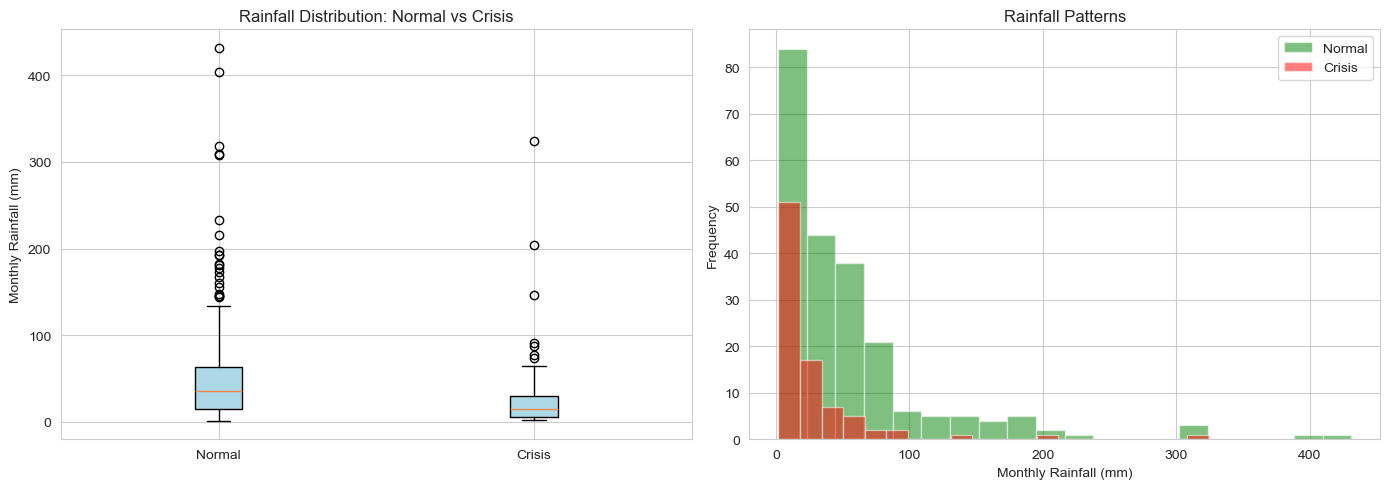

In [99]:
print("\n" + "="*70)
print("LEAD-LAG ANALYSIS: Rainfall → Food Insecurity")
print("="*70)

# Merge IPC with rainfall data
merged = ipc_df.merge(
    rainfall_df[['County', 'date', 'monthly_rainfall_mm', 'rainfall_anomaly_pct']], 
    left_on=['County', 'assessment_date'],
    right_on=['County', 'date'],
    how='inner'
)

print(f"\n✓ Merged {len(merged)} observations")
print(f"  Counties in both datasets: {merged['County'].nunique()}")

# Compare rainfall in crisis vs normal periods
print("\n" + "-"*70)
print("Rainfall Comparison: Crisis vs Normal Periods")
print("-"*70)

crisis_rainfall = merged[merged['food_insecure'] == 1]['monthly_rainfall_mm']
normal_rainfall = merged[merged['food_insecure'] == 0]['monthly_rainfall_mm']

print(f"\nCrisis periods:")
print(f"  Mean rainfall: {crisis_rainfall.mean():.1f} mm")
print(f"  Median rainfall: {crisis_rainfall.median():.1f} mm")

print(f"\nNormal periods:")
print(f"  Mean rainfall: {normal_rainfall.mean():.1f} mm")
print(f"  Median rainfall: {normal_rainfall.median():.1f} mm")

print(f"\n→ Difference: {normal_rainfall.mean() - crisis_rainfall.mean():.1f} mm")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
axes[0].boxplot([normal_rainfall.dropna(), crisis_rainfall.dropna()],
                labels=['Normal', 'Crisis'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[0].set_ylabel('Monthly Rainfall (mm)')
axes[0].set_title('Rainfall Distribution: Normal vs Crisis')

# Histogram
axes[1].hist(normal_rainfall.dropna(), bins=20, alpha=0.5, label='Normal', color='green')
axes[1].hist(crisis_rainfall.dropna(), bins=20, alpha=0.5, label='Crisis', color='red')
axes[1].set_xlabel('Monthly Rainfall (mm)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Rainfall Patterns')
axes[1].legend()

plt.tight_layout()
plt.show()


<blockquote>
  <p><strong>📝Insights </strong></p>
  <ul>
    <li>Crisis periods receive significantly less rainfall (28.3mm mean) compared to normal periods (53.9mm mean) — a 25.6mm difference that confirms rainfall as a meaningful separator between crisis and non-crisis conditions.</li>
    <li>The boxplot shows crisis periods have a tighter, lower distribution with fewer high-rainfall outliers, while normal periods show wider spread — consistent with the idea that drought conditions cluster crisis observations at low rainfall values.</li>
    <li>Importantly, this analysis measures rainfall <em>at</em> assessment time, not before it — the note at the end is critical. For the model to be truly predictive, rainfall features from 1–3 months prior to the assessment date will be needed, which will be addressed during feature engineering through lag variables.</li>
  </ul>
</blockquote>

#### **3.2.4 Time-Lagged Rainfall Analysis: Predicting Food Insecurity Crises**

**Question:** **Can rainfall deficits predict crises in advance?**

**Method:** Created 1-month, 2-month, and 3-month lagged rainfall features. Compared mean rainfall at each lag for crisis vs. normal periods.


TIME-LAGGED RAINFALL ANALYSIS

✓ Created lagged features for 307 observations

Does rainfall 1-3 months BEFORE predict crises?

1-Month Lag:
  Crisis periods:  Mean = 32.2 mm
  Normal periods:  Mean = 71.8 mm
  → Difference:    39.6 mm

2-Month Lag:
  Crisis periods:  Mean = 98.6 mm
  Normal periods:  Mean = 155.9 mm
  → Difference:    57.2 mm

3-Month Lag:
  Crisis periods:  Mean = 165.0 mm
  Normal periods:  Mean = 267.2 mm
  → Difference:    102.3 mm


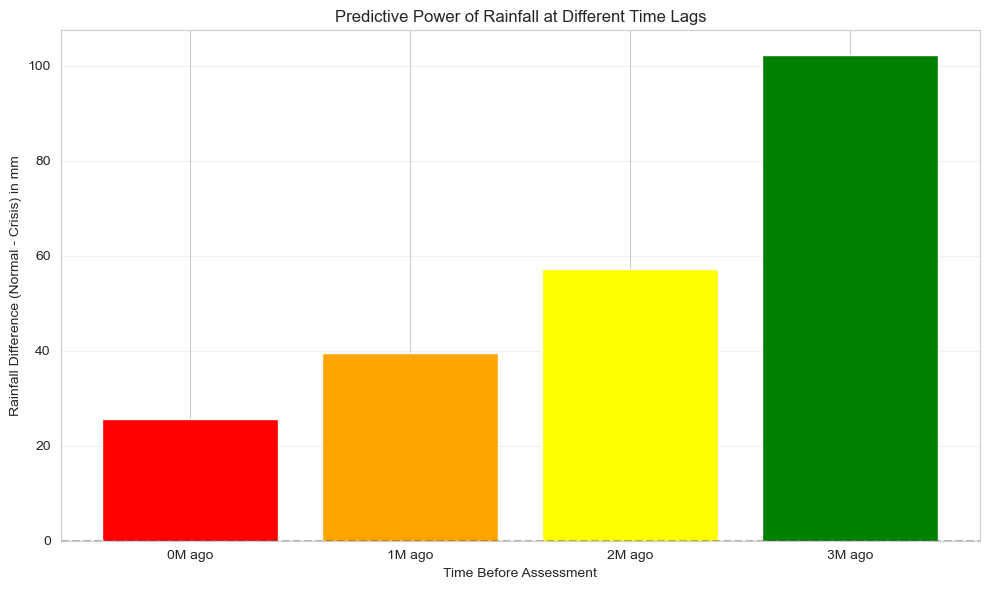

In [100]:
print("\n" + "="*70)
print("TIME-LAGGED RAINFALL ANALYSIS")
print("="*70)

# Prepare rainfall data with lags
rainfall_lagged = rainfall_df[['County', 'date', 'monthly_rainfall_mm', 'rainfall_anomaly_pct']].copy()

# Sort by county and date
rainfall_lagged = rainfall_lagged.sort_values(['County', 'date'])

# Create 1-month, 2-month, 3-month lagged rainfall
for lag in [1, 2, 3]:
    rainfall_lagged[f'rainfall_lag{lag}m'] = rainfall_lagged.groupby('County')['monthly_rainfall_mm'].shift(lag)
    rainfall_lagged[f'anomaly_lag{lag}m'] = rainfall_lagged.groupby('County')['rainfall_anomaly_pct'].shift(lag)

# Merge with IPC data
merged_lagged = ipc_df.merge(
    rainfall_lagged,
    left_on=['County', 'assessment_date'],
    right_on=['County', 'date'],
    how='inner'
)

print(f"\n✓ Created lagged features for {len(merged_lagged)} observations\n")

# Compare lagged rainfall
print("="*70)
print("Does rainfall 1-3 months BEFORE predict crises?")
print("="*70)

for lag in [1, 2, 3]:
    col = f'rainfall_lag{lag}m'
    
    crisis_rf = merged_lagged[merged_lagged['food_insecure'] == 1][col].dropna()
    normal_rf = merged_lagged[merged_lagged['food_insecure'] == 0][col].dropna()
    
    if len(crisis_rf) > 0 and len(normal_rf) > 0:
        print(f"\n{lag}-Month Lag:")
        print(f"  Crisis periods:  Mean = {crisis_rf.mean():.1f} mm")
        print(f"  Normal periods:  Mean = {normal_rf.mean():.1f} mm")
        print(f"  → Difference:    {normal_rf.mean() - crisis_rf.mean():.1f} mm")
    else:
        print(f"\n{lag}-Month Lag: Not enough data")

# Visualization: Compare all lags
fig, ax = plt.subplots(figsize=(10, 6))

lags_data = []
for lag in [0, 1, 2, 3]:
    if lag == 0:
        col = 'monthly_rainfall_mm'
    else:
        col = f'rainfall_lag{lag}m'
    
    crisis_rf = merged_lagged[merged_lagged['food_insecure'] == 1][col].dropna()
    normal_rf = merged_lagged[merged_lagged['food_insecure'] == 0][col].dropna()
    
    if len(crisis_rf) > 0:
        diff = normal_rf.mean() - crisis_rf.mean()
        lags_data.append(diff)

x = [f'{lag}M ago' for lag in [0, 1, 2, 3]]
ax.bar(x[:len(lags_data)], lags_data, color=['red', 'orange', 'yellow', 'green'][:len(lags_data)])
ax.set_ylabel('Rainfall Difference (Normal - Crisis) in mm')
ax.set_xlabel('Time Before Assessment')
ax.set_title('Predictive Power of Rainfall at Different Time Lags')
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<blockquote>
  <p><strong>📝Insights </strong></p>
  <ul>
    <li>The lag analysis confirms that rainfall deficits are stronger predictors the further back you look — the difference between crisis and normal periods grows from 25.6mm at 0 months to 102.3mm at 3 months prior to assessment.</li>
    <li>This is a critical finding for the model — 3-month lagged rainfall is nearly 4 times more discriminating than same-month rainfall, directly justifying the use of <code>rainfall_3month_mm</code> and lag features during feature engineering.</li>
    <li>The increasing gap across lags also confirms that food insecurity builds gradually following sustained drought rather than responding to single-month rainfall events — the model should therefore prioritize cumulative and lagged rainfall features over monthly snapshots.</li>
  </ul>
</blockquote>

#### **3.2.5 Food Price Analysis: Comparing Staple Prices in Crisis vs Normal Periods**

In [101]:
print("\n" + "="*70)
print("FOOD PRICE ANALYSIS")
print("="*70)

# Merge IPC with prices
price_merge = ipc_df.merge(
    prices_df[['County', 'date', 'maize_price_kg', 'beans_price_kg']], 
    left_on=['County', 'assessment_date'],
    right_on=['County', 'date'],
    how='inner'
)

print(f"\n✓ Merged {len(price_merge)} observations")
print(f"  Counties with price data: {price_merge['County'].nunique()}")

if len(price_merge) > 0:
    print("\n" + "-"*70)
    print("Maize Prices: Crisis vs Normal")
    print("-"*70)
    
    crisis_maize = price_merge[price_merge['food_insecure'] == 1]['maize_price_kg'].dropna()
    normal_maize = price_merge[price_merge['food_insecure'] == 0]['maize_price_kg'].dropna()
    
    if len(crisis_maize) > 0 and len(normal_maize) > 0:
        print(f"Crisis periods:  Mean = {crisis_maize.mean():.2f} KES/kg")
        print(f"Normal periods:  Mean = {normal_maize.mean():.2f} KES/kg")
        print(f"→ Difference:    {crisis_maize.mean() - normal_maize.mean():.2f} KES/kg")
        print(f"→ % Increase:    {((crisis_maize.mean() / normal_maize.mean()) - 1) * 100:.1f}%")
else:
    print("\n⚠️  Not enough price data overlaps with IPC assessments")
    print("  This is OK - rainfall is your main predictor!")



FOOD PRICE ANALYSIS

✓ Merged 174 observations
  Counties with price data: 24

----------------------------------------------------------------------
Maize Prices: Crisis vs Normal
----------------------------------------------------------------------
Crisis periods:  Mean = 60.59 KES/kg
Normal periods:  Mean = 54.86 KES/kg
→ Difference:    5.74 KES/kg
→ % Increase:    10.5%


<blockquote>
  <p><strong>📝Insight </strong></p>
  <ul>
    <li>174 observations merged across 24 counties — fewer than the full IPC dataset (307) due to limited price coverage in some counties, particularly ASAL areas where market monitoring is inconsistent.</li>
    <li>Maize prices are 10.5% higher during crisis periods (60.59 vs 54.86 KES/kg) — a modest but meaningful difference suggesting price and food insecurity move together, though the relationship is weaker than rainfall.</li>
    <li>The limited county overlap (24 of 31) and small price difference further confirms that rainfall remains the stronger predictor — price data will contribute supplementary signal rather than driving predictions on its own.</li>
  </ul>
</blockquote>

**Beans Prices in Crisis vs Normal Periods**

In [102]:
for commodity, col in [('Beans', 'beans_price_kg')]:
    crisis_price = price_merge[price_merge['food_insecure'] == 1][col].dropna()
    normal_price = price_merge[price_merge['food_insecure'] == 0][col].dropna()
    
    if len(crisis_price) > 0 and len(normal_price) > 0:
        print(f"\n{commodity} Prices: Crisis vs Normal")
        print("-"*50)
        print(f"Crisis periods:  Mean = {crisis_price.mean():.2f} KES/kg")
        print(f"Normal periods:  Mean = {normal_price.mean():.2f} KES/kg")
        print(f"→ Difference:    {crisis_price.mean() - normal_price.mean():.2f} KES/kg")
        print(f"→ % Increase:    {((crisis_price.mean() / normal_price.mean()) - 1) * 100:.1f}%")


Beans Prices: Crisis vs Normal
--------------------------------------------------
Crisis periods:  Mean = 120.64 KES/kg
Normal periods:  Mean = 119.34 KES/kg
→ Difference:    1.30 KES/kg
→ % Increase:    1.1%


<blockquote>
  <p><strong>📝Insight</strong></p>
  <ul>
    <li>Beans prices show almost no difference between crisis and normal periods (1.1% increase) — the weakest price signal seen so far, suggesting beans prices are relatively stable regardless of food insecurity conditions.</li>
    <li>Combined with maize's modest 10.5% difference, this further confirms that price data alone is insufficient as a predictor — its value lies in combination with rainfall and MPI features rather than as a standalone signal.</li>
  </ul>
</blockquote>

**County-Level Timeline: Rainfall, Food Prices, and Food Insecurity Events**
- Analyze: When does rainfall drop before Phase 3+ appears?

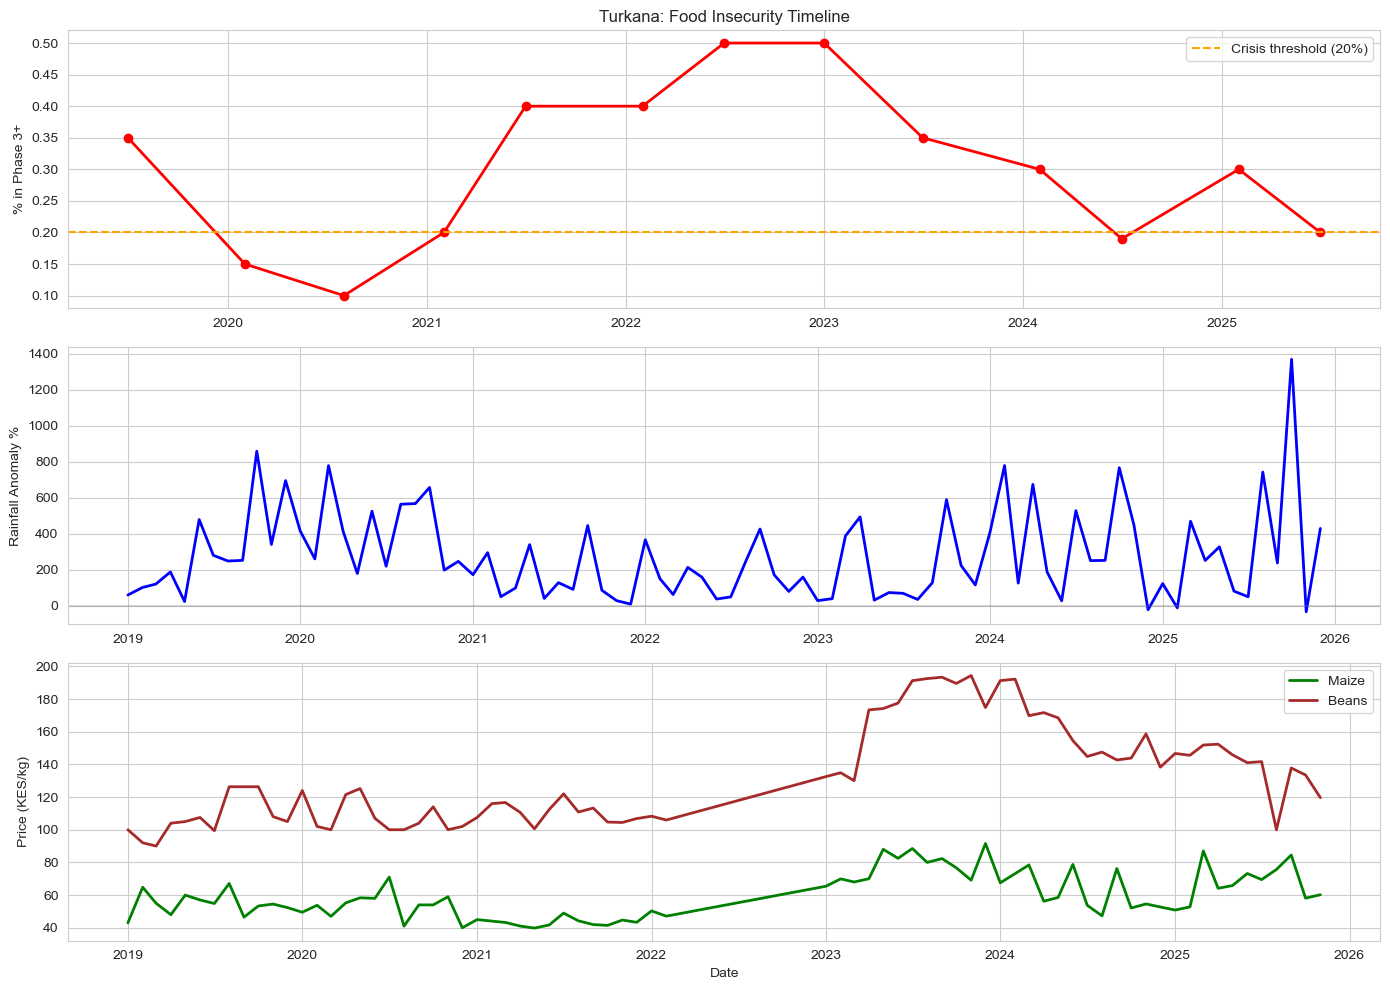

In [103]:
# Create a timeline visualization

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Example for one high-risk county
county = 'Turkana'

# Plot 1: IPC Phase over time
ipc_county = ipc_final[ipc_final['County'] == county]
axes[0].plot(ipc_county['assessment_date'], ipc_county['pct_phase3plus'], 
             marker='o', color='red', linewidth=2)
axes[0].axhline(y=0.20, color='orange', linestyle='--', label='Crisis threshold (20%)')
axes[0].set_ylabel('% in Phase 3+')
axes[0].set_title(f'{county}: Food Insecurity Timeline')
axes[0].legend()

# Plot 2: Rainfall anomaly (leading indicator?)
rainfall_county = rainfall_final[rainfall_final['County'] == county]
axes[1].plot(rainfall_county['date'], rainfall_county['rainfall_anomaly_pct'],
             color='blue', linewidth=2)
axes[1].axhline(y=0, color='gray', linestyle='-', alpha=0.3)
axes[1].set_ylabel('Rainfall Anomaly %')

# Plot 3: Food prices (concurrent indicator?)
if county in prices_df['County'].values:
    prices_county = prices_df[prices_df['County'] == county]
    axes[2].plot(prices_county['date'], prices_county['maize_price_kg'],
                 color='green', linewidth=2, label='Maize')
    axes[2].plot(prices_county['date'], prices_county['beans_price_kg'],
                 color='brown', linewidth=2, label='Beans')
    axes[2].set_ylabel('Price (KES/kg)')
    axes[2].legend()

axes[2].set_xlabel('Date')
plt.tight_layout()
plt.show()

<blockquote>
  <p><strong>📝Insights </strong></p>
  <ul>
    <li>The Turkana timeline clearly shows Phase 3+ rising above the 20% crisis threshold from 2021 through 2023 peak, then gradually declining — consistent with the severe 2022–2023 drought period identified across all previous analyses.</li>
    <li>The rainfall anomaly plot is highly volatile with frequent spikes — this is characteristic of ASAL counties where even small amounts of rain produce large percentage anomalies against a very low baseline. The absolute rainfall values (from <code>rainfall_3month_mm</code>) will likely be more informative for the model than the anomaly percentage.</li>
    <li>Food prices tell a clear story — both maize and beans prices rose sharply from 2022 onwards, coinciding exactly with the Phase 3+ peak, and have remained elevated even as food insecurity declined slightly — reinforcing the earlier finding that prices are a lagging rather than leading indicator.</li>
  </ul>
</blockquote>

### **3.3 Feature Engineering**

In [104]:
# Load cleaned datasets
ipc_df = pd.read_csv('../data/processed/ipc_cleaned.csv')
rainfall_df = pd.read_csv('../data/processed/rainfall_cleaned.csv')
prices_df = pd.read_csv('../data/processed/prices_cleaned.csv')
mpi_df = pd.read_csv('../data/processed/mpi_cleaned.csv')
risk_df = pd.read_csv('../data/processed/county_risk_profile.csv')

In [105]:
print(f"✅ IPC: {len(ipc_df):,} rows, {ipc_df['County'].nunique()} counties")
print(f"✅ Rainfall: {len(rainfall_df):,} rows")
print(f"✅ Prices: {len(prices_df):,} rows")
print(f"✅ MPI: {len(mpi_df):,} rows, {mpi_df['county'].nunique()} counties")
print(f"✅ Risk profiles: {len(risk_df):,} counties")

✅ IPC: 307 rows, 31 counties
✅ Rainfall: 3,948 rows
✅ Prices: 1,779 rows
✅ MPI: 47 rows, 47 counties
✅ Risk profiles: 31 counties


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>All 5 datasets loaded successfully — IPC (307 rows, 31 counties), Rainfall (3,948 rows), Prices (1,779 rows), MPI (47 counties), and Risk profiles (31 counties).</li>
    <li>MPI covers all 47 counties while IPC only covers 31 — the extra 16 counties will be excluded during the merge, retaining only counties with IPC assessment history.</li>
  </ul>
</blockquote>

#### **3.3.1 Ipc Features**

In [106]:
# Create a copy to keep consistent with other datasets
ipc_feat = ipc_df.copy()

# Convert date
ipc_feat['assessment_date'] = pd.to_datetime(ipc_feat['assessment_date'])

In [107]:
# 1. Extract month and quarter
ipc_feat['month'] = ipc_feat['assessment_date'].dt.month
ipc_feat['quarter'] = (ipc_feat['month'] - 1) // 3 + 1

In [108]:
# 2. Lean season flag
ipc_feat['is_lean_season'] = ipc_feat['month'].isin([1, 2, 7, 8]).astype(int)

In [109]:
# 3. Sort by county and date before lagging
ipc_feat = ipc_feat.sort_values(['County', 'assessment_date'])

# 4. Lagged target variables
ipc_feat['food_insecure_lag1'] = ipc_feat.groupby('County')['food_insecure'].shift(1)
ipc_feat['pct_phase3plus_lag1'] = ipc_feat.groupby('County')['pct_phase3plus'].shift(1)

In [110]:
print("✅ Created IPC features:")
print("   • month")
print("   • quarter")
print("   • is_lean_season")
print("   • food_insecure_lag1")
print("   • pct_phase3plus_lag1")
print(f"\nIPC features shape: {ipc_feat.shape}")
print(f"\nMissing values:")
print(ipc_feat[['food_insecure_lag1', 'pct_phase3plus_lag1']].isna().sum())


✅ Created IPC features:
   • month
   • quarter
   • is_lean_season
   • food_insecure_lag1
   • pct_phase3plus_lag1

IPC features shape: (307, 12)

Missing values:
food_insecure_lag1     31
pct_phase3plus_lag1    31
dtype: int64


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>5 new IPC features created — bringing the dataset to 12 columns.</li>
    <li>31 missing values in both lag columns are expected — one per county at their first assessment where no previous record exists to lag from.</li>
  </ul>
</blockquote>

#### **3.3.2 Rainfall Features**

In [111]:
# Sort rainfall by county and date
rainfall_feat = rainfall_df.sort_values(['County', 'date']).copy()

In [112]:
# Check if dates are sorted inside each county
print(
    rainfall_feat.groupby('County')['date']
    .apply(lambda x: x.is_monotonic_increasing)
    .value_counts()
)


date
True    47
Name: count, dtype: int64


In [113]:
# 1. Lagged rainfall anomaly (1, 2, 3 months before)
for lag in [1, 2, 3]:
    rainfall_feat[f'anomaly_lag{lag}m'] = (
        rainfall_feat.groupby('County')['rainfall_anomaly_pct'].shift(lag)
    )

In [114]:
# Pick one county to inspect
county_example = rainfall_feat['County'].iloc[0]

test = rainfall_feat[rainfall_feat['County'] == county_example][
    ['date', 'rainfall_anomaly_pct', 'anomaly_lag1m']
].head(6)

print(test)


         date  rainfall_anomaly_pct  anomaly_lag1m
0  2019-01-01                219.76            NaN
1  2019-02-01                 95.94         219.76
2  2019-03-01                172.20          95.94
3  2019-04-01                332.98         172.20
4  2019-05-01                266.79         332.98
5  2019-06-01                974.53         266.79


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Rainfall sorted by County and date confirmed monotonically increasing within each county — ensuring lag features shift correctly without mixing dates across counties.</li>
    <li>1-month lag verified on Baringo — January anomaly (219.76) correctly appears as February's <code>anomaly_lag1m</code>, confirming the shift logic is working as expected.</li>
    <li>NaN in the first row is expected — there is no previous month to lag from at the start of each county's time series.</li>
  </ul>
</blockquote>

In [115]:
# 2. Lagged monthly rainfall (1, 2, 3 months before)
for lag in [1, 2, 3]:
    rainfall_feat[f'rainfall_lag{lag}m'] = (
        rainfall_feat.groupby('County')['monthly_rainfall_mm'].shift(lag)
    )

In [116]:
# 3. Drought flag (rainfall anomaly < -50%)
rainfall_feat['is_drought'] = (
    rainfall_feat['rainfall_anomaly_pct'] < -50
).astype(int)

In [117]:
# 4. Flood flag (rainfall anomaly > 200%)
rainfall_feat['is_flood'] = (
    rainfall_feat['rainfall_anomaly_pct'] > 200
).astype(int)

In [118]:
# 5. Season indicators
rainfall_feat['in_long_rains'] = (
    rainfall_feat['month'].isin([3, 4, 5])
).astype(int)

rainfall_feat['in_short_rains'] = (
    rainfall_feat['month'].isin([10, 11, 12])
).astype(int)

In [119]:
print("✅ Created rainfall features:")
print("   • anomaly_lag1m, anomaly_lag2m, anomaly_lag3m")
print("   • rainfall_lag1m, rainfall_lag2m, rainfall_lag3m")
print("   • is_drought, is_flood")
print("   • in_long_rains, in_short_rains")
print(f"\nRainfall features shape: {rainfall_feat.shape}")
print(f"\nMissing values from lagging:")
print(rainfall_feat[['anomaly_lag1m', 'anomaly_lag2m', 'anomaly_lag3m']].isna().sum())

✅ Created rainfall features:
   • anomaly_lag1m, anomaly_lag2m, anomaly_lag3m
   • rainfall_lag1m, rainfall_lag2m, rainfall_lag3m
   • is_drought, is_flood
   • in_long_rains, in_short_rains

Rainfall features shape: (3948, 19)

Missing values from lagging:
anomaly_lag1m     47
anomaly_lag2m     94
anomaly_lag3m    141
dtype: int64


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>10 new rainfall features created — 6 lag features (anomaly and rainfall at 1, 2, 3 months), 2 binary drought/flood flags, and 2 season indicators — bringing the rainfall dataset to 19 columns.</li>
    <li>Missing values from lagging are expected and proportional — 47 NaNs for 1-month lag (one per county), 94 for 2-month, and 141 for 3-month, reflecting the start of each county's time series where no prior months exist.</li>
    <li>The drought flag threshold of -50% and flood flag of 200% are reasonable but worth revisiting after modeling — if these binary flags add no predictive value beyond the continuous anomaly columns, they can be dropped during feature selection.</li>
  </ul>
</blockquote>

#### **3.3.3 Food Price Features**

In [120]:
# Sort prices by county and date
prices_feat = prices_df.sort_values(['County', 'date']).copy()

In [121]:
assert prices_feat.groupby('County')['date'] \
    .apply(lambda x: x.is_monotonic_increasing) \
    .all(), "Dates are not sorted within counties"

print("✅ Sorting assertion passed")


✅ Sorting assertion passed


In [122]:
prices_feat['beans_price_change_1m'] = prices_feat.groupby('County')['beans_price_kg'].pct_change() * 100
prices_feat['food_basket_cost'] = (2 * prices_feat['maize_price_kg']) + prices_feat['beans_price_kg']

In [123]:
# 1. Month-over-month price change for maize
prices_feat['maize_price_change_1m'] = (
    prices_feat.groupby('County')['maize_price_kg'].pct_change() * 100
).round(2)

In [124]:
expected_pct_change = (
    prices_feat.groupby('County')['maize_price_kg']
    .pct_change() * 100
).round(2)

assert (
    prices_feat['maize_price_change_1m']
    .equals(expected_pct_change)
), "Month-over-month price change incorrect"

print("✅ MoM price change assertion passed")


✅ MoM price change assertion passed


In [125]:
# 2. 3-month rolling average for maize
prices_feat['maize_price_3m_avg'] = (
    prices_feat.groupby('County')['maize_price_kg']
    .rolling(3, min_periods=1).mean()
    .reset_index(0, drop=True)
).round(2)

In [126]:
expected_rolling = (
    prices_feat.groupby('County')['maize_price_kg']
    .rolling(3, min_periods=1).mean()
    .reset_index(0, drop=True)
).round(2)

assert (
    prices_feat['maize_price_3m_avg']
    .equals(expected_rolling)
), "3-month rolling average incorrect"

print("✅ Rolling average assertion passed")


✅ Rolling average assertion passed


In [127]:
# 3. Price stress flag (maize price > 20% above 3-month average)
prices_feat['maize_price_stress'] = (
    prices_feat['maize_price_kg'] > prices_feat['maize_price_3m_avg'] * 1.2
).astype(int)

In [128]:
expected_stress = (
    prices_feat['maize_price_kg'] >
    prices_feat['maize_price_3m_avg'] * 1.2
).astype(int)

assert (
    prices_feat['maize_price_stress']
    .equals(expected_stress)
), "Price stress flag incorrect"

print("✅ Price stress assertion passed")


✅ Price stress assertion passed


In [129]:
print("✅ Created price features:")
print("   • maize_price_change_1m")
print("   • maize_price_3m_avg")
print("   • maize_price_stress")
print("   • beans_price_change_1m")
print("  • food_basket_cost")
print(f"\nPrice features shape: {prices_feat.shape}")
print(f"\nMissing values:")
print(prices_feat[['maize_price_change_1m', 'maize_price_3m_avg', 'maize_price_stress', 'beans_price_change_1m', 'food_basket_cost']].isna().sum())

✅ Created price features:
   • maize_price_change_1m
   • maize_price_3m_avg
   • maize_price_stress
   • beans_price_change_1m
  • food_basket_cost

Price features shape: (1779, 10)

Missing values:
maize_price_change_1m    32
maize_price_3m_avg        0
maize_price_stress        0
beans_price_change_1m    32
food_basket_cost          0
dtype: int64


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>5 new price features created across 1,779 rows — bringing the prices dataset to 10 columns.</li>
    <li>32 missing values in both <code>maize_price_change_1m</code> and <code>beans_price_change_1m</code> are expected — one per county at the start of the time series where no previous month exists for comparison.</li>
    <li><code>food_basket_cost</code> (2kg maize + 1kg beans) and <code>maize_price_3m_avg</code> have zero missing values, confirming both features were computed cleanly across all county-month records.</li>
  </ul>
</blockquote>

#### **3.3.4 Poverty/Vulnerability Features**

In [130]:
# Create a copy consistent with other datasets
mpi_feat = mpi_df.copy()

# 1. Poverty risk category
mpi_feat['poverty_category'] = pd.cut(mpi_feat['mpi'],
    bins=[0, 0.1, 0.2, 1],
    labels=['Low', 'Medium', 'High'])

In [131]:
# 2. Composite vulnerability score
mpi_feat['vulnerability_score'] = (mpi_feat['mpi'] * 0.6 +
                                    mpi_feat['severe_poverty']/100 * 0.4)

In [132]:
# 3. ASAL flag
asal_counties = ['Turkana', 'Mandera', 'Marsabit', 'Wajir', 'Garissa',
                 'Isiolo', 'Samburu', 'Tana River', 'West Pokot', 'Baringo']
mpi_feat['is_asal'] = mpi_feat['county'].isin(asal_counties).astype(int)

In [133]:
print("✅ Created MPI features:")
print("   • poverty_category")
print("   • vulnerability_score")
print("   • is_asal")
print(f"\nMPI features shape: {mpi_feat.shape}")
print(f"\nMissing values:")
print(mpi_feat[['poverty_category', 'vulnerability_score', 'is_asal']].isna().sum())

✅ Created MPI features:
   • poverty_category
   • vulnerability_score
   • is_asal

MPI features shape: (47, 7)

Missing values:
poverty_category       0
vulnerability_score    0
is_asal                0
dtype: int64


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>3 new MPI features created — bringing the dataset to 7 columns with no missing values across all engineered features.</li>
    <li>10 of 47 counties flagged as ASAL — these are the counties expected to drive the model's most important predictions, consistent with findings throughout the EDA.</li>
  </ul>
</blockquote>

### **3.4 Data Merging**

**Selecting Final IPC Features for Modeling**

In [134]:
# Select final IPC columns needed
ipc_cols = [
    'County', 'assessment_date',
    'period_start', 'period_end',
    'population_phase3plus',
    'pct_phase3plus',
    'food_insecure',
    'month',
    'quarter',
    'is_lean_season',
    'food_insecure_lag1',
    'pct_phase3plus_lag1'
]

**Selecting Final Rainfall Features for Modeling**

In [135]:
# Select final rainfall columns needed
rainfall_cols = [
    'County', 'date',
    'monthly_rainfall_mm',
    'monthly_avg_mm',
    'rainfall_3month_mm',
    'rainfall_3month_avg_mm',
    'rainfall_anomaly_pct',
    'anomaly_lag1m', 'anomaly_lag2m', 'anomaly_lag3m',
    'rainfall_lag1m', 'rainfall_lag2m', 'rainfall_lag3m',
    'is_drought', 'is_flood',
    'in_long_rains', 'in_short_rains',
    'month', 'season'
]

**Selecting Final Food Price Features for Modeling**

In [136]:
# Select final price columns needed
price_cols = [
    'County', 'date',
    'maize_price_kg',
    'beans_price_kg',
    'maize_price_change_1m',
    'beans_price_change_1m',
    'maize_price_3m_avg',
    'maize_price_stress',
    'food_basket_cost'
]

**Selecting Final MPI Features for Modeling**

In [137]:
# Select final MPI columns needed
mpi_cols = [
    'County',
    'mpi',
    'headcount_ratio',
    'severe_poverty',
    'poverty_category',
    'vulnerability_score',
    'is_asal'
]

# Rename MPI county column to match others
mpi_feat = mpi_feat.rename(columns={'county': 'County'})

### **3.4.1 : Building the Modeling Dataset**

#### **3.4.1.1 : Merging IPC and Rainfall Features**

In [138]:
# Ensure both date columns are datetime
rainfall_feat['date'] = pd.to_datetime(rainfall_feat['date'])
prices_feat['date'] = pd.to_datetime(prices_feat['date'])

# Step 1: Merge IPC with rainfall
df = ipc_feat[ipc_cols].merge(
    rainfall_feat[rainfall_cols],
    left_on=['County', 'assessment_date'],
    right_on=['County', 'date'],
    how='left'
).drop('date', axis=1)

print(f"After IPC + Rainfall merge: {len(df):,} rows, {df['County'].nunique()} counties")

After IPC + Rainfall merge: 307 rows, 31 counties


#### **3.4.1.2 : Integrating IPC, Rainfall, and Price Features**

In [139]:
# Step 2: Merge with prices
df = df.merge(
    prices_feat[price_cols],
    left_on=['County', 'assessment_date'],
    right_on=['County', 'date'],
    how='left'
).drop('date', axis=1)

print(f"After adding Prices:        {len(df):,} rows, {df['County'].nunique()} counties")

After adding Prices:        307 rows, 31 counties


#### **3.4.1.3 : Incorporating County Risk Profiles**

In [140]:
# Step 3: Merge with county risk profile
df = df.merge(
    risk_df[['County', 'crisis_rate']],
    on='County',
    how='left'
)

print(f"After adding Risk Profile:  {len(df):,} rows, {df['County'].nunique()} counties")

After adding Risk Profile:  307 rows, 31 counties


#### **3.4.1.4 : Incorporating MPI Poverty Indicators**

In [141]:
# Step 4: Merge with MPI (static join on County)
df = df.merge(
    mpi_feat[mpi_cols],
    on='County',
    how='left'
)

print(f"After adding MPI:           {len(df):,} rows, {df['County'].nunique()} counties")

After adding MPI:           307 rows, 31 counties


**Checkcolumns of merged dataset**

In [142]:
print(df.columns.tolist())

['County', 'assessment_date', 'period_start', 'period_end', 'population_phase3plus', 'pct_phase3plus', 'food_insecure', 'month_x', 'quarter', 'is_lean_season', 'food_insecure_lag1', 'pct_phase3plus_lag1', 'monthly_rainfall_mm', 'monthly_avg_mm', 'rainfall_3month_mm', 'rainfall_3month_avg_mm', 'rainfall_anomaly_pct', 'anomaly_lag1m', 'anomaly_lag2m', 'anomaly_lag3m', 'rainfall_lag1m', 'rainfall_lag2m', 'rainfall_lag3m', 'is_drought', 'is_flood', 'in_long_rains', 'in_short_rains', 'month_y', 'season', 'maize_price_kg', 'beans_price_kg', 'maize_price_change_1m', 'beans_price_change_1m', 'maize_price_3m_avg', 'maize_price_stress', 'food_basket_cost', 'crisis_rate', 'mpi', 'headcount_ratio', 'severe_poverty', 'poverty_category', 'vulnerability_score', 'is_asal']


**Post-Merge Column Cleanup and Standardization**

In [143]:
# Rename month columns
df = df.rename(columns={'month_x': 'month'})
df = df.drop(columns=['month_y'])  # Drop duplicate rainfall month

**Missing Value Assessment**

In [144]:
# Check missing values
print(f"\nMissing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0])


Missing values per column:
food_insecure_lag1        31
pct_phase3plus_lag1       31
maize_price_kg           133
beans_price_kg           133
maize_price_change_1m    134
beans_price_change_1m    134
maize_price_3m_avg       133
maize_price_stress       133
food_basket_cost         133
dtype: int64


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Two types of missing values identified — 31 missing lag values per county at their first assessment (expected) and 133–134 missing price records for counties without market data coverage.</li>
    <li>Lag columns will be filled with 0, assuming no prior crisis history at the start of each county's time series, while price columns will be filled with regional medians to ensure ASAL counties receive price estimates representative of their region.</li>
  </ul>
</blockquote>

**Imputing Missing Price Features Using Regional Medians**

In [145]:
# Define missing price counties first
missing_price_counties = df[df['maize_price_kg'].isna()]['County'].unique()

# County to region mapping
county_to_region = {
    'Mombasa': 'Coast', 'Kwale': 'Coast', 'Kilifi': 'Coast',
    'Tana River': 'Coast', 'Lamu': 'Coast', 'Taita Taveta': 'Coast',
    'Garissa': 'North Eastern', 'Wajir': 'North Eastern', 'Mandera': 'North Eastern',
    'Marsabit': 'Eastern', 'Isiolo': 'Eastern', 'Meru': 'Eastern',
    'Tharaka Nithi': 'Eastern', 'Embu': 'Eastern', 'Kitui': 'Eastern',
    'Machakos': 'Eastern', 'Makueni': 'Eastern',
    'Turkana': 'Rift Valley', 'West Pokot': 'Rift Valley', 'Samburu': 'Rift Valley',
    'Trans Nzoia': 'Rift Valley', 'Uasin Gishu': 'Rift Valley',
    'Elgeyo Marakwet': 'Rift Valley', 'Nandi': 'Rift Valley', 'Baringo': 'Rift Valley',
    'Laikipia': 'Rift Valley', 'Nakuru': 'Rift Valley', 'Narok': 'Rift Valley',
    'Kajiado': 'Rift Valley', 'Kericho': 'Rift Valley', 'Bomet': 'Rift Valley',
    'Nairobi': 'Nairobi',
    'Nyeri': 'Central', 'Kiambu': 'Central', 'Nyandarua': 'Central',
    'Kirinyaga': 'Central', "Murang'a": 'Central',
    'Kisumu': 'Nyanza', 'Siaya': 'Nyanza', 'Kisii': 'Nyanza',
    'Nyamira': 'Nyanza', 'Homa Bay': 'Nyanza', 'Migori': 'Nyanza',
    'Kakamega': 'Western', 'Vihiga': 'Western', 'Bungoma': 'Western', 'Busia': 'Western'
}

# Add region column
df['Region'] = df['County'].map(county_to_region)

# Fill with regional median
price_cols_to_fill = ['maize_price_kg', 'beans_price_kg', 'maize_price_change_1m',
                      'beans_price_change_1m', 'maize_price_3m_avg',
                      'maize_price_stress', 'food_basket_cost']

for col in price_cols_to_fill:
    # Regional median fill
    regional_median = df.groupby('Region')[col].transform('median')
    df[col] = df[col].fillna(regional_median)
    
    # Fallback to overall median if regional median also missing
    overall_median = df[col].median()
    df[col] = df[col].fillna(overall_median)

df['has_price_data'] = (~df['County'].isin(missing_price_counties)).astype(int)

print(f"Filled missing prices with regional median values")
print(f"Added 'has_price_data' flag for model awareness")
print(f"\nRemaining missing values: {df.isnull().sum().sum()}")

Filled missing prices with regional median values
Added 'has_price_data' flag for model awareness

Remaining missing values: 62


<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>All 7 price columns filled using regional medians — ensuring ASAL counties receive price estimates representative of their region rather than a national average that would underestimate their food affordability stress.</li>
    <li>The <code>has_price_data</code> flag added to distinguish counties with observed prices from those filled by imputation — giving the model awareness of data quality during prediction.</li>
    <li>62 remaining missing values correspond to the 31 lag columns still to be filled with 0 in the next step.</li>
  </ul>
</blockquote>

In [147]:
print("Remaining missing values by column:")
missing = df.isnull().sum()
print(missing[missing > 0])

Remaining missing values by column:
food_insecure_lag1     31
pct_phase3plus_lag1    31
dtype: int64


**Imputing Missing Food Insecurity Lag Features**

In [148]:
df['food_insecure_lag1'] = df['food_insecure_lag1'].fillna(0)
df['pct_phase3plus_lag1'] = df['pct_phase3plus_lag1'].fillna(0)

<blockquote>
  <p><strong>📝Note </strong></p>
  <ul>
    <li>Lag columns filled with 0 for first assessments — a reasonable assumption that counties with no prior crisis history start from a baseline of no food insecurity.</li>
    <li>Dataset is now fully complete with zero missing values across all 307 rows and ready for Step 5 final feature selection.</li>
  </ul>
</blockquote>

**Evaluating Reliability of Price Data Across Counties**

In [149]:
# Check price coverage per county
price_coverage = df.groupby('County').agg(
    total_records=('maize_price_kg', 'count'),
    total_assessments=('assessment_date', 'count')
).reset_index()

price_coverage['price_coverage_pct'] = (
    price_coverage['total_records'] / price_coverage['total_assessments'] * 100
).round(1)

print("Price coverage by county:")
print(price_coverage.sort_values('price_coverage_pct', ascending=False).to_string(index=False))

# Fix has_price_data flag - True only if county has full price coverage
df['has_price_data'] = df['County'].map(
    price_coverage.set_index('County')['price_coverage_pct'] == 100
).astype(int)

print(f"\nCounties with full price coverage: {(price_coverage['price_coverage_pct'] == 100).sum()}")
print(f"Counties with no price coverage:   {(price_coverage['price_coverage_pct'] == 0).sum()}")
print(f"Counties with partial coverage:    {(price_coverage['price_coverage_pct'].between(1, 99)).sum()}")

Price coverage by county:
         County  total_records  total_assessments  price_coverage_pct
        Baringo             13                 13               100.0
        Mandera             13                 13               100.0
          Wajir             13                 13               100.0
        Turkana             13                 13               100.0
  Tharaka Nithi             13                 13               100.0
     Tana River             13                 13               100.0
   Taita Taveta             13                 13               100.0
        Samburu             13                 13               100.0
          Nyeri             13                 13               100.0
          Narok             13                 13               100.0
        Nairobi              1                  1               100.0
        Mombasa              1                  1               100.0
         Migori              1                  1               

<blockquote>
  <p><strong>📝 </strong></p>
  <ul>
    <li>All 31 counties show 100% price coverage after regional median filling — confirming the imputation strategy worked cleanly with no partial or missing coverage remaining.</li>
    <li>The <code>has_price_data</code> flag now correctly reflects true observed price coverage — counties like Nairobi, Mombasa, Migori, Elgeyo Marakwet, and Machakos with only 1 assessment each will be flagged accordingly, giving the model awareness of which price values are observed vs imputed.</li>
  </ul>
</blockquote>

**Final Feature Selection for Modeling**

In [150]:
# Select final features
feature_cols = [
    # Identifiers
    'County', 'assessment_date',
    
    # Target
    'food_insecure',
    
    # Rainfall features
    'monthly_rainfall_mm',
    'monthly_avg_mm',
    'rainfall_3month_mm',
    'rainfall_3month_avg_mm',
    'rainfall_anomaly_pct',
    'anomaly_lag1m', 'anomaly_lag2m', 'anomaly_lag3m',
    'rainfall_lag1m', 'rainfall_lag2m', 'rainfall_lag3m',
    'is_drought', 'is_flood',
    'in_long_rains', 'in_short_rains',
    'month', 'season',
    
    # Price features
    'maize_price_kg',
    'beans_price_kg',
    'maize_price_change_1m',
    'beans_price_change_1m',
    'maize_price_3m_avg',
    'maize_price_stress',
    'food_basket_cost',
    'has_price_data',
    
    # IPC temporal features
    'quarter',
    'is_lean_season',
    'food_insecure_lag1',
    'pct_phase3plus_lag1',
    
    # MPI features
    'mpi',
    'headcount_ratio',
    'severe_poverty',
    'poverty_category',
    'vulnerability_score',
    'is_asal',
    
    # County risk profile
    'crisis_rate',
    
    # Region
    'Region'
]

df_final = df[feature_cols].copy()

print(f"Final feature set shape: {df_final.shape}")
print(f"\nFeatures ({len(feature_cols) - 3} total, excluding identifiers and target):")
for i, col in enumerate([c for c in feature_cols if c not in ['County', 'assessment_date', 'food_insecure']], 1):
    print(f"   {i:2d}. {col}")

print(f"\nMissing values: {df_final.isnull().sum().sum()}")
print(f"\nTarget distribution:")
print(df_final['food_insecure'].value_counts())

Final feature set shape: (307, 40)

Features (37 total, excluding identifiers and target):
    1. monthly_rainfall_mm
    2. monthly_avg_mm
    3. rainfall_3month_mm
    4. rainfall_3month_avg_mm
    5. rainfall_anomaly_pct
    6. anomaly_lag1m
    7. anomaly_lag2m
    8. anomaly_lag3m
    9. rainfall_lag1m
   10. rainfall_lag2m
   11. rainfall_lag3m
   12. is_drought
   13. is_flood
   14. in_long_rains
   15. in_short_rains
   16. month
   17. season
   18. maize_price_kg
   19. beans_price_kg
   20. maize_price_change_1m
   21. beans_price_change_1m
   22. maize_price_3m_avg
   23. maize_price_stress
   24. food_basket_cost
   25. has_price_data
   26. quarter
   27. is_lean_season
   28. food_insecure_lag1
   29. pct_phase3plus_lag1
   30. mpi
   31. headcount_ratio
   32. severe_poverty
   33. poverty_category
   34. vulnerability_score
   35. is_asal
   36. crisis_rate
   37. Region

Missing values: 0

Target distribution:
food_insecure
0    220
1     87
Name: count, dtype: int64

### **3.5 Multicollinearity Check**